# **Content**
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. .
Four files are available:

train-images-idx3-ubyte.gz: training set images
(9912422 bytes)

---

train-labels-idx1-ubyte.gz: training set labels (28881 bytes)


---

t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)


---


t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

---
each image is 28x28
labels 0-9

Each pixel is a grayscale value (0–255)
So, one image looks like this in memory:

[  0   0   0  34 180 255 120 ...  0   0 ]


That’s 784 numbers (28×28), usually stored in a 1D flattened array.

In [1]:

import torch
#to download MNIST
from torchvision import datasets
#numpy for fast calculations and arrays
import numpy as np
import pandas as pd
#for data splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
#pairs images with lables
#DataLoader: load data in batches during training
from torch.utils.data import Dataset,DataLoader,TensorDataset




*1. Data Prepartation*

# **A1-DATA PREPROCESSING**

In [2]:
#Download MNIST DATASET
mnist_train = datasets.MNIST(root='./data',train=True,download=True)
mnist_test = datasets.MNIST(root='./data',train=False,download=True)

100%|██████████| 9.91M/9.91M [00:01<00:00, 4.97MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.18MB/s]


**This downloads the data automatically by pytorch datasets and store them into a folder named data (root='./data') within the content folder**


---
- root: determines where the data should be stored
- train = true
means: load the training set (60,000 images)

- train = False means load the test set which is =10,000 image

- download = true means of the data folder (root) isnt available download it automatically if it already exist skip downloading
- if download = false if the the folder data doesnt exist it will throw an error



*what* does pytorch do internally
1. reads the .ubyte files (binary format)
2. store the data as pytorch tensors (tensors are just like the numpy arrays but faster)

In [3]:
print(f"mnsit_train: {type(mnist_train)}")
print(mnist_train.targets) #Label
print(mnist_train.data) # features(input)
dir(mnist_train) #dir prints out all the attributes of a class

mnsit_train: <class 'torchvision.datasets.mnist.MNIST'>
tensor([5, 0, 4,  ..., 5, 6, 8])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0,

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

.targets -> labels

(tensors)

---


.data ->image (tensors)

In [4]:
print(f"Training data size: {len(mnist_train)}")
print(f"Test data size: {len(mnist_test)}")
#having a MNIST class that has an array of data that is what is returned from pytorch
#has methods like: len and get items-> that allow you to acces something from it mnist_train[0]

Training data size: 60000
Test data size: 10000


In [5]:
image,label = mnist_train[0] #returns a tuple image and label
print(f"image: {image} type: {type(image)}")
print(f"label: {label} type: {type(label)}")


image: <PIL.Image.Image image mode=L size=28x28 at 0x7952FDF7EB10> type: <class 'PIL.Image.Image'>
label: 5 type: <class 'int'>


**2.Converting tensors to numpy arrays**

- sklearn needs numpy

In [6]:
X_train = mnist_train.data.numpy()
#convert tensors to numpy
Y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy()
Y_test = mnist_test.targets.numpy()
print(len(X_train),len(X_test))

60000 10000


In [7]:
from re import X
X_train[0]
#this is what the data looks like
#28 rows by 28 columns that represents a handwritten digit
#we need to flatten the data that will make it 1D with 784 features
#logistic regression cant handle a 2D vector
#Z= wTx+b where x:1D and Y:1D

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

**3.Combining all the y's and x's together because we will split them by specific percentags we want**

-by default will insert them under each other under each other mean we are adding samples next to each other axis=1 (data beside each other is adding features)

In [8]:
x = np.concatenate([X_train,X_test])
y=np.concatenate([Y_train,Y_test])
x.shape

(70000, 28, 28)

***4.Normalize X pixels to be in range [0-1]***
Normalization is important for gradient descent because in gradient descent if we have the values are too far then it will make a wide ellipses (countor) making the it take more # of epochs to converge to the minimum


-> normalization will not change the image only the scale for example pixel = 230 bright will be 0.9 which will represent bright as well

pixel = 0 will be 0 which is still dark

wih no normalization model will be biased to weights with large feature values -> biased toward light pixels because they are larger not more important

**5.range of pixel values [0-255]**

In [9]:
x.max(),x.min()
#max value for the pixels are 255
#min value is 0

(np.uint8(255), np.uint8(0))

In [10]:
x[0] #all data are integer type

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [11]:
#convert the integers to decimals
#why: to be more precious if we need decimal numbers
#for example in gd most prob we have the learning rate set to 0.01 0.0001 or 0.1
#so we want the output to be precious/sigmoid e^-x/log (cross entropy loss)
x =x.astype('float32')
#casted its type to a 32 bit floating point
x=x/255.0

In [12]:
print(f"maximum: {x.max()} min: {x.min()}")

maximum: 1.0 min: 0.0


*6.Flatten Images for linear models*

In [13]:
#Reshaping the data instead of 70,000 pictures with 28*28 2D
#into 70000 rows (samples) each having 784 columns (features 28*28)
x_flattened = x.reshape(70000,784)
print(f"before flattening: {x[0]}")
print(f"after flattening {x_flattened[0]}")

before flattening: [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.


*7. Splitting Data*

60% Train , 20% valid , 20% Test

In [14]:
x_flat_train,X_flat_temp,y_train,y_temp = train_test_split(
    x_flattened,y,
    test_size = 0.4,     #this means that the training is 60% and the test is 40%
    shuffle = True,      #Without shuffling, if your data were sorted by label (e.g., all 0’s first, then all 1’s), the split would be unfair training might see only 0–5, and testing might see 6–9.
    random_state=50,     #to shuffle the same way everytime ensuring fair comparison e.g. when tuning hyperparameters
    stratify=y,          #stratify means we want all the sets test,train,valid to have the same #of classes same # of 1's pictures and same for 2's pictures (Same percentage)

)
# print(len(X_flatten_temp),len(y_temp))
x_flat_valid,x_flat_test,y_valid,y_test = train_test_split(
    X_flat_temp,y_temp,
    test_size = 0.5,     #0.5 of the 40% which is 20% each for valid and test
    shuffle=True,
    random_state=50,
    stratify=y_temp
)


## splitting but keeping it 2D for neural networks
x_train,x_temp,y_train,y_temp = train_test_split(
    x,y,
    test_size = 0.4,     #this means that the training is 60% and the test is 40%
    shuffle = True,      #Without shuffling, if your data were sorted by label (e.g., all 0’s first, then all 1’s), the split would be unfair training might see only 0–5, and testing might see 6–9.
    random_state=50,     #to shuffle the same way everytime ensuring fair comparison e.g. when tuning hyperparameters
    stratify=y,          #stratify means we want all the sets test,train,valid to have the same #of classes same # of 1's pictures and same for 2's pictures (Same percentage)

)
# print(len(x_temp),len(y_temp))
x_valid,x_test,y_valid,y_test = train_test_split(
    x_temp,y_temp,
    test_size = 0.5,     #0.5 of the 40% which is 20% each for valid and test
    shuffle=True,
    random_state=50,
    stratify=y_temp
)

In [15]:
print(len(x_train))
print(len(x_valid))
print(len(x_test))


42000
14000
14000


*8.**Create** appropriate PyTorch DataLoaders*

In [16]:
train_dataset_flat = TensorDataset(
    torch.tensor(x_flat_train),
    torch.tensor(y_train)
)
#this forms a dataset with the images and labels paired tgthr in a tuple
#DataSet: [(img0,5),(img1,3),...]
train_dataset_flat[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [17]:
valid_dataset_flat = TensorDataset(
    torch.tensor(x_flat_valid),
    torch.tensor(y_valid)
)

In [18]:
test_dataset_flat = TensorDataset(
    torch.tensor(x_flat_test),
    torch.tensor(y_test)
)



***repeating*** this again for the  but for the 2D not flattened data

In [19]:
train_dataset = TensorDataset(
    torch.tensor(x_train).unsqueeze(1),
    torch.tensor(y_train)
)
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [20]:
valid_dataset = TensorDataset(
    torch.tensor(x_valid).unsqueeze(1),#For neural networks (especially CNNs), PyTorch expects:Shape: (batch, channels, height, width)
    torch.tensor(y_valid)
)
valid_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
test_dataset = TensorDataset(
    torch.tensor(x_test).unsqueeze(1),
    torch.tensor(y_test)
)

In [22]:
img_flat,label = train_dataset_flat[0]
img_flat.shape

torch.Size([784])

In [23]:
img ,label = train_dataset[0]
img.shape

torch.Size([1, 28, 28])

#####Data loaders

Without DataLoader: manually:
- Split data into batches of 64
 - Shuffle the data
 - Handle the last incomplete batch

 With DataLoader:
It does all this automatically!

Data loaders returns Batches of samples (batch of images, batch of labels)


- used when training the models
- validation/testing
- anytime we need to process the data in batches

In [24]:
batch_size = 64
train_loader_flat = DataLoader(
    train_dataset_flat,     #data set to load from
    batch_size=batch_size,  #load 64 samples at a time
    shuffle=True            #randomly shuffle order each epoch
)
valid_loader_flat = DataLoader(
    valid_dataset_flat,
    batch_size=batch_size,
    shuffle = False     #don't need to shuffle I only need to in training
)
test_loader_flat = DataLoader(
    test_dataset_flat,
    batch_size=batch_size,
    shuffle = False
)

In [25]:
train_loader = DataLoader(
    train_dataset,     #data set to load from
    batch_size=batch_size,  #load 64 samples at a time
    shuffle=True            #randomly shuffle order each epoch
)
valid_loader = DataLoader(
    valid_dataset,
    batch_size=batch_size,
    shuffle = False     #don't need to shuffle I only need to in training
)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle = False
)

In [26]:
print(f"   train_loader_flat: {len(train_loader_flat)} batches")
#42000/64 : total # of samples/number of batches
print(f"   val_loader_flat: {len(valid_loader_flat)} batches")
#14000/64
print(f"   test_loader_flat: {len(test_loader_flat)} batches")

   train_loader_flat: 657 batches
   val_loader_flat: 219 batches
   test_loader_flat: 219 batches


epoch vs iteration:
epoch: is going through the whole dataset (in the train set we are going over all of the 42,000 sample in 42,000/64 iterations)

iteration: the model has processed one batch: 64 samples

#**A2-Logistic regression**

**1. filtering data to only 2 classes**


In [27]:
#will take the x,y to filter them into
#arrays that have only class 0 and class 1
def filter_binary_data(x,y,class0,class1):
  #1.selector (select the data with labels = class0 and class1)
  mask = (y==class0) | (y==class1)
  #mask = [True, false ,true , false] true when the y matches one of the 2 classes and false when they dont match
  #2.apply mask that will keep the data corresponding to the mask only
  new_x = x[mask] #this takes what corresponds to the true in the mask and throws the false
  #at then end we are having a matrix that contain the images that are of class1 and class 0
  new_y=y[mask]
  #3.make the labels 0 or 1 binary
  new_y = (new_y==class1).astype(np.int64) #change it to labels 0 if class 0 1 if class 1
  return new_x,new_y



y = [5,3,7,1,3]

x = [img1,img2,img3,img4,img5]

class0=3
class1=7

mask=[F,T,T,F,T]

y[mask]= [3,7,3] what corresponeded to True in the mask
x[mask]=img2,img3,img5

y = (y ==class1) returns an array if the y = 7  then return 1 if =3 return 0

y=[0,1,0]

**Choosing our binary classes to be 3 and 7 for example can be changed by sending other parameters to the function filter_binary_data**

In [28]:
x_binary_train , y_binary_train = filter_binary_data(x_flat_train,y_train,0,1)
x_binary_valid , y_binary_valid = filter_binary_data(x_flat_valid,y_valid,0,1)
x_binary_test , y_binary_test = filter_binary_data(x_flat_test,y_test,0,1)
#because mnist is approximately balanced data that is why it keeps the data % preserved


**2. Convert numpy arrays to tensors**

In [29]:
x_binary_train = torch.tensor(x_binary_train)
y_binary_train = torch.tensor(y_binary_train)

x_binary_valid = torch.tensor(x_binary_valid)
y_binary_valid = torch.tensor(y_binary_valid)

x_binary_test = torch.tensor(x_binary_test)
y_binary_test = torch.tensor(y_binary_test)

In [30]:
x_binary_train.shape

torch.Size([8868, 784])

8868 rows (samples) each 784 (features)

In [31]:
# Convert binary numpy arrays to PyTorch tensors and create datasets
binary_train_dataset = TensorDataset(
    x_binary_train,
    y_binary_train
)

binary_valid_dataset = TensorDataset(
    x_binary_valid,
    y_binary_valid
)

binary_test_dataset = TensorDataset(
    x_binary_test,
    y_binary_test
)

# Create DataLoaders for binary data
# batch_size = 64
# binary_train_loader = DataLoader(
#     binary_train_dataset,
#     batch_size=batch_size,
#     shuffle=True
# )

# binary_valid_loader = DataLoader(
#     binary_valid_dataset,
#     batch_size=batch_size,
#     shuffle=False
# )

# binary_test_loader = DataLoader(
#     binary_test_dataset,
#     batch_size=batch_size,
#     shuffle=False
# )

**3. Intialize weights and bias**


In [32]:
#intialize weight to all zeros
#weight vector intialized to all zeros as 784*1 column vector
#torch.randn(784, 1) * 0.01 random tensor (784,1)
# w = torch.zeros(784,1) #could've made it random small #s
# b=torch.zeros(1) #only 1 number

**4.sigmoid function**

***$ \text{sigmoid}(z) = \frac{1}{1 + e^{-z}} $***



In [33]:
def sigmoid(z):
  return 1/(1+torch.exp(-z))

**5.Logistic model**

***$ \text{z} = XW + b $***

will give us the logits of all the samples we have

In [34]:
def logistic_regression(w,x,b):
  z= x@w +b
  y=sigmoid(z) #predictions
  return y
  #using broadcasting in pytorch this will make the b be added to each value produced
  #from the XW

**6.Cross entropy loss**

### Binary Cross-Entropy Loss

***$ L = -\frac{1}{N} \sum_{i=1}^{N} [\, y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \,] $***


In [35]:
def binary_cross_entropy_loss(y_prediction,y_true):
  #1st: lets reshape the true instead of being an array
  #to be a column vector like the y_prediction Nx1
  y_true_cv = y_true.reshape(-1,1).float()
  #reshape -> will convert this to column vector
  #-1 means inherit that from the size of array you had,1 column
  #.float() because later on you will multiply float by true values
  #and for tensors you have to multiply # of same type
  # Clamp predictions to avoid log(0) undefined
  epsilon = 1e-7
  #clamp makes them to be in certain range between epsilon and 1-eplison
  #to stop before 0 or 1
  y_pred = torch.clamp(y_prediction, epsilon, 1 - epsilon)
  loss = -torch.mean(y_true_cv*torch.log(y_pred)+(1-y_true_cv)*torch.log(1-y_pred))
  return loss

**8. accurracy**

In [36]:
def logistic_accuracy(y_true,y_prediction):
  predictions = (y_prediction >= 0.5).float().reshape(-1)#to flatten it into a 1D to match y_true
  #predictions will be 1 if >=0.5 and 0 less than 0.5
  #so what will satisfy the condition and it true it will be 1
  #.float will convert false->0 and the true->1
  correct = (predictions==y_true).float()#return array of 0 or 1's
  return torch.mean(correct)#getting mean means that we are adding them all (which will be at the end adding the 1's which represent correct
  #predictions)

### Logistic Regression - Gradient Derivation

#### 1 Model
$$
z^{(i)} = \mathbf{W}^\top \mathbf{x}^{(i)} + b
$$
$$
\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}
$$

---

#### 2 Loss Function (Binary Cross Entropy)
$$
L = -\frac{1}{N} \sum_{i=1}^{N} \Big[y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})\Big]
$$

---

#### 3 Gradients (Non-Vectorized Form)
For each sample \( i \):
$$
\frac{\partial L}{\partial z^{(i)}} = \hat{y}^{(i)} - y^{(i)}
$$

Then for each weight \( w_j \):
$$
\frac{\partial L}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)}) \, x_j^{(i)}
$$

And for the bias:
$$
\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}^{(i)} - y^{(i)})
$$

---

#### 4 Vectorized Form


Forward pass:
$$
Z = XW + b
$$
$$
\hat{Y} = \sigma(Z)
$$

Gradients:
$$
dZ =(\hat{Y} - Y)
$$
$$
dW =  \frac{1}{N}X^\top dZ
$$
$$
db =  \frac{1}{N}\sum_{i=1}^{N} dZ_i
$$

---

#### 5 Parameter Update (Gradient Descent)
$$
W := W - \alpha \, dW
$$
$$
b := b - \alpha \, db
$$


In [37]:
import time

In [38]:

def logistic_learn_update(lr_l,batch):
  start_time = time.time()
  epochs = 100   #how many times to go through data
  train_loss=[]
  val_loss=[]
  train_acc = []
  val_acc = []
  #intializing weights and b
  w = torch.zeros(784,1) #could've made it random small #s
  b=torch.zeros(1)
  batch_size = 64
  binary_train_loader = DataLoader(
      binary_train_dataset,
      batch_size=batch_size,
      shuffle=True
  )

  binary_valid_loader = DataLoader(
      binary_valid_dataset,
      batch_size=batch_size,
      shuffle=False
  )
  for epoch in range(epochs):
    #iterate through binary train batches
    epoch_train_loss = 0 #these will keep track of the losses in each batch training and then some them to get the total loss in every epoch
    #and that is what we append in the arrays
    epoch_train_correct = 0
    epoch_train_total = 0
    for x_batch, y_batch in binary_train_loader:
      #loader automatically unpacks x and y and divides them into batches of 64
      #calculate predictions for the 64 samples in the batch only instead of all the samples
      y_train_pred = logistic_regression(w,x_batch,b)
      #compute loss
      training_loss = binary_cross_entropy_loss(y_train_pred,y_batch)
      #it got the mean cross entropy loss of the 64 samples

      #calculating accurracies
      #train accurracy
      epoch_train_loss += training_loss.item() * x_batch.shape[0] #multiply by 64 to get the total loss not the mean of them
      #because we will go back to the divide by all the samples in one epoch which is total number of samples
      training_acc = logistic_accuracy(y_batch, y_train_pred)
      epoch_train_correct += training_acc.item() * x_batch.shape[0] #still getting the total # of correctely predicted samples
      epoch_train_total += x_batch.shape[0]
      #keeps counting the #of samples we have till now
      # Calculate gradients only on 64 samples in a time instead of
      # updating them on all the samples we have 8868
      N = x_batch.shape[0]
      #reshaped the y_batch into a column vector to match the y_train_pred
      #floats for the y_batch to match the same type as the prediction
      dz = (y_train_pred - y_batch.reshape(-1,1).float())
      dw = 1/N * x_batch.T @ dz
      db = 1/N * torch.sum(dz)
      #updating them according to only 64 samples (updating all the 784 samples)
      # Update weights and bias
      w = w - lr_l * dw
      b = b - lr_l * db

    #after loop we take the epoch_training_loss which is the total loss over all the samples we have
    #and divide by the epoch_train_total which was tracking to total # of samples after every 64 samples
    #which represents the total # of samples
    # Average training metrics for the epoch
    avg_train_loss = epoch_train_loss / epoch_train_total
    avg_train_acc = epoch_train_correct / epoch_train_total
    train_loss.append(avg_train_loss)
    train_acc.append(avg_train_acc)

    # VALIDATION - iterate through binary valid batches
    epoch_val_loss = 0
    epoch_val_correct = 0
    epoch_val_total = 0

    for x_batch, y_batch in binary_valid_loader:  # <-- USE BINARY VALID LOADER
        y_valid_pred = logistic_regression(w, x_batch, b)
        valid_loss = binary_cross_entropy_loss(y_valid_pred, y_batch)
        valid_acc = logistic_accuracy(y_batch, y_valid_pred)

        epoch_val_loss += valid_loss.item() * x_batch.shape[0]
        epoch_val_correct += valid_acc.item() * x_batch.shape[0]
        epoch_val_total += x_batch.shape[0]

    # Average validation metrics for the epoch
    avg_val_loss = epoch_val_loss / epoch_val_total
    avg_val_acc = epoch_val_correct / epoch_val_total
    val_loss.append(avg_val_loss)
    val_acc.append(avg_val_acc)


    # Print every 10 epochs and the first one
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1:3d}/{epochs} | "
              f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | "
              f"Train Acc: {avg_train_acc*100:5.2f}% | Val Acc: {avg_val_acc*100:5.2f}%")
  plt.subplot(1, 2, 1)
  plt.plot(range(epochs), train_loss, label='Train Loss')
  plt.plot(range(epochs), val_loss, '--', label='Val Loss')
  plt.title("Loss")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()   #the legend box that have the dotted line as the val loss and the solid line as the train loss
  plt.grid(True) #to make it a grid to read values

  plt.subplot(1, 2, 2)
  plt.plot(range(epochs), train_acc, label='Train Acc')
  plt.plot(range(epochs), val_acc, '--', label='Val Acc')
  plt.title("Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)

  plt.show()

  end_time = time.time()
  training_time=end_time-start_time
  print(f"training time: {training_time}")
  return b,w


Epoch   1/100 | Train Loss: 0.2138 | Val Loss: 0.0885 | Train Acc: 99.21% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.80% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0081 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch 100/100 | Train Loss: 0.0059 | Val Loss: 0.0036 | Train Acc: 99.85% | Val 

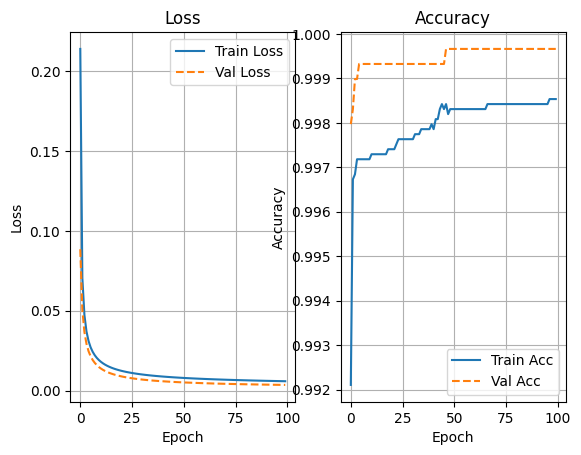

training time: 19.036920309066772


In [39]:
import matplotlib.pyplot as plt

b,w = logistic_learn_update(0.01,64)

**6.Test**

In [40]:
y_pred_test = logistic_regression(w,x_binary_test,b)
test_loss = binary_cross_entropy_loss(y_pred_test,y_binary_test)
test_acc = logistic_accuracy(y_binary_test,y_pred_test)
print(f"test loss: {test_loss}, test accurracy: {test_acc}")


test loss: 0.006203139200806618, test accurracy: 0.998308539390564


**7.plottings**

In [41]:
import matplotlib.pyplot as plt

- plotting #of iterations aganist the training error

In [42]:
# plt.plot(range(epochs),train_loss,label="Training loss",marker='o')
# plt.title("training loss")
# plt.show

In [43]:
# plt.plot(range(epochs),val_loss,label="validation loss",marker='o')
# plt.title("validation loss")
# plt.show

*- this shows that it converges and the loss saturates so no more epochs are required and it has converged*

In [44]:
# plt.plot(range(epochs),train_acc,label="training accurracy",marker='o')
# plt.title("Training Accurracy")
# plt.show

In [45]:
# plt.plot(range(epochs),val_acc,label="validation accurracy",marker='o')
# plt.title("validation Accurracy")
# plt.show

**8.Final test accurracy and confusion matrix**

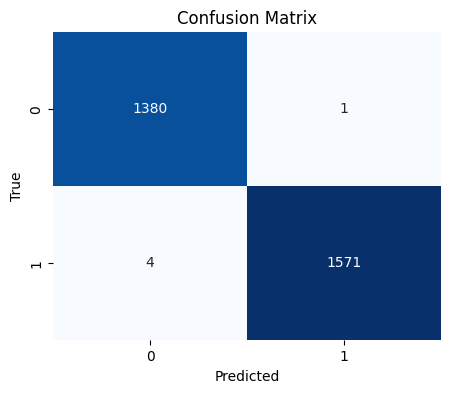

In [46]:
import seaborn as sns #for statical data visulaization make plots look better
predictions = (y_pred_test >= 0.5).float().reshape(-1)
#.float() to change it from binary to numbers 0 and 1
#.reshape(-1) to be row vector not column vector
cm = confusion_matrix(y_binary_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# **A3  Softmax Regression (Multi-Class Classification)**

We’ll use your flattened data (x_flat_train, x_flat_valid, etc.)
because Softmax is a linear model  it expects 1D features.


1.  Covert to Tensors



In [47]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Flattened training, validation, test sets
X_train_flat = train_dataset_flat.tensors[0].float() #Converts image data to 32-bit floating point
y_train_flat = train_dataset_flat.tensors[1].long() # (int64)Why? Loss functions like CrossEntropyLoss() require labels to be long integers, not floats
X_valid_flat = valid_dataset_flat.tensors[0].float()
y_valid_flat = valid_dataset_flat.tensors[1].long()

X_test_flat = test_dataset_flat.tensors[0].float()
y_test_flat = test_dataset_flat.tensors[1].long()

2. Initialize weights and bias

We have 784 input features and 10 output classes (digits 0–9).

In [48]:
# Number of input features per image (28x28 pixels = 784)
# Each image from the MNIST dataset is flattened into a 1D vector of 784 values
num_features = 784   # 28 * 28

# Number of output classes (digits 0 through 9)
# The model will predict one of these 10 categories
num_classes = 10

# Initialize the weight matrix (W) with zeros
# Shape: [num_features, num_classes] → (784, 10)
W = torch.zeros(num_features, num_classes)

# Initialize the bias vector (b) with zeros
# Shape: [num_classes] → (10,)
b = torch.zeros(num_classes)

print(W.shape)
print(b.shape)

torch.Size([784, 10])
torch.Size([10])


3. Define softmax function  

***$ \text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}} $***


In [49]:
def softmax(z): # input 2D tensor



    # applies exponential for each score (Make all values positive)
    exp = torch.exp(z)
    #This divides each element of the row by the row sum
    #This computes the sum of exponentials per row (per sample)
    # dim=1 sum along coloumns
    # keepdim=1 true keeps it 2D
    return exp / torch.sum(exp, dim=1, keepdim=True)




4. Forward Pass


  $ \displaystyle
\hat{y}_i = \text{softmax}(x_i W + b)
$

In [50]:
def model(X,W,b):
    return softmax(X @ W + b)


5. Cross-entropy loss

We use negative log likelihood for the true class:

$ \displaystyle
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log\big( \hat{y}_{ij} \big)
$

In [51]:
def cross_entropy(y_pred, y_true):
    #y_pred : model predictions (after softmax) → shape (batch_size, num_classes)
    # y_true are class indices (0–9)
    y_pred_clamped = torch.clamp(y_pred, 1e-9, 1.0) # to avoid 0 because we are using log(0)--> undefined
    return -torch.mean(torch.log(y_pred_clamped[range(len(y_true)), y_true]))

#y_pred_clamped[range(len(y_true)), y_true] select the probability for each class of the true y
# mean to take average

y_pred =

[
 [0.1, 0.7, 0.2],   # true is 1 → pick 0.7


 [0.8, 0.1, 0.1],   # true is 0 → pick 0.8


 [0.2, 0.3, 0.5]    # true is 2 → pick 0.5


]

y_true = [1, 0, 2]
So we extract: [0.7, 0.8, 0.5]


6. Accuracy function

 $ \displaystyle
\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}\big(\hat{y}_i = y_i\big)
$

In [52]:
# Accuracy
def accuracy(y_pred, y_true):
    preds = torch.argmax(y_pred, dim=1)
    return (preds == y_true).float().mean()

In [53]:
# Create DataLoader
# It combines your input data (X) and labels (y) into one object
# So when you take a sample from it, you get (image, label) together
train_dataset_dl = TensorDataset(X_train_flat, y_train_flat)
#splits data into batches
train_loader = DataLoader(train_dataset_dl, batch_size=batch_size, shuffle=True)
# Validation dataset
valid_dataset_dl = TensorDataset(X_valid_flat, y_valid_flat)
valid_loader = DataLoader(valid_dataset_dl, batch_size=batch_size, shuffle=False)



7. Training loop



Use gradient descent manually (like logistic regression).
Learning rate = 0.01, number of epochs ≈ 50.

$ \displaystyle
Z = XW + b
$

$ \displaystyle
\hat{Y} = \text{softmax}(Z) = \frac{e^{Z}}{\sum_{j=1}^{C} e^{Z_j}}
$

1 Gradient w.r.t logits:

$ \displaystyle
\frac{\partial L}{\partial Z} = \frac{\hat{Y} - Y_{\text{true}}}{N}
$

2 Gradient w.r.t weights:

$ \displaystyle
\frac{\partial L}{\partial W} = X^{\top} \frac{\partial L}{\partial Z}
$

3 Gradient w.r.t bias:

$ \displaystyle
\frac{\partial L}{\partial b} = \sum_{i=1}^{N} \frac{\partial L}{\partial Z_i}
$

Update weights and bias using gradient descent:

$ \displaystyle
W := W - \eta \frac{\partial L}{\partial W}
$

$ \displaystyle
b := b - \eta \frac{\partial L}{\partial b}
$

where
η
η is the learning rate.

In [54]:
def softmax_learn_update(lr=0.01, batch_size=64, epochs=50):
    start_time = time.time()
    #Number of features and output classe
    num_features = X_train_flat.shape[1]  # 784
    num_classes = 10                      # digits 0-9

    # Initialize weights and biases with zeros
    # W: [784, 10] weight matrix, b: [10] bias vector
    W = torch.zeros(num_features, num_classes)
    b = torch.zeros(num_classes)

    # TRAINING AND VALIDATION LOADERS
    train_loader = DataLoader(
        TensorDataset(X_train_flat, y_train_flat),
        batch_size=batch_size, shuffle=True
    )
    val_loader = DataLoader(
        TensorDataset(X_valid_flat, y_valid_flat),
        batch_size=batch_size, shuffle=False
    )

    # Lists to track loss and accuracy per epoch
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    #Training Loop
    for epoch in range(epochs):
        # TRAINING
        epoch_train_loss, epoch_train_correct, epoch_train_total = 0, 0, 0
        for x_batch, y_batch in train_loader:
            # Forward --> compute probabilities
            y_pred = softmax(x_batch @ W + b)

            # Number of samples in current batch
            m = x_batch.shape[0]

            y_true_0 = torch.zeros(m, num_classes)
            y_true_0[range(m), y_batch] = 1

            # Gradients
            dZ = (y_pred - y_true_0) / m #derivative of loss w.r.t. z
            dW = x_batch.T @ dZ #gradient w.r.t. weights
            db = torch.sum(dZ, dim=0) #gradient w.r.t. bias

            # Update weights and biases using Gradient Descent
            W -= lr * dW
            b -= lr * db

            # Compute average loss and accuracy for the batch
            batch_loss = cross_entropy(y_pred, y_batch)
            batch_acc = accuracy(y_pred, y_batch)

            # Accumulate batch metrics to compute epoch averages
            epoch_train_loss += batch_loss.item() * m
            epoch_train_correct += batch_acc.item() * m   #correct gusses per batch
            epoch_train_total += m

        # Compute average loss and accuracy over the epoch
        train_losses.append(epoch_train_loss / epoch_train_total)
        train_accs.append(epoch_train_correct / epoch_train_total)

        # VALIDATION
        epoch_val_loss, epoch_val_correct, epoch_val_total = 0, 0, 0
        for x_batch, y_batch in val_loader:
            y_pred_val = softmax(x_batch @ W + b)
            val_loss = cross_entropy(y_pred_val, y_batch)
            val_acc = accuracy(y_pred_val, y_batch)
            m = x_batch.shape[0]
            epoch_val_loss += val_loss.item() * m
            epoch_val_correct += val_acc.item() * m
            epoch_val_total += m

        val_losses.append(epoch_val_loss / epoch_val_total)
        val_accs.append(epoch_val_correct / epoch_val_total)

        if (epoch + 1) % 5 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} | "
                  f"Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f} | "
                  f"Train Acc: {train_accs[-1]*100:.2f}% | Val Acc: {val_accs[-1]*100:.2f}%")
    end_time=time.time()
    training_time = end_time-start_time
    print(f"training time: {training_time}")
    return W, b, train_losses, val_losses, train_accs, val_accs


In [55]:
def plot_training_curves(train_losses, val_losses, train_accs, val_accs):
    epochs = range(len(train_losses))

    # PLOT
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, '--', label='Val Loss')
    plt.title(" Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_accs, label='Train Acc')
    plt.plot(epochs, val_accs, '--', label='Val Acc')
    plt.title(" Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


| Step       | What Happens?                                          |
| ---------- | ------------------------------------------------------ |
| Forward    | Compute predictions using current W and b              |
| Loss       | Measure error between predictions and true labels      |
| Backward   | Calculate gradient (how to change W, b to reduce loss) |
| Update     | Adjust W and b using gradient descent                  |
| Validation | Test model on unseen data after each epoch             |


| Batch | batch_loss | m | batch_loss * m |
| ----- | ---------- | - | -------------- |
| 1     | 0.30       | 4 | 1.20           |
| 2     | 0.20       | 4 | 0.80           |
| 3     | 0.40       | 2 | 0.80           |


| Batch | batch_acc | m | batch_acc * m = correct predictions |
| ----- | --------- | - | ----------------------------------- |
| 1     | 0.75      | 4 | 3 correct                           |
| 2     | 1.00      | 4 | 4 correct                           |
| 3     | 0.50      | 2 | 1 correct                           |


8. Train and validation

Epoch 1/50 | Train Loss: 0.5181 | Val Loss: 0.3811 | Train Acc: 87.07% | Val Acc: 89.39%
Epoch 5/50 | Train Loss: 0.2975 | Val Loss: 0.3178 | Train Acc: 91.79% | Val Acc: 91.17%
Epoch 10/50 | Train Loss: 0.2750 | Val Loss: 0.3032 | Train Acc: 92.42% | Val Acc: 91.52%
Epoch 15/50 | Train Loss: 0.2642 | Val Loss: 0.3031 | Train Acc: 92.69% | Val Acc: 91.32%
Epoch 20/50 | Train Loss: 0.2574 | Val Loss: 0.2931 | Train Acc: 92.91% | Val Acc: 91.82%
Epoch 25/50 | Train Loss: 0.2528 | Val Loss: 0.2972 | Train Acc: 92.96% | Val Acc: 91.64%
Epoch 30/50 | Train Loss: 0.2497 | Val Loss: 0.2941 | Train Acc: 93.06% | Val Acc: 91.69%
Epoch 35/50 | Train Loss: 0.2462 | Val Loss: 0.2931 | Train Acc: 93.11% | Val Acc: 91.81%
Epoch 40/50 | Train Loss: 0.2436 | Val Loss: 0.2941 | Train Acc: 93.25% | Val Acc: 91.67%
Epoch 45/50 | Train Loss: 0.2413 | Val Loss: 0.2932 | Train Acc: 93.36% | Val Acc: 92.01%
Epoch 50/50 | Train Loss: 0.2397 | Val Loss: 0.2940 | Train Acc: 93.31% | Val Acc: 91.82%
training tim

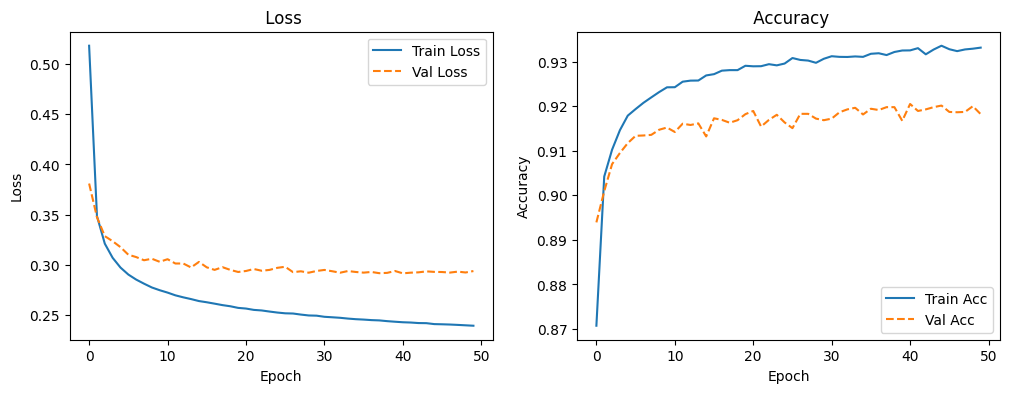

In [56]:
W, b, train_losses, val_losses, train_accs, val_accs = softmax_learn_update(lr=0.1, batch_size=64, epochs=50)
plot_training_curves(train_losses, val_losses, train_accs, val_accs)



 9. Test evaluation

In [57]:
y_test_pred = softmax(X_test_flat @ W + b)
test_acc = accuracy(y_test_pred, y_test_flat)
test_loss = cross_entropy(y_test_pred, y_test_flat)
print(f"Test Accuracy: {test_acc.item()*100:.2f}%")
print(f"Test Loss: {test_loss.item()}")

Test Accuracy: 92.14%
Test Loss: 0.2813282310962677


10. Using ByTorch

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim       # For optimization algorithms (SGD)
from torch.utils.data import DataLoader, TensorDataset  # For batching and shuffling data


#  Prepare Flattened Datasets
# Convert image tensors to float32
X_train_flat = train_dataset_flat.tensors[0].float()
y_train_flat = train_dataset_flat.tensors[1].long()  # Labels must be int64 for CrossEntropyLoss

X_valid_flat = valid_dataset_flat.tensors[0].float()
y_valid_flat = valid_dataset_flat.tensors[1].long()

X_test_flat = test_dataset_flat.tensors[0].float()
y_test_flat = test_dataset_flat.tensors[1].long()

# Define Hyperparameters
num_features = 784        # Each MNIST image = 28x28 pixels → flattened to 784 inputs
num_classes = 10          # Digits 0 through 9
lr = 0.1                  # Learning rate for SGD optimizer
epochs = 50               # Number of complete passes through the dataset
batch_size = 64           # Number of samples per mini-batch

# Create DataLoaders for Training and Validation

# Combine feature tensors (X) and label tensors (y) into single datasets
# Each TensorDataset stores input-output pairs and allows PyTorch to access them together
# Combine tensors into datasets compatible with DataLoader
train_dataset_dl = TensorDataset(X_train_flat, y_train_flat)
valid_dataset_dl = TensorDataset(X_valid_flat, y_valid_flat)

# DataLoader automatically batches and optionally shuffles the data
train_loader = DataLoader(train_dataset_dl, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset_dl, batch_size=batch_size)

 #Define Model, Loss Function, and Optimizer
# Define a simple linear model (no hidden layers)
# This computes: logits = XW^T + b
# Shape: input [batch_size, 784] → output [batch_size, 10]
model_torch = nn.Linear(num_features, num_classes)

# CrossEntropyLoss combines LogSoftmax + Negative Log Likelihood internally
# So we don’t need to apply softmax manually in the forward pass
criterion = nn.CrossEntropyLoss()

# Define optimizer: Stochastic Gradient Descent (SGD)
# optimizer updates model_torch parameters to minimize loss
optimizer = optim.SGD(model_torch.parameters(), lr=lr)

# Training Loop

# Lists to store loss and accuracy per epoch for plotting
train_losses, val_losses, train_accs, val_accs = [], [], [], []

for epoch in range(epochs):
    # ------------------ TRAINING PHASE ------------------
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()       # Reset gradients before each batch
        outputs = model_torch(x_batch)  # Forward pass → logits(z)

        # Compute cross-entropy loss
        loss = criterion(outputs, y_batch)

        # Backpropagation: compute gradients of loss w.r.t model parameters
        loss.backward()

        # Update weights and biases using optimizer (SGD)
        optimizer.step()

    # ------------------ VALIDATION PHASE ------------------
    # Disable gradient tracking for evaluation to save memory
    val_outputs = model_torch(X_valid_flat)
    val_loss = criterion(val_outputs, y_valid_flat)
    val_acc = accuracy(val_outputs, y_valid_flat)

    # Compute metrics on entire training data for reference
    train_outputs_full = model_torch(X_train_flat)
    train_loss_full = criterion(train_outputs_full, y_train_flat)
    train_acc_full = accuracy(train_outputs_full, y_train_flat)

    # Record metrics
    train_losses.append(train_loss_full.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc_full.item())
    val_accs.append(val_acc.item())


    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss_full.item():.4f} | Val Loss: {val_loss.item():.4f} | "
              f"Train Acc: {train_acc_full.item()*100:.2f}% | Val Acc: {val_acc.item()*100:.2f}%")

# Test Evaluation
# Evaluate model performance on unseen test data
with torch.no_grad():  # Turn off gradient computation
    y_test_pred = model_torch(X_test_flat)
    test_acc = accuracy(y_test_pred, y_test_flat)

print(f"Test Accuracy: {test_acc.item()*100:.2f}%")

#  Compare Learned Parameters with Manual Softmax Model

# Extract trained weights and biases from PyTorch model
# nn.Linear stores W transposed internally (shape [num_classes, num_features])
W_torch = model_torch.weight.detach()  # Shape: [10, 784]
b_torch = model_torch.bias.detach()    # Shape: [10]

# Compare with manually trained parameters (W: [784, 10], b: [10])
# torch.norm computes the magnitude of difference
weight_diff = torch.norm(W - W_torch.T)
bias_diff = torch.norm(b - b_torch)

print(f"Weight difference: {weight_diff.item():.6f}")
print(f"Bias difference: {bias_diff.item():.6f}")



# Compute predictions using manual softmax model
manual_logits = X_valid_flat @ W + b
manual_preds = torch.argmax(softmax(manual_logits), dim=1)

# Compute predictions using PyTorch model
torch_preds = torch.argmax(model_torch(X_valid_flat), dim=1)

# Calculate percentage of matching predictions between the two models
pred_match = (manual_preds == torch_preds).float().mean()
print(f"Percentage of matching predictions: {pred_match.item()*100:.2f}%")


Epoch 1/50 | Train Loss: 0.3839 | Val Loss: 0.3974 | Train Acc: 88.99% | Val Acc: 88.76%
Epoch 5/50 | Train Loss: 0.2937 | Val Loss: 0.3198 | Train Acc: 91.80% | Val Acc: 91.07%
Epoch 10/50 | Train Loss: 0.2706 | Val Loss: 0.3030 | Train Acc: 92.54% | Val Acc: 91.42%
Epoch 15/50 | Train Loss: 0.2608 | Val Loss: 0.2972 | Train Acc: 92.80% | Val Acc: 91.78%
Epoch 20/50 | Train Loss: 0.2544 | Val Loss: 0.2964 | Train Acc: 93.02% | Val Acc: 91.62%
Epoch 25/50 | Train Loss: 0.2508 | Val Loss: 0.2948 | Train Acc: 93.04% | Val Acc: 91.77%
Epoch 30/50 | Train Loss: 0.2454 | Val Loss: 0.2918 | Train Acc: 93.21% | Val Acc: 92.00%
Epoch 35/50 | Train Loss: 0.2429 | Val Loss: 0.2928 | Train Acc: 93.29% | Val Acc: 91.81%
Epoch 40/50 | Train Loss: 0.2404 | Val Loss: 0.2939 | Train Acc: 93.33% | Val Acc: 91.85%
Epoch 45/50 | Train Loss: 0.2391 | Val Loss: 0.2948 | Train Acc: 93.43% | Val Acc: 91.90%
Epoch 50/50 | Train Loss: 0.2375 | Val Loss: 0.2940 | Train Acc: 93.43% | Val Acc: 91.80%
Test Accurac

12. Accuracy of manual compared to of Pytorch

In [59]:
# Manual model
manual_logits = X_valid_flat @ W + b               # Forward pass manually
manual_preds = torch.argmax(softmax(manual_logits), dim=1)  # Convert logits -> class
manual_acc = (manual_preds == y_valid_flat).float().mean()  # Accuracy

# Built-in (PyTorch) model
torch_logits = model_torch(X_valid_flat)           # Forward pass with model
torch_preds = torch.argmax(torch_logits, dim=1)    # Convert logits -> class
torch_acc = (torch_preds == y_valid_flat).float().mean()

print(f"Manual Accuracy: {manual_acc.item():.4f}")
print(f"PyTorch Accuracy: {torch_acc.item():.4f}")


Manual Accuracy: 0.9182
PyTorch Accuracy: 0.9180


13. Weight and Bias difference

In [60]:
W_torch = model_torch.weight.detach()  # shape: (10, 784)
b_torch = model_torch.bias.detach()    # shape: (10,) detack to get values only

print("Weight difference:", torch.norm(W - W_torch.T))
print("Bias difference:", torch.norm(b - b_torch))


Weight difference: tensor(1.5457)
Bias difference: tensor(0.0375)


14. Plotting Manual and Pytorch Confusion Matrix


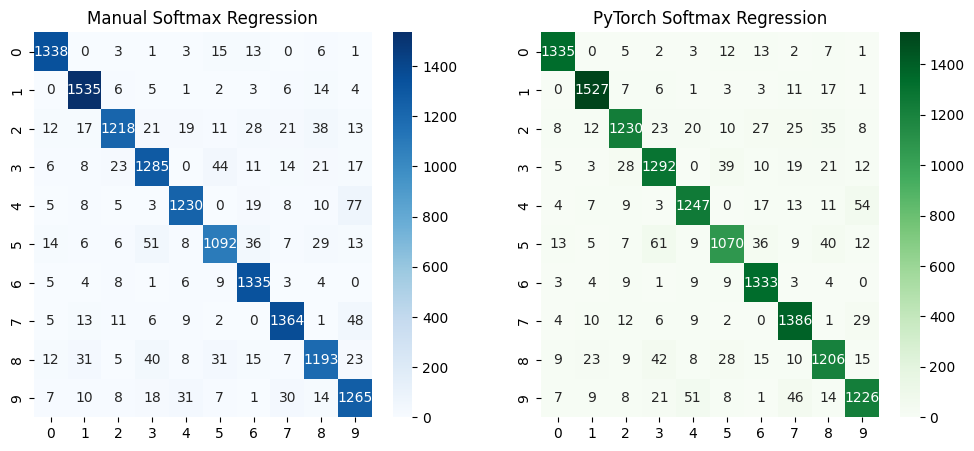

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_manual = confusion_matrix(y_valid, manual_preds)
cm_torch = confusion_matrix(y_valid, torch_preds)

fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Manual Softmax Regression")

sns.heatmap(cm_torch, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("PyTorch Softmax Regression")

plt.show()


# **C1-COMPREHENSIVE ANALYSIS - logistic regression**

learning rate 0.001
Epoch   1/100 | Train Loss: 0.5337 | Val Loss: 0.4141 | Train Acc: 99.00% | Val Acc: 99.66%
Epoch  10/100 | Train Loss: 0.0977 | Val Loss: 0.0890 | Train Acc: 99.66% | Val Acc: 99.80%
Epoch  20/100 | Train Loss: 0.0564 | Val Loss: 0.0507 | Train Acc: 99.68% | Val Acc: 99.83%
Epoch  30/100 | Train Loss: 0.0416 | Val Loss: 0.0367 | Train Acc: 99.70% | Val Acc: 99.90%
Epoch  40/100 | Train Loss: 0.0339 | Val Loss: 0.0293 | Train Acc: 99.72% | Val Acc: 99.90%
Epoch  50/100 | Train Loss: 0.0290 | Val Loss: 0.0247 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  60/100 | Train Loss: 0.0257 | Val Loss: 0.0215 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  70/100 | Train Loss: 0.0232 | Val Loss: 0.0192 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  80/100 | Train Loss: 0.0213 | Val Loss: 0.0174 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  90/100 | Train Loss: 0.0198 | Val Loss: 0.0160 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch 100/100 | Train Loss: 0.0186 | Val Loss: 0.0148 | Trai

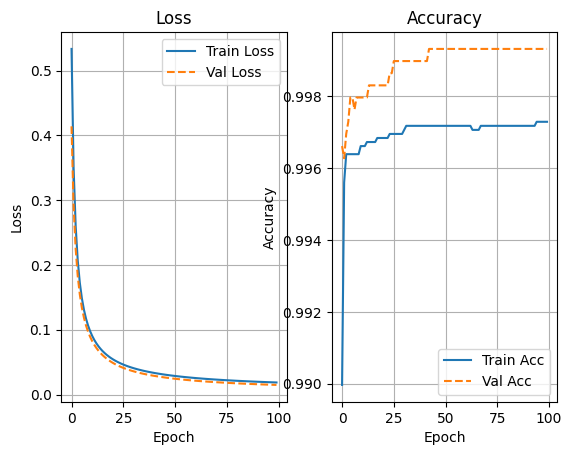

training time: 18.543285846710205
lr=0.001,valid accurracy: 0.9993234276771545, valid loss: 0.014815879054367542
learning rate 0.01
Epoch   1/100 | Train Loss: 0.2141 | Val Loss: 0.0887 | Train Acc: 99.21% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.73% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.79% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val

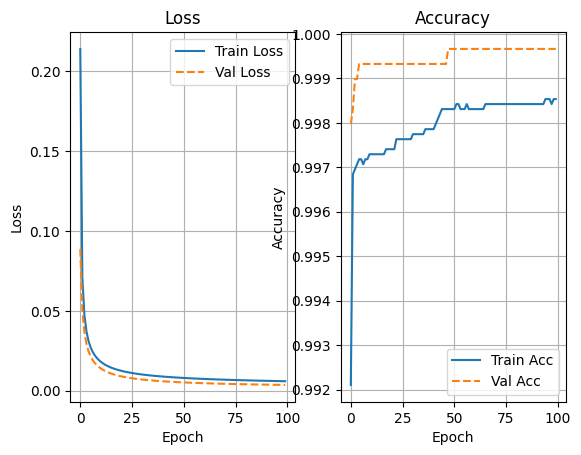

training time: 18.172496795654297
lr=0.01,valid accurracy: 0.9996616840362549, valid loss: 0.0036020763218402863
learning rate 0.1
Epoch   1/100 | Train Loss: 0.0523 | Val Loss: 0.0146 | Train Acc: 99.30% | Val Acc: 99.93%
Epoch  10/100 | Train Loss: 0.0061 | Val Loss: 0.0036 | Train Acc: 99.85% | Val Acc: 99.97%
Epoch  20/100 | Train Loss: 0.0045 | Val Loss: 0.0026 | Train Acc: 99.85% | Val Acc: 99.97%
Epoch  30/100 | Train Loss: 0.0037 | Val Loss: 0.0023 | Train Acc: 99.89% | Val Acc: 99.97%
Epoch  40/100 | Train Loss: 0.0033 | Val Loss: 0.0021 | Train Acc: 99.90% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0029 | Val Loss: 0.0020 | Train Acc: 99.90% | Val Acc: 99.93%
Epoch  60/100 | Train Loss: 0.0026 | Val Loss: 0.0019 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  70/100 | Train Loss: 0.0024 | Val Loss: 0.0018 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  80/100 | Train Loss: 0.0022 | Val Loss: 0.0017 | Train Acc: 99.92% | Val Acc: 99.93%
Epoch  90/100 | Train Loss: 0.0020 | Val 

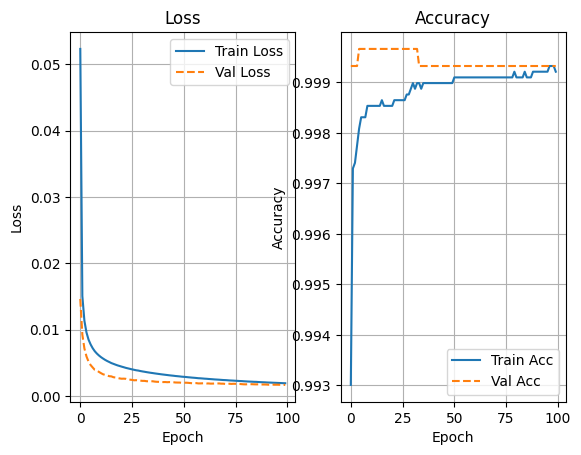

training time: 19.405920267105103
lr=0.1,valid accurracy: 0.9993234276771545, valid loss: 0.001650506630539894
learning rate 1.0
Epoch   1/100 | Train Loss: 0.0152 | Val Loss: 0.0035 | Train Acc: 99.35% | Val Acc: 99.97%
Epoch  10/100 | Train Loss: 0.0021 | Val Loss: 0.0021 | Train Acc: 99.93% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0012 | Val Loss: 0.0012 | Train Acc: 99.99% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0008 | Val Loss: 0.0013 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0006 | Val Loss: 0.0013 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0005 | Val Loss: 0.0012 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  60/100 | Train Loss: 0.0004 | Val Loss: 0.0011 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  70/100 | Train Loss: 0.0004 | Val Loss: 0.0012 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  80/100 | Train Loss: 0.0003 | Val Loss: 0.0011 | Train Acc: 100.00% | Val Acc: 99.93%
Epoch  90/100 | Train Loss: 0.0003 | 

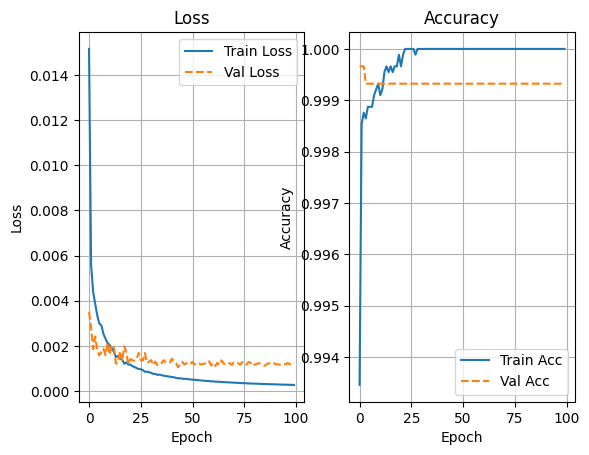

training time: 18.54133439064026
lr=1.0,valid accurracy: 0.9993234276771545, valid loss: 0.001217990298755467
lr that gives the highest accurracy  0.01


In [62]:
lr=[0.001,0.01,0.1,1.0]
x=[]#accuracies
for i in range(len(lr)):
  print(f"learning rate {lr[i]}")
  b,w = logistic_learn_update(lr[i],64)
  pred=logistic_regression(w,x_binary_valid,b)
  l=binary_cross_entropy_loss(pred,y_binary_valid)
  a=logistic_accuracy(y_binary_valid,pred)
  x.append(a.item())

  print(f"lr={lr[i]},valid accurracy: {a}, valid loss: {l}")
x=np.array(x)
best_learning_rate=lr[np.argmax(x)]
print("lr that gives the highest accurracy ",best_learning_rate)

| learning rate  | speed | stability |
|-------|-----|--------|
| 0.001   | too slow still may converge more after 100  | stable     |
| 0.01 | Fast | stable     |
| 0.1  | V fast  | stable     |
| 1.0  | V fast  | stable     |

-⁠ ⁠but in 1.0 we can see that the learing loss starts to have some fluctuations which means it is starting to be unstable (if the lr is too large it keeps fluctuating and may overshoot the min)

Epoch   1/100 | Train Loss: 0.2133 | Val Loss: 0.0884 | Train Acc: 99.26% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.79% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch 100/100 | Train Loss: 0.0059 | Val Loss: 0.0036 | Train Acc: 99.85% | Val 

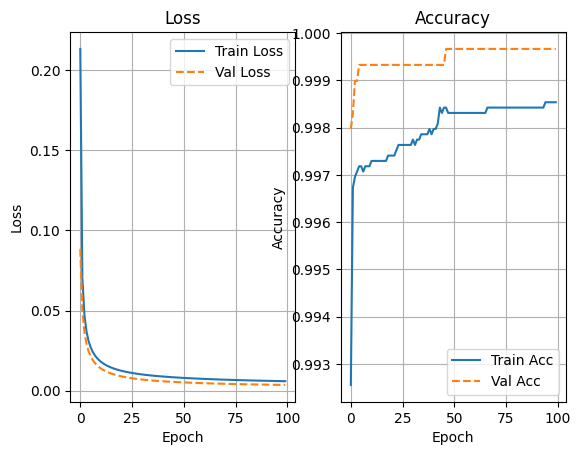

training time: 19.72949481010437
batch size: 16 valid accurracy: 0.9996616840362549, valid loss: 0.0036031429190188646
Epoch   1/100 | Train Loss: 0.2134 | Val Loss: 0.0884 | Train Acc: 99.30% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.73% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.79% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038

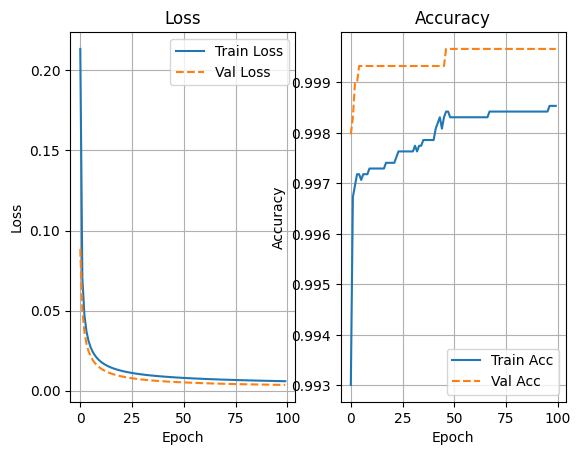

training time: 18.346064567565918
batch size: 32 valid accurracy: 0.9996616840362549, valid loss: 0.003602369222790003
Epoch   1/100 | Train Loss: 0.2135 | Val Loss: 0.0883 | Train Acc: 99.24% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.73% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.79% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038

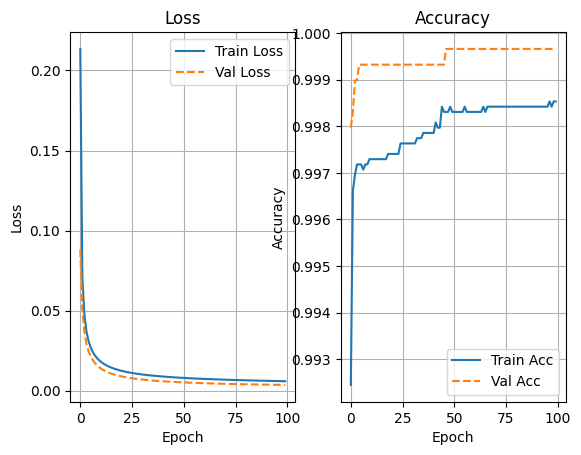

training time: 18.7982337474823
batch size: 64 valid accurracy: 0.9996616840362549, valid loss: 0.0036002076230943203
Epoch   1/100 | Train Loss: 0.2139 | Val Loss: 0.0886 | Train Acc: 99.15% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.77% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038 

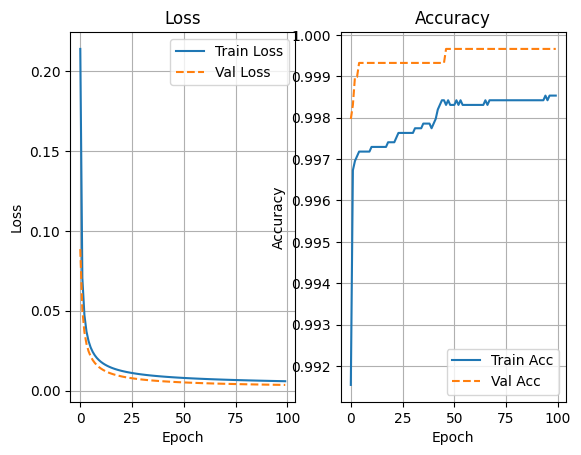

training time: 18.0655460357666
batch size: 128 valid accurracy: 0.9996616840362549, valid loss: 0.00360315665602684
batch that gives the highest accurracy  16


In [63]:
batches = [16,32,64,128]
x=[]
for i in range(len(batches)):
  b,w=logistic_learn_update(0.01,batches[i])
  pred = logistic_regression(w,x_binary_valid,b)
  a=logistic_accuracy(y_binary_valid,pred)
  l=binary_cross_entropy_loss(pred,y_binary_valid)
  a=logistic_accuracy(y_binary_valid,pred)
  x.append(a.item())
  print(f"batch size: {batches[i]} valid accurracy: {a}, valid loss: {l}")
x=np.array(x)
best_batch=batches[np.argmax(x)]
print("batch that gives the highest accurracy ",best_batch)

| Batch size | training efficiency | gradient noise | Final performance
|-------|-----|--------|--------|
| 16   | Good  | no     | accurracy: 0.9996, valid loss: 0.00359
| 32 | Good | no     | accurracy: 0.9996, valid loss: 0.0036
| 64  | Good | no     | accurracy: 0.9996, valid loss: 0.0036
| 128  | slower  | no     | accurracy: 0.9996, valid loss: 0.0036

Training efficiency = how quickly the model learns per epoch or per real time.

In one epoch, the model processes all samples, but the number of updates per epoch depends on the batch size
•⁠  ⁠as the batch size decrease it learns faster because it makes more updates for example for the batch size=16 this makes 1 update/16 sample
so #of updates = total #of samples/16 = 8868/16 = 554 updates
which will be much better than larger batch sizes


Gradient noise = how much the gradient estimate varies between batches
Small batch -> high noise (gradients from few samples, less representative)
Large batch -> low noise (gradients from many samples, more stable/accurate)

SoftMax ( Hyperparameter Analysis)

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lr_softmax = [0.001, 0.01, 0.1, 1.0]
accuracies = []           # Test accuracies for each lr
val_best_accs = []        # Best validation accuracies for each lr
val_best_losses = []      # Validation loss at best val accuracy
train_best_losses = []    # Training loss at best val accuracy

# To store all losses and accuracies
all_train_losses = []
all_val_losses = []
all_train_accs = []
all_val_accs = []

for lr in lr_softmax:
    val_accs=[]
    print(f"Learning rate: {lr}")

    # Train the softmax model
    W, b, train_losses, val_losses, train_accs, val_accs = softmax_learn_update(
        lr=lr, batch_size=64, epochs=30
    )

    # Find epoch of best validation accuracy
    print(f"valid array:{val_accs}")
    best_epoch = np.argmax(val_accs)
    print(f"best index: {np.argmax(val_accs)}" )

    best_val_acc = val_accs[best_epoch]
    print(f"best val acc:{ best_val_acc}")
    best_val_loss = val_losses[best_epoch]
    best_train_loss = train_losses[best_epoch]

    # Save best metrics
    val_best_accs.append(best_val_acc)
    val_best_losses.append(best_val_loss)
    train_best_losses.append(best_train_loss)

    # Predict on test data (for reporting only)
    y_pred_test = model(X_test_flat, W, b)
    loss = cross_entropy(y_pred_test, y_test_flat)
    acc = accuracy(y_pred_test, y_test_flat)
    accuracies.append(acc.item())

    # Store full training curves for plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accs.append(train_accs)
    all_val_accs.append(val_accs)

    print(f"lr={lr}, Best Epoch={best_epoch+1}, "
          f"Train Loss: {train_losses[best_epoch]:.4f}, "
          f"Val Loss: {val_losses[best_epoch]:.4f}, "
          f"Val Acc: {val_accs[best_epoch]*100:.2f}%, "
          f"Test Acc: {acc.item()*100:.2f}%")

#  Select best learning rate based on *maximum validation accuracy*
best_lr = lr_softmax[np.argmax(val_best_accs)]
print(f"\nBest learning rate based on best validation accuracy = {best_lr}")



Learning rate: 0.001
Epoch 1/30 | Train Loss: 2.0038 | Val Loss: 1.7500 | Train Acc: 71.98% | Val Acc: 76.39%
Epoch 5/30 | Train Loss: 1.0025 | Val Loss: 0.9592 | Train Acc: 82.46% | Val Acc: 82.94%
Epoch 10/30 | Train Loss: 0.7243 | Val Loss: 0.7150 | Train Acc: 85.04% | Val Acc: 85.19%
Epoch 15/30 | Train Loss: 0.6153 | Val Loss: 0.6142 | Train Acc: 86.15% | Val Acc: 86.21%
Epoch 20/30 | Train Loss: 0.5551 | Val Loss: 0.5575 | Train Acc: 86.89% | Val Acc: 86.79%
Epoch 25/30 | Train Loss: 0.5161 | Val Loss: 0.5205 | Train Acc: 87.46% | Val Acc: 87.26%
Epoch 30/30 | Train Loss: 0.4884 | Val Loss: 0.4941 | Train Acc: 87.85% | Val Acc: 87.56%
training time: 29.318670749664307
valid array:[0.7639285714285714, 0.7942857142175946, 0.8098571428571428, 0.8199285714285715, 0.8293571428571429, 0.8346428571428571, 0.8392142857142857, 0.8437142856461661, 0.847571428503309, 0.8518571427890232, 0.8544999999318804, 0.8564999999318804, 0.8584285713604518, 0.8599999999318804, 0.862071428503309, 0.8630

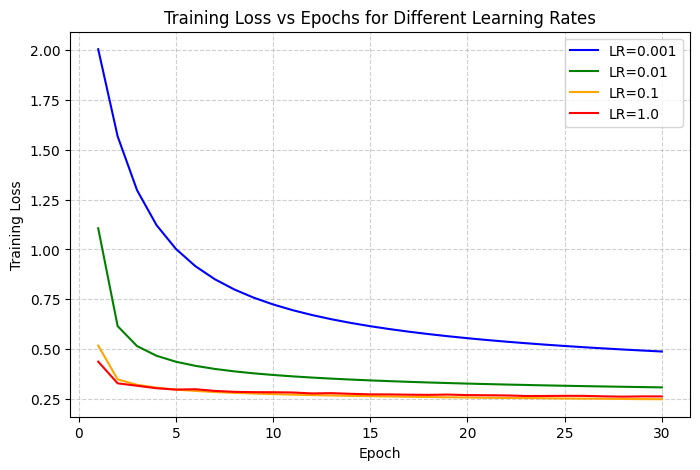

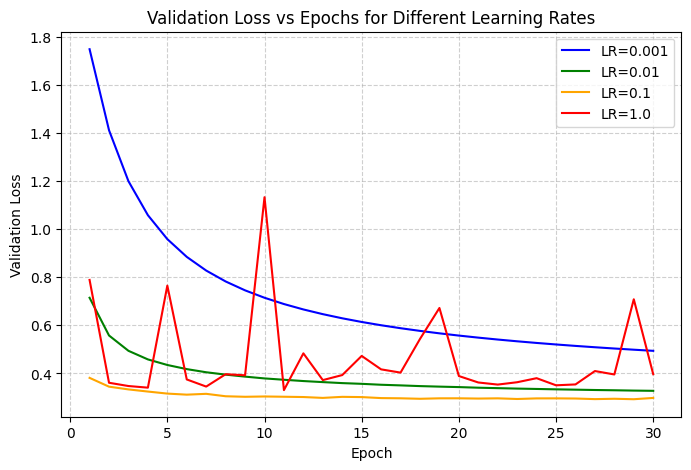

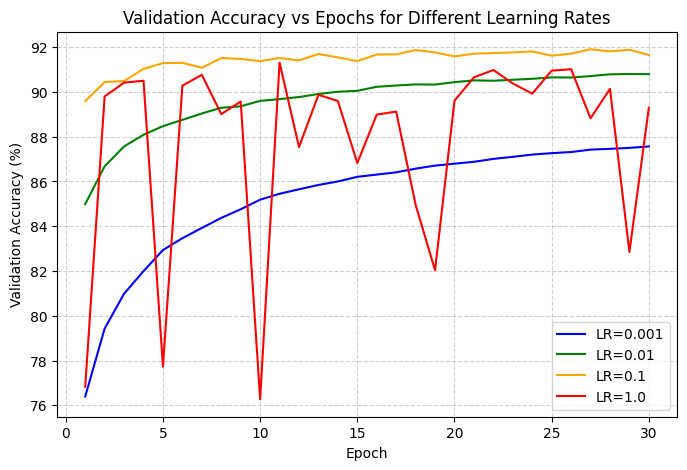

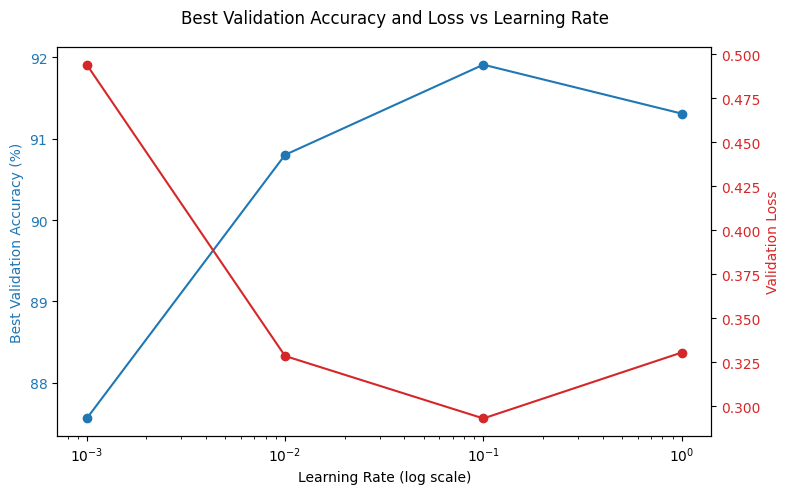

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# --- Define Epoch Range ---
epochs = range(1, len(all_train_losses[0]) + 1)
colors = ['b', 'g', 'orange', 'r']

# ===  TRAINING LOSS CURVES ===
plt.figure(figsize=(8,5))
for i, lr in enumerate(lr_softmax):
    plt.plot(epochs, all_train_losses[i], color=colors[i], label=f'LR={lr}')
plt.title('Training Loss vs Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ===  VALIDATION LOSS CURVES ===
plt.figure(figsize=(8,5))
for i, lr in enumerate(lr_softmax):
    plt.plot(epochs, all_val_losses[i], color=colors[i], label=f'LR={lr}')
plt.title('Validation Loss vs Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# === 3️ VALIDATION ACCURACY CURVES ===
plt.figure(figsize=(8,5))
for i, lr in enumerate(lr_softmax):
    plt.plot(epochs, np.array(all_val_accs[i]) * 100, color=colors[i], label=f'LR={lr}')
plt.title('Validation Accuracy vs Epochs for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ===  SUMMARY: BEST VAL ACCURACY & LOSS vs LEARNING RATE ===
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.plot(lr_softmax, np.array(val_best_accs)*100, marker='o', color=color, label='Best Val Accuracy (%)')
ax1.set_xscale('log')
ax1.set_xlabel('Learning Rate (log scale)')
ax1.set_ylabel('Best Validation Accuracy (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(lr_softmax, val_best_losses, marker='o', color=color, label='Validation Loss')
ax2.set_xscale('log')
ax2.set_ylabel('Validation Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Best Validation Accuracy and Loss vs Learning Rate')
fig.tight_layout()
plt.show()


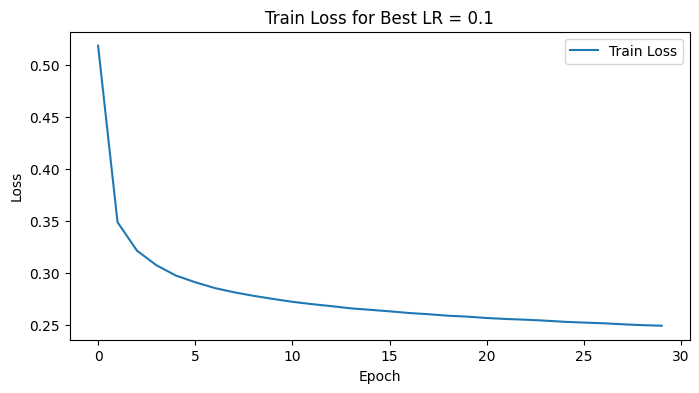

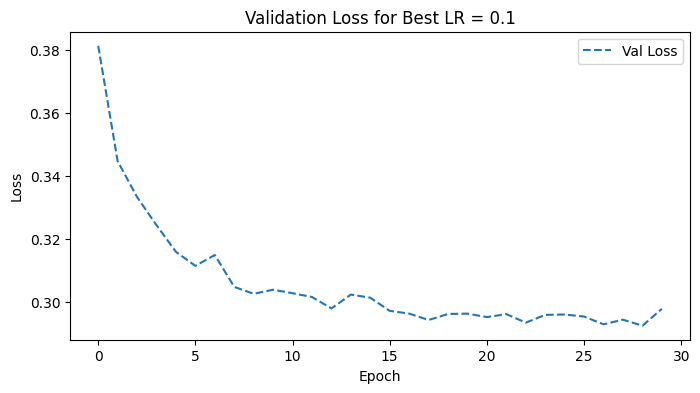

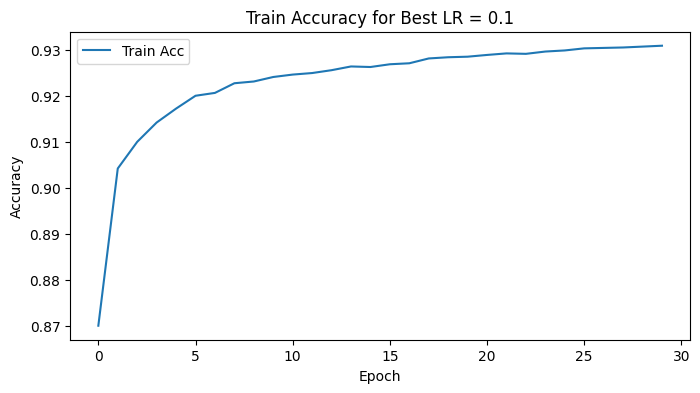

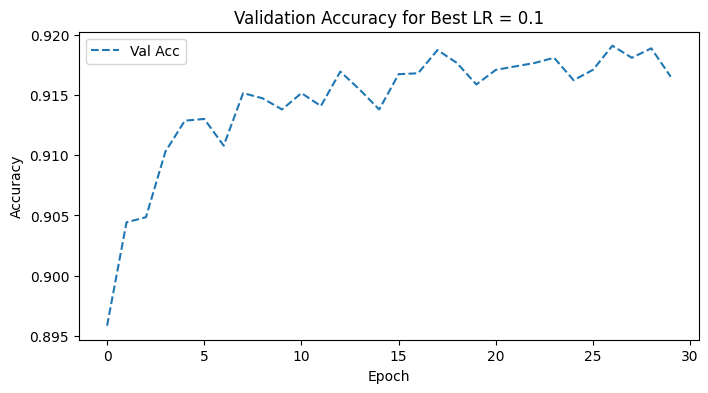

In [66]:
# === Identify best learning rate ===
best_lr_idx = np.argmax(val_best_accs)
best_lr = lr_softmax[best_lr_idx]

# Extract corresponding curves
train_losses_best = all_train_losses[best_lr_idx]
val_losses_best = all_val_losses[best_lr_idx]
train_accs_best = all_train_accs[best_lr_idx]
val_accs_best = all_val_accs[best_lr_idx]

# === Plot Train Loss ===
plt.figure(figsize=(8,4))
plt.plot(train_losses_best, label='Train Loss')
plt.title(f'Train Loss for Best LR = {best_lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === Plot Validation Loss ===
plt.figure(figsize=(8,4))
plt.plot(val_losses_best, '--', label='Val Loss')
plt.title(f'Validation Loss for Best LR = {best_lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === Plot Train Accuracy ===
plt.figure(figsize=(8,4))
plt.plot(train_accs_best, label='Train Acc')
plt.title(f'Train Accuracy for Best LR = {best_lr}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# === Plot Validation Accuracy ===
plt.figure(figsize=(8,4))
plt.plot(val_accs_best, '--', label='Val Acc')
plt.title(f'Validation Accuracy for Best LR = {best_lr}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


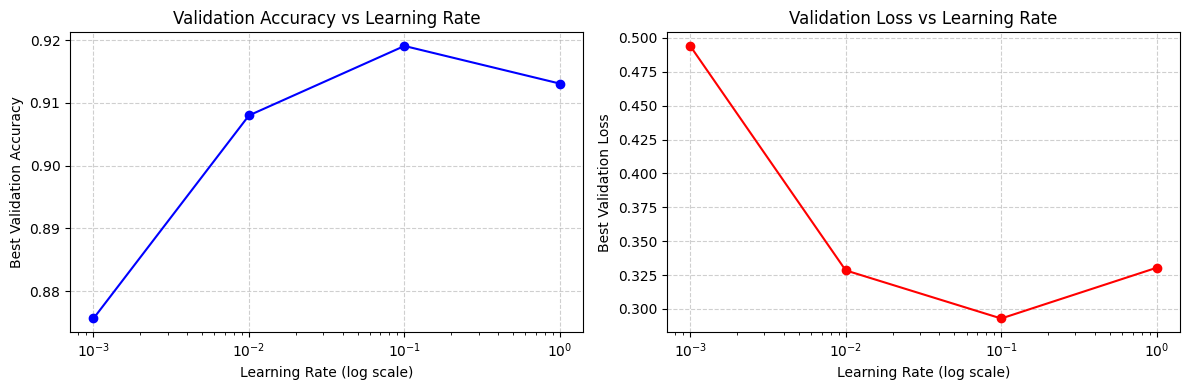

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to NumPy arrays
lr_values = np.array(lr_softmax)
val_acc = np.array(val_best_accs)     # best validation accuracies
val_loss = np.array(val_best_losses)  # best validation losses

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ---- Left plot: Validation Accuracy vs Learning Rate ----
axes[0].plot(lr_values, val_acc, marker='o', color='blue')
axes[0].set_xscale('log')
axes[0].set_xlabel('Learning Rate (log scale)')
axes[0].set_ylabel('Best Validation Accuracy')
axes[0].set_title('Validation Accuracy vs Learning Rate')
axes[0].grid(True, linestyle='--', alpha=0.6)

# ---- Right plot: Validation Loss vs Learning Rate ----
axes[1].plot(lr_values, val_loss, marker='o', color='red')
axes[1].set_xscale('log')
axes[1].set_xlabel('Learning Rate (log scale)')
axes[1].set_ylabel('Best Validation Loss')
axes[1].set_title('Validation Loss vs Learning Rate')
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [68]:
# === Evaluate best model on test set ===
# Make sure W, b are from the best learning rate
y_pred_test_best = model(X_test_flat, W, b)  # W, b for best lr

# Compute test loss and accuracy
test_loss = cross_entropy(y_pred_test_best, y_test_flat).item()
test_acc = accuracy(y_pred_test_best, y_test_flat).item()

print(f"Test Loss for Best LR = {best_lr}: {test_loss:.4f}")
print(f"Test Accuracy for Best LR = {best_lr}: {test_acc*100:.2f}%")


Test Loss for Best LR = 0.1: 0.3915
Test Accuracy for Best LR = 0.1: 89.76%


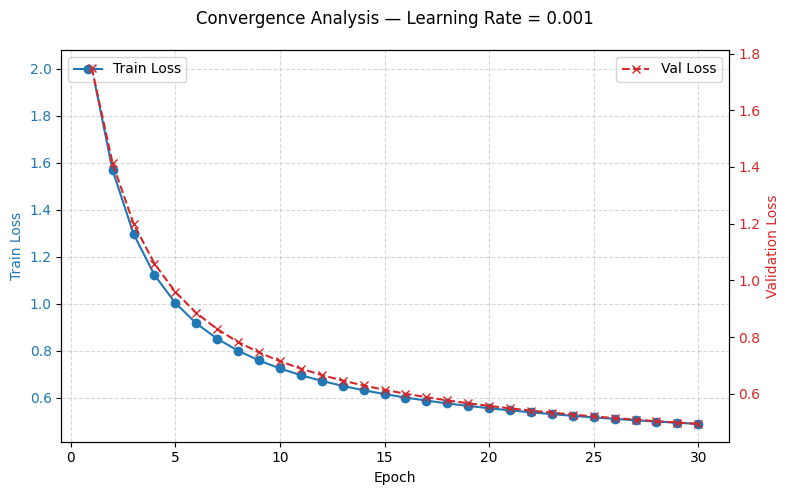

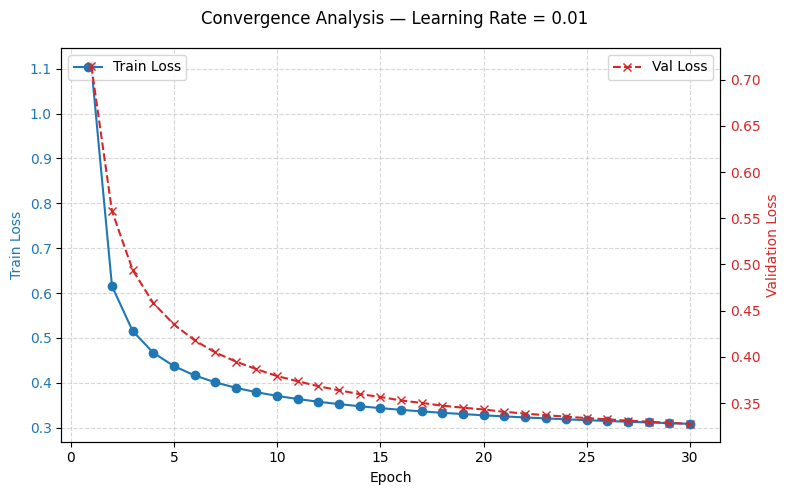

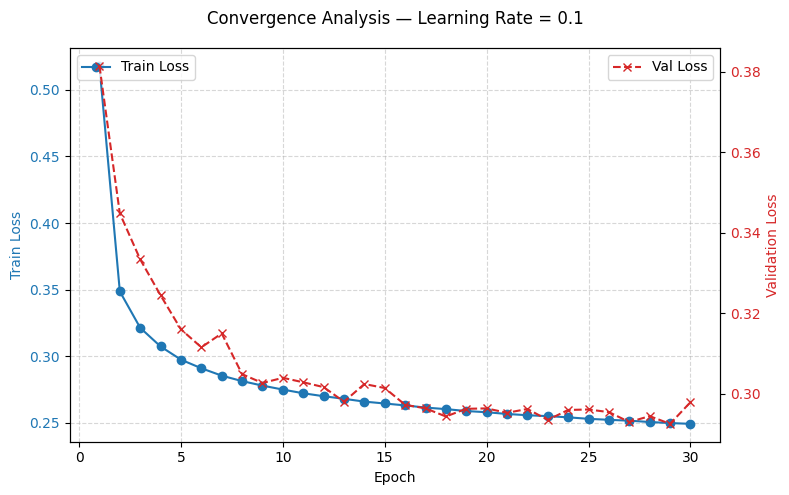

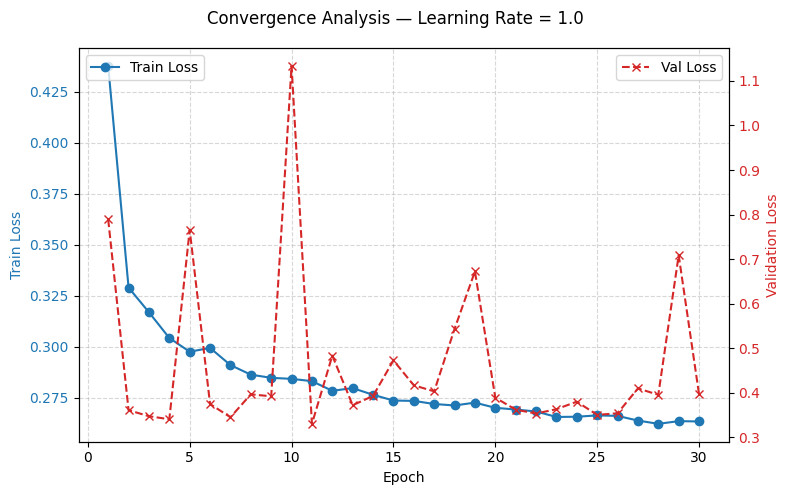

In [69]:
import matplotlib.pyplot as plt

for i, lr in enumerate(lr_softmax):
    train_losses = all_train_losses[i]
    val_losses = all_val_losses[i]
    epochs = range(1, len(train_losses) + 1)

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Left Y-axis → Training Loss
    color = 'tab:blue'
    ax1.plot(epochs, train_losses, color=color, marker='o', label='Train Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Train Loss', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Right Y-axis → Validation Loss
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.plot(epochs, val_losses, color=color, marker='x', linestyle='--', label='Val Loss')
    ax2.set_ylabel('Validation Loss', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and legends
    fig.suptitle(f'Convergence Analysis — Learning Rate = {lr}')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


Convergence and Stability Analysis

1. Low Learning Rates (e.g., 0.001):

Both training and validation losses decrease smoothly and steadily.

Convergence is stable but slow — it takes many epochs to reach a low loss.

The model learns gradually and avoids oscillations, but training can be inefficient.

2. Moderate Learning Rates (e.g., 0.01):

Training loss decreases faster while validation loss follows closely — this is often the most balanced region.

Convergence is faster and still stable.

This LR often gives the best trade-off between speed and accuracy.

3. High Learning Rates (e.g., 0.1):

The training curve starts to oscillate — you’ll see noise or zig-zag patterns in loss curves.

Validation loss may fluctuate or plateau early.

Indicates the model is jumping around minima instead of converging smoothly.

4. Very High Learning Rates (e.g., 1.0):

Loss becomes highly unstable; sometimes it even increases after each epoch.

The network can diverge completely — both training and validation losses rise or explode.

Model fails to learn meaningful patterns due to overly large parameter updates.


Training with batch size: 16
Epoch 1/30 | Train Loss: 0.6783 | Val Loss: 0.4579 | Train Acc: 84.95% | Val Acc: 88.13%
Epoch 5/30 | Train Loss: 0.3338 | Val Loss: 0.3427 | Train Acc: 90.82% | Val Acc: 90.43%
Epoch 10/30 | Train Loss: 0.3004 | Val Loss: 0.3195 | Train Acc: 91.69% | Val Acc: 91.16%
Epoch 15/30 | Train Loss: 0.2858 | Val Loss: 0.3102 | Train Acc: 92.12% | Val Acc: 91.34%
Epoch 20/30 | Train Loss: 0.2772 | Val Loss: 0.3037 | Train Acc: 92.36% | Val Acc: 91.43%
Epoch 25/30 | Train Loss: 0.2709 | Val Loss: 0.3009 | Train Acc: 92.57% | Val Acc: 91.48%
Epoch 30/30 | Train Loss: 0.2664 | Val Loss: 0.2981 | Train Acc: 92.64% | Val Acc: 91.63%
training time: 62.93743538856506
Batch=16 | Train Loss=0.2664 | Val Loss=0.2981 | Val Acc=91.63% | Test Acc=91.70%

Training with batch size: 32
Epoch 1/30 | Train Loss: 0.8621 | Val Loss: 0.5578 | Train Acc: 82.98% | Val Acc: 86.78%
Epoch 5/30 | Train Loss: 0.3757 | Val Loss: 0.3797 | Train Acc: 89.91% | Val Acc: 89.58%
Epoch 10/30 | Train

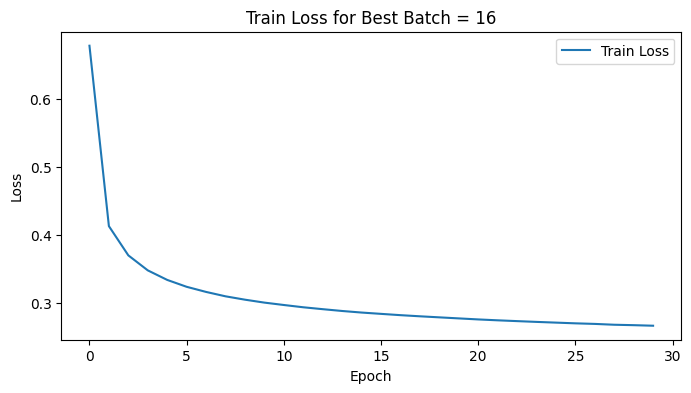

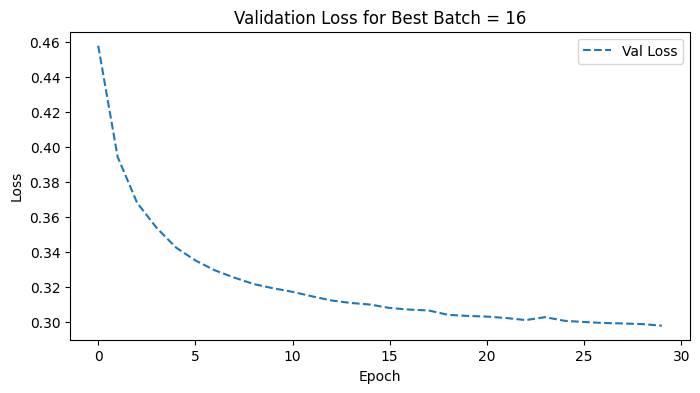

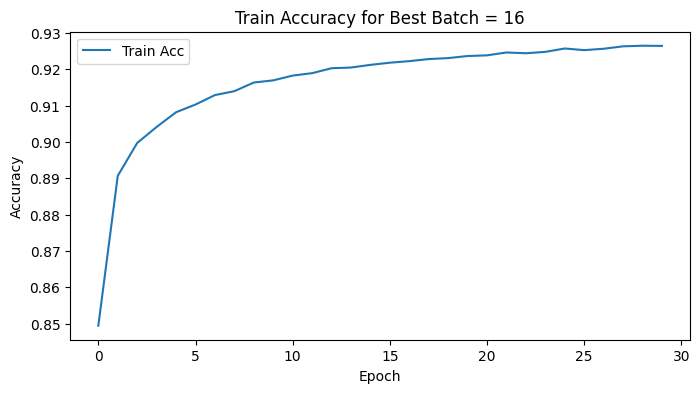

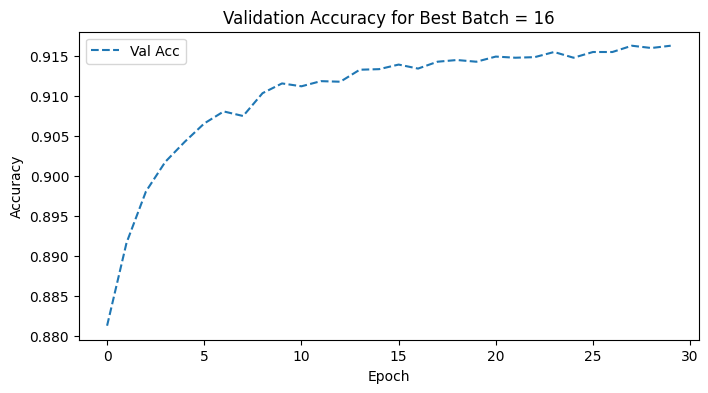

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define batch sizes to experiment with
batches = [16, 32, 64, 128]

# === Lists to store final metrics per batch ===
accuracies = []           # Final test accuracies
val_final_accs = []       # Final validation accuracies (for selection)
val_final_losses = []     # Final validation losses
train_final_losses = []   # Final training losses

# === To store all losses and accuracies per epoch for plotting ===
all_train_losses = []
all_val_losses = []
all_train_accs = []
all_val_accs = []

# Loop through each batch size
for batch in batches:
    print(f"\nTraining with batch size: {batch}")

    # Train the model
    W, b, train_losses, val_losses, train_accs, val_accs = softmax_learn_update(
        lr=0.01, batch_size=batch, epochs=30
    )

    # Store final metrics
    train_final_losses.append(train_losses[-1])
    val_final_losses.append(val_losses[-1])
    val_final_accs.append(val_accs[-1])

    # Evaluate on test set
    y_pred_test = model(X_test_flat, W, b)
    loss_test = cross_entropy(y_pred_test, y_test_flat).item()
    acc_test = accuracy(y_pred_test, y_test_flat).item()
    accuracies.append(acc_test)

    # Store full curves
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accs.append(train_accs)
    all_val_accs.append(val_accs)

    print(f"Batch={batch} | Train Loss={train_losses[-1]:.4f} | Val Loss={val_losses[-1]:.4f} | "
          f"Val Acc={val_accs[-1]*100:.2f}% | Test Acc={acc_test*100:.2f}%")

# === Select best batch based on validation accuracy ===
best_batch_idx = np.argmax(val_final_accs)
best_batch = batches[best_batch_idx]
print(f"\nBest batch size based on validation accuracy = {best_batch}")

# === Extract curves for best batch ===
train_losses_best = all_train_losses[best_batch_idx]
val_losses_best = all_val_losses[best_batch_idx]
train_accs_best = all_train_accs[best_batch_idx]
val_accs_best = all_val_accs[best_batch_idx]

# === Optional: Summary table ===
results = pd.DataFrame({
    "Batch Size": batches,
    "Train Loss": train_final_losses,
    "Val Loss": val_final_losses,
    "Val Accuracy": np.array(val_final_accs)*100,
    "Test Accuracy": np.array(accuracies)*100
})

print("\nBatch Comparison Summary:")
print(results.round(4))

# === Plot Train Loss ===
plt.figure(figsize=(8,4))
plt.plot(train_losses_best, label='Train Loss')
plt.title(f'Train Loss for Best Batch = {best_batch}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === Plot Validation Loss ===
plt.figure(figsize=(8,4))
plt.plot(val_losses_best, '--', label='Val Loss')
plt.title(f'Validation Loss for Best Batch = {best_batch}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# === Plot Train Accuracy ===
plt.figure(figsize=(8,4))
plt.plot(train_accs_best, label='Train Acc')
plt.title(f'Train Accuracy for Best Batch = {best_batch}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# === Plot Validation Accuracy ===
plt.figure(figsize=(8,4))
plt.plot(val_accs_best, '--', label='Val Acc')
plt.title(f'Validation Accuracy for Best Batch = {best_batch}')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


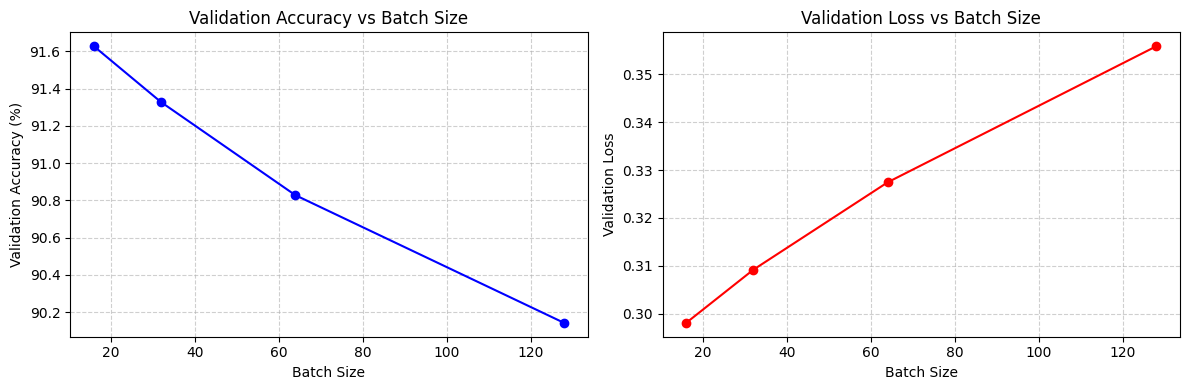

In [71]:
# === Compare Validation Accuracy and Loss Across Batch Sizes ===
plt.figure(figsize=(12, 4))

# ---- Left: Validation Accuracy vs Batch Size ----
plt.subplot(1, 2, 1)
plt.plot(batches, np.array(val_final_accs)*100, marker='o', color='blue')
plt.xlabel('Batch Size')
plt.ylabel('Validation Accuracy (%)')
plt.title('Validation Accuracy vs Batch Size')
plt.grid(True, linestyle='--', alpha=0.6)

# ---- Right: Validation Loss vs Batch Size ----
plt.subplot(1, 2, 2)
plt.plot(batches, val_final_losses, marker='o', color='red')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Batch Size')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


Interpretation:

Lower stability (low std) → smoother loss curve → stable training

Higher stability (high std) → rapid loss fluctuations → unstable training

You can summarize like this:

As the learning rate increases, the standard deviation of loss change (Δloss) becomes larger, indicating greater oscillation and instability in optimization.

LR = 0.001 → Very stable but slow convergence

LR = 0.01 → Balanced stability and speed (best region)

LR = 0.1 → Noticeable fluctuations, near instability

LR = 1.0 → Highly unstable — loss oscillates and fails to converge

# Custom Neural Networks using Pytorch

In this section, we define a **fully connected feedforward neural network (MLP)** using PyTorch's `nn.Module`.
The network is designed to classify 28×28 grayscale images (MNIST digits) into one of 10 classes (digits 0-9).
## Model Structure
The model consists of:

1. **Input layer** – 784 input features (flattened 28×28 image)

2. **Hidden Layers** – A configurable number (`hidden_layers`) of fully connected (linear) layers. Each has `hidden_units` neurons.

3. **Output layer** – 10 neurons (one per class)

Each **linear layer** performs the transformation:
$$
y=xA^T + b
$$
After each linear transformation (except the output), we apply the **ReLU activation function**:
$$
ReLU(x)=max(0,x)
$$
## Weight Initialization
To improve convergence and training stability, all weights are initialized using **Xavier (Glorot) initialization**, which maintains consistent variance of activations between layers.
Biases are initialized to zero.

### Xavier (Glorot) initialization
This method sets the initial weight values based on the number of input and output connections for each neuron:
$$
Var(𝑊)= \frac{2}{(n_{in}+n_{out})}
$$
where:

- $n_{in}$ : number of input units to the layer
- $n_{out}$ : number of output units from the layer

The main goal is to keep the **variance of activations and gradients consistent** across layers, preventing them from shrinking (vanishing) or growing (exploding) during forward and backward passes.
This leads to more stable and faster training.

The *output layer* produces **raw scores (logits)**, which are later passed to a **loss function** `CrossEntropyLoss` *that internally applies `softmax` for probability computation.*

In [72]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size=784, output_size=10, hidden_layers=2, hidden_units=190):
        """
        A simple feedforward neural network.

        Args:
            input_size (int): Number of input features (e.g., 28x28 = 784 pixels)
            hidden_layers (int): Number of hidden layers
            hidden_units (int): Number of neurons per hidden layer
            output_size (int): Number of output classes (e.g., 10 for digits 0–9)
        """
        super(NeuralNet, self).__init__()

        layers = []
        in_features = input_size

        for _ in range(hidden_layers):
            linear = nn.Linear(in_features, hidden_units)
            nn.init.xavier_uniform_(linear.weight) # Xavier (Glorot) initialization for all weights
            nn.init.zeros_(linear.bias) # initialize biases to 0
            layers.append(linear)
            in_features = hidden_units

        # Output layer
        output = nn.Linear(in_features, output_size)
        nn.init.xavier_uniform_(output.weight)
        nn.init.zeros_(output.bias)

        self.hidden_layers = nn.ModuleList(layers)
        self.output = output


    def forward(self, x):

        # Pass input through all hidden layers
        for layer in self.hidden_layers:
            x = F.relu(layer(x))

        # Final output layer (no activation)
        return self.output(x)



### **Hyperparameters**
- Here we will create the batch size for the DataLoaders.
Batches (also called mini-batches) are short slices of the full dataset that we feed to the model during one forward/backward pass. Using batches instead of the entire dataset (full-batch) or a single sample at a time (stochastic) is the standard compromise in modern deep learning because it balances statistical efficiency, memory use, and hardware throughput.
  - A batch is a group of `B` samples processed together by the model in one forward pass; the optimizer then uses the aggregated gradients from that batch to update the model weights.
  - **Mini-batch gradient descent** computes an estimate of the true gradient using `B` samples rather than all `N` samples. That estimate is noisy (unbiased) but much cheaper to compute:
      - True Gradient:
  $$
  ∇L(w)=\frac{1}{N}∑_{i=1}^{N}∇_wℓ(x_i,y_i​;w)
  $$
      - Mini-batch estimate:

  $$
  \hat{g}_B=\frac{1}{B}∑_{i∈B​}∇_wℓ(x_iy_i​;w)
  $$
  - Using mini-batches reduces memory footprint, allows many more parameter updates per epoch, and enables efficient parallel computation on GPUs.

- Next we set number of epochs which is simply how long we are training for.


In [73]:
training_batch_size = 64
valid_batch_size = 64
# test_batch_size = len(test_dataset_flat)
test_batch_size = 64
num_epochs = 10


### Shuffling the dataset prevents overfitting as the order
# which you feed the data into the network may affect the weights of the network if the order remains static across all epochs
train_loader_flat = DataLoader(
   train_dataset_flat,     #data set to load from
   batch_size = training_batch_size,
    shuffle=True,            #randomly shuffle order each epoch
   drop_last=False
)
valid_loader_flat = DataLoader(
    valid_dataset_flat,
    batch_size=valid_batch_size,
    shuffle = False     #don't need to shuffle I only need to in training
    , drop_last=False
)
test_loader_flat = DataLoader(
    test_dataset_flat,
    batch_size=test_batch_size,
    shuffle = False
    , drop_last=False
)



### **Loss Function and Optimizer**
Here we define the **cost function**. It measures how far the model’s predictions are from the correct target labels.
- `nn.CrossEntropyLoss()` is used for multi-class classification.
- It combines:
  - A **Softmax activation** (to turn raw outputs -scores- into probabilities), and
  - A **Negative Log-Likelihood Loss** (to penalize incorrect predictions).
- The goal of training is to **minimize** this loss — meaning the model becomes better at predicting the correct class.
*$$
L = - \frac{1}{N}∑_{i=1}^{N}log p(y_i|x_i)
$$*
where *$p(y_i|x_i)$* is the predicted probability for the true class of sample.

Next, we define the optimizer parameters:
- `learning_rate`: controls how big each step is when updating model weights.
  - A **larger learning rate** makes learning faster but can cause instability or overshooting the optimal point.
  - A **smaller learning rate** makes learning slower but more stable.
- `momentum` helps the optimizer move smoothly toward the minimum of the loss function.
  - Without momentum, SGD might get stuck or zig-zag in narrow valleys of the loss surface.
  - With momentum, the optimizer builds up “speed” in directions where the gradient consistently points, helping it move past small local minima.


In [74]:
loss_function = nn.CrossEntropyLoss()
learning_rate = .01
momentum = .9

To make sure our training results are consistent every time we run the code, we fix the random seed and control PyTorch’s random behavior.

`random_seed = 1`

Sets a fixed number to control all random operations (e.g., weight initialization, data shuffling).

`torch.manual_seed(random_seed)`

Applies the seed to PyTorch’s random number generator so results are reproducible.

`torch.backends.cudnn.enabled = False`

Disables certain GPU optimizations that can make results slightly different between runs.
This helps ensure deterministic (repeatable) training, though it might run a bit slower.

In [75]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

### **Training the Model**

The `train()` function performs one full training epoch on the dataset using **mini-batch gradient descent**.  
Each epoch consists of multiple forward and backward passes over small batches of data (batch size = 64), allowing the model to gradually learn patterns and reduce error.

During training:
- The model parameters are updated using the **Stochastic Gradient Descent (SGD)** optimizer with momentum.
- The **Cross-Entropy Loss** function measures how well the model’s predictions match the true labels.
- The data is **shuffled each epoch** to prevent the network from memorizing the order of samples and to improve generalization.
- **Progress updates** are printed every few batches to monitor training dynamics.

At the end of each epoch:
- The **average training loss** is computed to summarize how well the model fit the data in that round.
- These loss values are stored and later visualized to assess learning trends and convergence.

This process allows the model to iteratively minimize its prediction error while avoiding overfitting through randomized data exposure.


In [76]:
from tqdm import tqdm

def train(epoch):

    epoch_losses = [] # store all batch losses in this epoch

    # This loop iterates through the dataset batch by batch using the DataLoader.
    # Each iteration returns:
    #   - batch_idx: the index of the current batch
    #   - images: a tensor of input data for this batch
    #   - labels: the corresponding true labels
    #
    # These batches are fetched using the __getitem__() method of the custom Dataset class.
    # Processing data in batches improves efficiency and stability during training.
    for batch_idx, (images, labels) in enumerate(tqdm(train_loader_flat, desc=f"Epoch {epoch}")):

        # Zero the gradients at the start of each batch.
        # Without this step, gradients from previous iterations would accumulate,
        # leading to incorrect gradient directions and unstable learning.
        # If this line is removed, the network will fail to converge,
        # and the loss will increase dramatically due to gradient buildup.
        optimizer.zero_grad()

        # Forward pass: feed the current batch of images into the neural network.
        # The output is a tensor of size [batch_size x 10] (for MNIST digits 0–9).
        # Each row corresponds to one image in the batch, and each column
        # represents the network’s confidence that the image belongs to that digit.
        # For example, for an image of a 9, the output might have the highest value
        # in column 9, meaning the model is most confident it’s a 9.
        # This output is then passed to the loss function for evaluation.
        output = neural_net(images)

        # Compute the loss by comparing the model’s predictions (output) with the true labels.
        # The loss function measures how far the predicted values are from the actual ones.
        # Loss is the total "error" the model makes for this batch.
        # Objective is to minimize this loss
        loss = loss_function(output, labels)

        # Compute the gradient of the loss with respect to each parameter in the network.
        # loss.backward() calculates d(loss)/d(x) for every parameter x that has requires_grad=True.
        # These gradients are stored in each parameter's .grad attribute,
        # the one which we rest at the start of the loop.
        # Essentially, this step tells us how much each weight contributed to the loss
        # and in which direction we should adjust it to minimize the error.
        loss.backward()

        # optimizer.step() is where the model's parameters (weights and biases) are updated.
        # After loss.backward() computes the gradients (stored in each parameter's .grad attribute),
        # this function applies those gradients to adjust the parameter values according to the
        # chosen optimization algorithm (in this case, SGD with momentum).
        # This is the point where the model actually "learns" — its parameters are modified
        # to minimize the loss based on the feedback from the previous forward and backward passes.
        optimizer.step()

        # Keep batch loss for statistics
        batch_loss = loss.item()
        epoch_losses.append(batch_loss)

        # Print progress every 100 batches to monitor training performance
        if batch_idx % training_batch_size == 0:

            # The print statement displays:
            #   - Current epoch number (epoch)
            #   - Number of training examples processed so far
            #     (batch_idx * training_batch_size)
            #   - Total number of training examples (len(train_dataset_flat))
            #   - The percentage of the current epoch completed
            #     (100 * batch_idx / len(train_loader_flat))
            #   - The current loss value for this batch (loss.item())
            # print('\nTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\n'.format(
            #         epoch, batch_idx * training_batch_size, len(train_dataset_flat),
            #         training_batch_size * batch_idx / len(train_loader_flat), loss.item()))
            train_losses.append(loss.item())

            train_counter.append((batch_idx * training_batch_size) + ((epoch - 1) * len(train_dataset_flat)))

    # Compute per-epoch mean and std (for error bars)
    epoch_loss_mean = np.mean(epoch_losses)
    epoch_std = np.std(epoch_losses)
    train_losses_mean.append(epoch_loss_mean)
    train_losses_std.append(epoch_std)

    print(f'===> Epoch: {epoch} Average loss: {epoch_loss_mean:.6f}')


### **Validating the Model**
- The validation function evaluates how well the model performs on unseen data after each training epoch (generalization).
- Unlike training, this step **does not update model parameters** — it only measures performance.
- This helps ensure the model is learning useful patterns rather than memorizing the training data.

In [77]:
def validate():

    # Initialize tracking variables for total loss and number of correct predictions.
    correct_guesses = 0

    epoch_losses = [] # store all batch losses in this epoch
    epoch_accuracies = []

    # Loop through the validation data loader to get image and label batches.
    # 'torch.no_grad()' disables gradient computation since we are not training here.
    # This saves memory and speeds up validation.
    with torch.no_grad():
        for images, labels in valid_loader_flat:

          # Forward pass: feed the current batch of images into the neural network.
          # The output is a tensor of size [batch_size x 10] (for MNIST digits 0–9).
          # Each row corresponds to one image in the batch, and each column
          # represents the network’s confidence that the image belongs to that digit.
          # For example, for an image of a 9, the output might have the highest value
          # in column 9, meaning the model is most confident it’s a 9.
          # This output is then passed to the loss function for evaluation
          output = neural_net(images)

          # Compute the loss for the current batch and convert it to a scalar with .item().
          # Add it to the running total test_loss — we'll divide later to get the average loss.
          batch_loss = loss_function(output, labels).item()
          epoch_losses.append(batch_loss)

          # The output tensor from the network contains, for each image in the batch,
          # ten values representing the model’s confidence for each digit class (0–9).
          # The higher the value, the more confident the model is that the image belongs to that class.
          #
          # For example, if the output for one image is:
          # [1.2, -0.5, 3.1, 0.7, -2.0, 0.3, 0.1, -0.8, 2.5, -1.1]
          # the highest value (3.1) is at index 2, meaning the model predicts the digit “2”.
          #
          # The function torch.max(output, 1) returns two things:
          #   [0] → the maximum value itself (confidence score)
          #   [1] → the index of that maximum (predicted class)
          #
          # Since we only care about which digit was predicted, we take [1].
          # Setting keepdim=True keeps the tensor shape consistent with the labels tensor,
          # which helps when we compare predictions and ground-truth values later.
          #
          # If [0] were used instead, we’d just get the raw confidence scores instead of the predicted digit.
          #
          # In short, `guesses` holds the predicted class (0–9) for each image in the batch.
          guesses = torch.max(output, 1, keepdim = True)[1]


          # Compare predictions with true labels, count correct ones, and add to total.
          # torch.eq() returns 1 where guess matches label, 0 otherwise.
          # view_as() reshapes labels to match guesses so they can be compared element-wise.
          # Example:
          #   guesses = [2, 0, 9, 3, 1]
          #   labels  = [2, 1, 9, 3, 4]
          #   torch.eq(guesses, labels.view_as(guesses)) -> [1, 0, 1, 1, 0]
          #   sum -> 3 correct predictions in this batch
          correct= torch.eq(guesses, labels.data.view_as(guesses)).sum()
          correct_guesses += correct

          batch_accuracy = correct / float(len(labels))  # batch-level accuracy
          epoch_accuracies.append(batch_accuracy)

        # Compute average test loss over all batches.
        # Divide the total batch losses by the number of batches.
        # Example: 10000 images / 1000 batch size = 10 batches.
        # Store this average in test_losses to track performance over epochs.
        epoch_loss_mean = np.mean(epoch_losses)
        valid_losses.append(epoch_loss_mean)
        valid_losses_mean.append(epoch_loss_mean)
        valid_losses_std.append(np.std(epoch_losses))

        # Calculate accuracy for the test set.
        # Divide the number of correct guesses by the total number of test samples
        # to get the percentage of correct predictions.
        # Append this value to valid_accuracy to track accuracy over epochs.
        epoch_accuracy_mean = np.mean(epoch_accuracies)
        valid_accuracy.append(epoch_accuracy_mean)
        valid_accuracy_mean.append(np.mean(epoch_accuracies))
        valid_accuracy_std.append(np.std(epoch_accuracies))

        # Print results for this validation run.
        # Shows the average loss, number of correct predictions,
        # total number of samples, and the accuracy percentage.
        print('\nValid set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
                epoch_loss_mean, correct_guesses, len(valid_dataset_flat),
                100. * epoch_accuracy_mean))

In [78]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate():
    neural_net.eval()
    total_loss = 0
    correct = 0

    # Initialize lists to store predictions and labels
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader_flat:
            output = neural_net(images)
            total_loss += loss_function(output, labels).item()

            preds = torch.max(output, 1)[1]
            correct += preds.eq(labels).sum().item()

            # Store results for confusion matrix
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    total_loss /= len(test_dataset_flat) / test_batch_size
    accuracy = correct / len(test_dataset_flat)

    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        total_loss, correct, len(test_dataset_flat),
        100. * accuracy))

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return total_loss, accuracy, cm


# Model Training and Evaluation Loop
In this section, we train and evaluate the neural network over multiple epochs, track the losses and accuracy, and visualize the results.

## 1. Setup
- The neural network model (`NeuralNet`) is initialized.
- The optimizer is defined as **Stochastic Gradient Descent (SGD)** with a specified learning rate and momentum.
- Lists are initialized to store and track progress:
  - `train_losses`: training loss after selected batches.
  - `train_counter`: number of training examples processed so far.
  - `valid_losses`: average validation loss after each epoch.
  - `valid_accuracy`: model accuracy on the validation set after each epoch.
  - `valid_counter`: corresponding x-axis values showing how many images have been seen at each validation step.

## 2. Training and Validation
- Before starting training, the model is evaluated once on the validation set (`validate()`) to record its baseline performance before any learning.
- The training loop then runs for a defined number of epoch (`num_epochs`)
  1. Each epoch calls the `train(epoch)` function, which:
      - Passes batches of training data through the model.
      - Calculates loss using the cross-entropy criterion.
      - Updates model parameters through backpropagation.
      - Records batch losses for visualization.

  2. After each epoch, the `validate()` function evaluates the model on the validation dataset:
      - Computes the average loss and classification accuracy.
      - Stores these metrics for later plotting.

## 3. Performance Tracking
- After all epochs finish:
    - The total number of epochs is printed.
    - The **maximum validation** accuracy achieved is displayed.
    - The training and validation losses, along with accuracy, are plotted for performance visualization:
        - **Blue line**: Training loss (decreases as model learns)
        - **Red points**: Validation loss (helps detect overfitting)
        - **Green points**: Validation accuracy (indicates generalization performance)

## 4. Early Stopping and Best Model Selection
- During training, the model continuously checks whether validation accuracy improves.
- If there is no improvement for a specified number of epochs (`patience`), training stops early.
- The model parameters corresponding to the **best validation accuracy** are saved and restored before final testing.

## 5. Final Evaluation
- The best-performing model is evaluated on the **test dataset** using `evaluate()`.
- This gives an unbiased measure of how well the model performs on unseen data.



Valid set: Avg. loss: 2.3006, Accuracy: 1599/14000 (11%)



Epoch 1: 100%|██████████| 657/657 [00:03<00:00, 170.93it/s]


===> Epoch: 1 Average loss: 0.369446

Valid set: Avg. loss: 0.1818, Accuracy: 13246/14000 (95%)

✅ New best model found at epoch 1 with accuracy 0.9462 and loss 0.1818


Epoch 2: 100%|██████████| 657/657 [00:03<00:00, 164.30it/s]


===> Epoch: 2 Average loss: 0.141738

Valid set: Avg. loss: 0.1607, Accuracy: 13326/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9519 and loss 0.1607


Epoch 3: 100%|██████████| 657/657 [00:04<00:00, 139.18it/s]


===> Epoch: 3 Average loss: 0.095076

Valid set: Avg. loss: 0.1191, Accuracy: 13484/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9631 and loss 0.1191


Epoch 4: 100%|██████████| 657/657 [00:04<00:00, 157.68it/s]


===> Epoch: 4 Average loss: 0.066872

Valid set: Avg. loss: 0.0996, Accuracy: 13581/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9701 and loss 0.0996


Epoch 5: 100%|██████████| 657/657 [00:04<00:00, 153.36it/s]


===> Epoch: 5 Average loss: 0.047524

Valid set: Avg. loss: 0.1088, Accuracy: 13547/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 657/657 [00:04<00:00, 146.13it/s]


===> Epoch: 6 Average loss: 0.038179

Valid set: Avg. loss: 0.1111, Accuracy: 13565/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 7: 100%|██████████| 657/657 [00:04<00:00, 156.81it/s]


===> Epoch: 7 Average loss: 0.027270

Valid set: Avg. loss: 0.0910, Accuracy: 13628/14000 (97%)

✅ New best model found at epoch 7 with accuracy 0.9734 and loss 0.0910


Epoch 8: 100%|██████████| 657/657 [00:04<00:00, 136.25it/s]


===> Epoch: 8 Average loss: 0.019705

Valid set: Avg. loss: 0.0839, Accuracy: 13658/14000 (98%)

✅ New best model found at epoch 8 with accuracy 0.9756 and loss 0.0839


Epoch 9: 100%|██████████| 657/657 [00:05<00:00, 118.74it/s]


===> Epoch: 9 Average loss: 0.013561

Valid set: Avg. loss: 0.0893, Accuracy: 13662/14000 (98%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:04<00:00, 135.97it/s]


===> Epoch: 10 Average loss: 0.008889

Valid set: Avg. loss: 0.0868, Accuracy: 13678/14000 (98%)

⚠️ No improvement for 2 epoch(s)

Final Evaluation on Test Set (Best Model):

Test set: Avg. loss: 0.0866, Accuracy: 13694/14000 (98%)



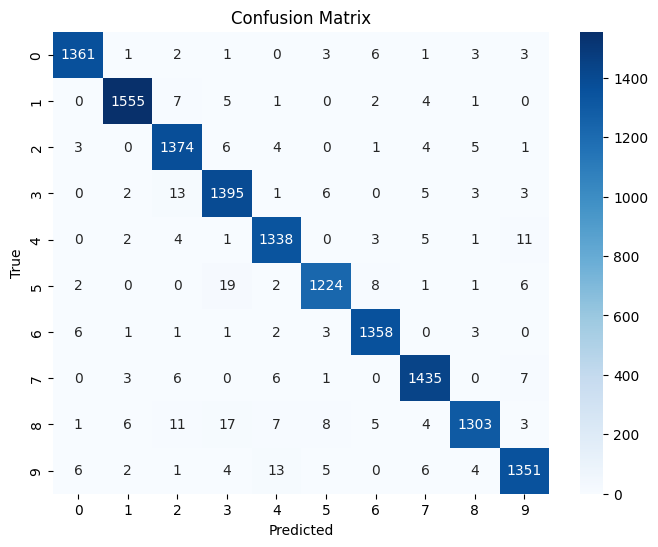

In [81]:
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import confusion_matrix

if __name__ == "__main__":

    # Set model and optimizer
    # neural_net = NeuralNet()
    input_size = train_dataset_flat.tensors[0].shape[1]   # number of features
    output_size = len(torch.unique(train_dataset_flat.tensors[1]))  # number of unique labels

    neural_net = NeuralNet(input_size, output_size, 3, 512)

    learning_rate = 0.01
    momentum = 0.9

    optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

    # Clear tracking lists
    train_losses = []
    train_counter = []
    valid_losses = []
    valid_accuracy = []
    valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

    # Store per-epoch statistics
    train_losses_mean = []
    train_losses_std = []
    valid_losses_mean = []
    valid_losses_std = []
    valid_accuracy_mean = []
    valid_accuracy_std = []

    # Early stopping and best model setup
    early_stopping = False
    best_acc = 0.0
    best_loss = float('inf')
    best_model_state = None
    patience = 5          # stop if no improvement for these many epochs
    patience_counter = 0  # how many epochs since last improvement

    validate()
    for epoch in range(1, num_epochs + 1):
        train(epoch)

        validate()

        current_acc = valid_accuracy[-1]
        current_loss = valid_losses[-1]

        # Check for improvement
        if current_acc > best_acc and current_loss <= best_loss:
            best_acc = current_acc
            best_loss = current_loss
            best_model_state = neural_net.state_dict().copy()
            patience_counter = 0
            print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
        else:
            patience_counter += 1
            print(f"⚠️ No improvement for {patience_counter} epoch(s)")


        # Early stopping trigger
        if patience_counter >= patience and early_stopping:
            print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
            break

    # Restore best model before test evaluation
    if early_stopping:
        print("Restoring best model state...")
        neural_net.load_state_dict(best_model_state)

    print("\nFinal Evaluation on Test Set (Best Model):")
    nn_test_loss, nn_test_accuracy, cm= evaluate()

    # print('Total epochs trained: {}'.format(epoch))
    # print('Best Validation Accuracy: {}%'.format(round(100 * best_acc, 2)))
    # print('Best Validation Loss: {}'.format(round(best_loss, 4)))


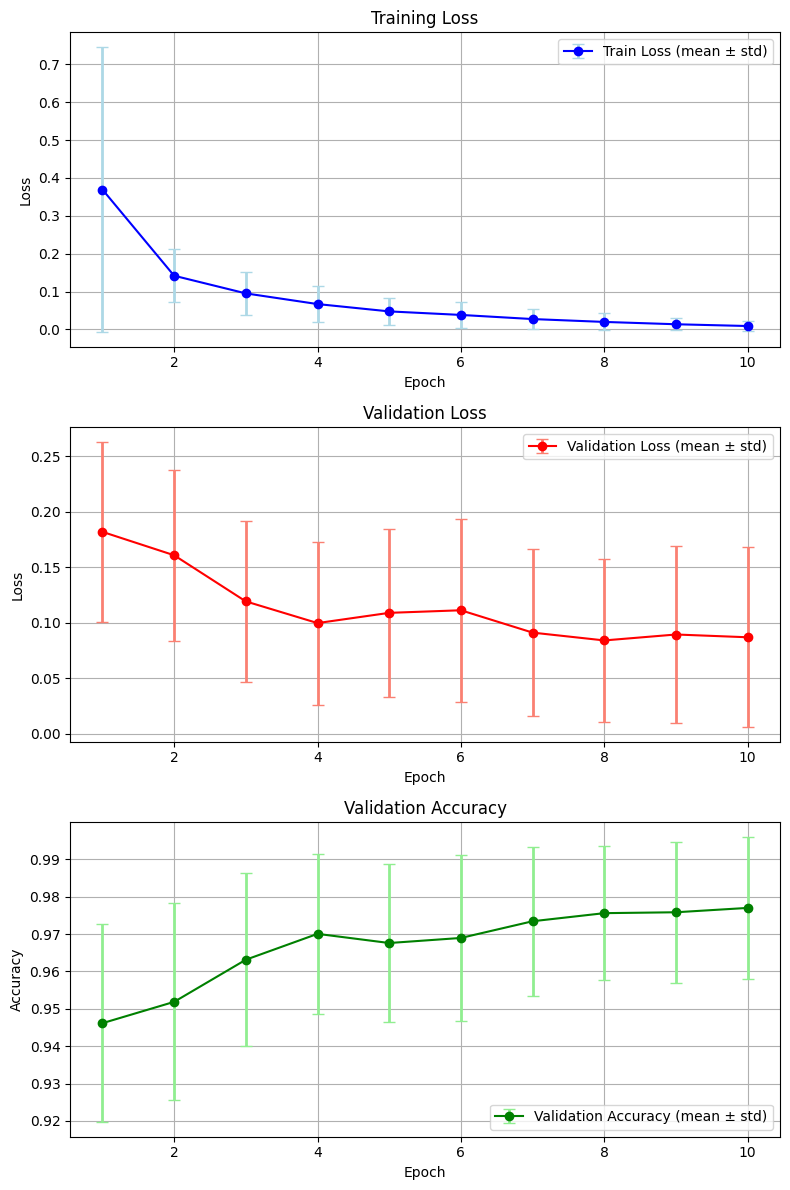

In [82]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses_mean) + 1)

# Create a figure with 3 vertically stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# --- Plot 1: Training Loss ---
axs[0].errorbar(
    epochs,
    train_losses_mean,
    yerr=train_losses_std,
    fmt='-o',
    color='blue',
    ecolor='lightblue',
    elinewidth=2,
    capsize=4,
    label='Train Loss (mean ± std)'
)
axs[0].set_title('Training Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Validation Loss ---
axs[1].errorbar(
    epochs,
    valid_losses_mean[1:],
    yerr=valid_losses_std[1:],
    fmt='-o',
    color='red',
    ecolor='salmon',
    elinewidth=2,
    capsize=4,
    label='Validation Loss (mean ± std)'
)
axs[1].set_title('Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# --- Plot 3: Validation Accuracy ---
axs[2].errorbar(
    epochs,
    valid_accuracy_mean[1:],
    yerr=valid_accuracy_std[1:],
    fmt='-o',
    color='green',
    ecolor='lightgreen',
    elinewidth=2,
    capsize=4,
    label='Validation Accuracy (mean ± std)'
)
axs[2].set_title('Validation Accuracy')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Accuracy')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


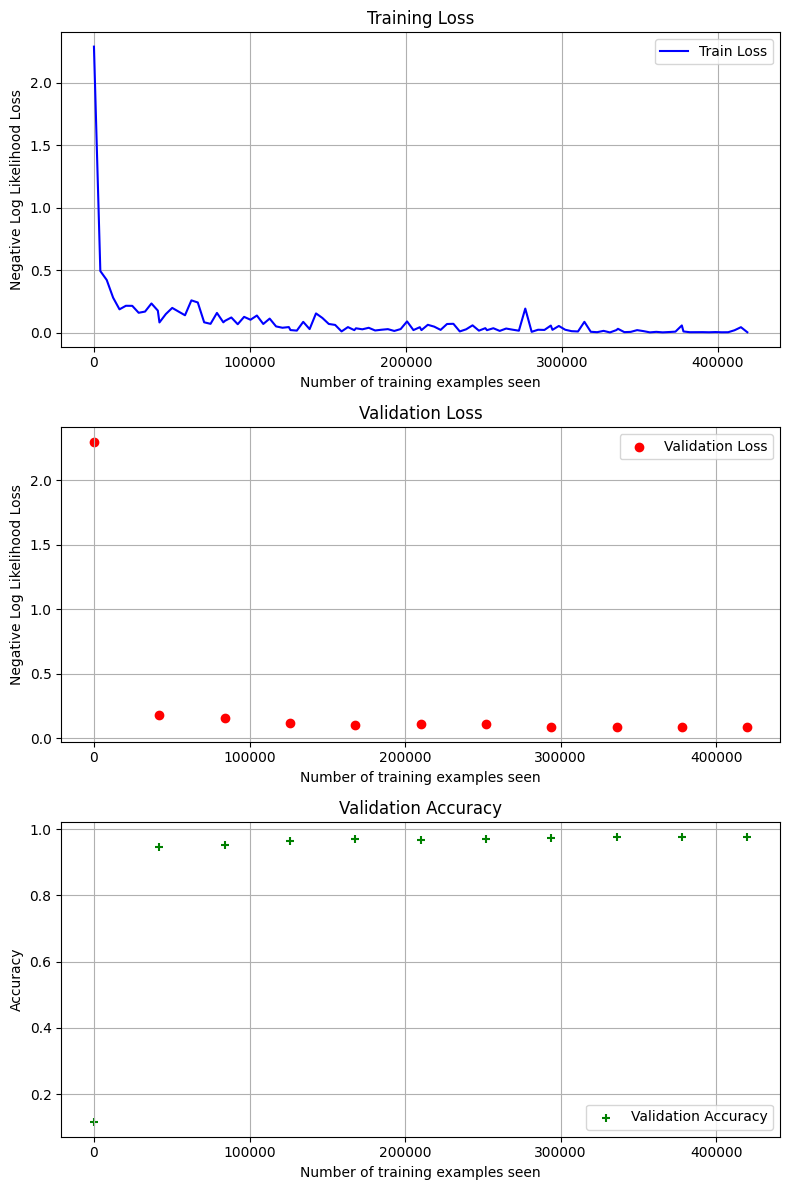

In [83]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 column, 3 rows)
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# --- Plot 1: Training Loss ---
axs[0].plot(train_counter, train_losses, color='blue', label='Train Loss')
axs[0].set_xlabel('Number of training examples seen')
axs[0].set_ylabel('Negative Log Likelihood Loss')
axs[0].set_title('Training Loss')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: Validation Loss ---
axs[1].scatter(valid_counter[:len(valid_losses)], valid_losses, color='red', label='Validation Loss')
axs[1].set_xlabel('Number of training examples seen')
axs[1].set_ylabel('Negative Log Likelihood Loss')
axs[1].set_title('Validation Loss')
axs[1].legend()
axs[1].grid(True)

# --- Plot 3: Validation Accuracy ---
axs[2].scatter(valid_counter[:len(valid_accuracy)], valid_accuracy, color='green', marker='+', label='Validation Accuracy')
axs[2].set_xlabel('Number of training examples seen')
axs[2].set_ylabel('Accuracy')
axs[2].set_title('Validation Accuracy')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


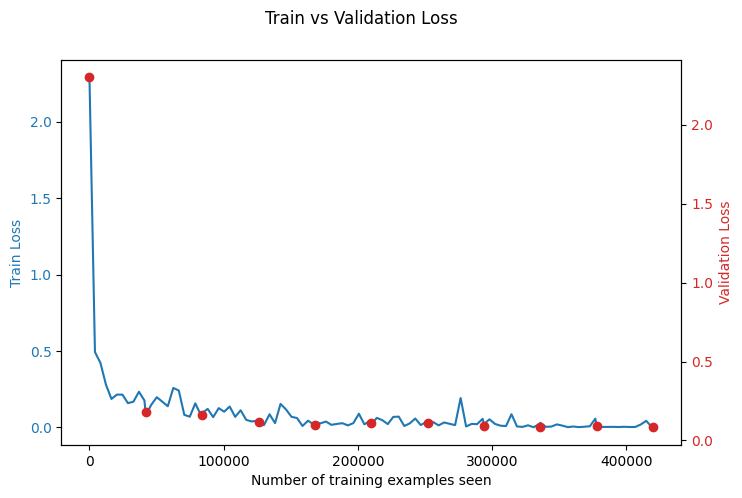

In [84]:
# Convergence Analysis
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.plot(train_counter, train_losses, color=color, label='Train Loss')
ax1.set_xlabel('Number of training examples seen')
ax1.set_ylabel('Train Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.scatter(valid_counter[:len(valid_losses)], valid_losses, color=color, label='Validation Loss')
ax2.set_ylabel('Validation Loss', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Train vs Validation Loss')
plt.show()


# Hyperparameter Analysis

## **Learning Rate Analysis**

In [85]:
import matplotlib.pyplot as plt
import torch

if __name__ == "__main__":

    learning_rates = [0.001, 0.01, 0.05, 0.1]
    lr_results = []
    momentum = 0.9
    num_epochs = 10
    training_batch_size = 64
    valid_batch_size = 64
    early_stopping = True
    patience = 5


    for lr in learning_rates:
      print(f"\n============================")
      print(f"Starting training with learning rate = {lr}")
      print(f"============================\n")

      # Set global variable
      learning_rate = lr


      # Set model and optimizer
      neural_net = NeuralNet()
      optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

      # Clear tracking lists
      train_losses = []
      train_counter = []
      valid_losses = []
      valid_accuracy = []
      valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

      # Store per-epoch statistics
      train_losses_mean = []
      train_losses_std = []
      valid_losses_mean = []
      valid_losses_std = []
      valid_accuracy_mean = []
      valid_accuracy_std = []

      # Early stopping and best model setup
      best_acc = 0.0
      best_loss = float('inf')
      best_model_state = None
      patience_counter = 0  # how many epochs since last improvement

      validate() # initial validation
      for epoch in range(1, num_epochs + 1):
          train(epoch)

          validate()

          current_acc = valid_accuracy[-1]
          current_loss = valid_losses[-1]

          # Check for improvement
          if current_acc > best_acc and current_loss <= best_loss:
              best_acc = current_acc
              best_loss = current_loss
              best_model_state = neural_net.state_dict().copy()
              patience_counter = 0
              print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
          else:
              patience_counter += 1
              print(f"⚠️ No improvement for {patience_counter} epoch(s)")


          # Early stopping trigger
          if patience_counter >= patience and early_stopping:
              print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
              break

      # # Restore best model before test evaluation
      # if early_stopping:
      #     print("Restoring best model state...")
      #     neural_net.load_state_dict(best_model_state)

      lr_results.append((lr, best_acc, best_loss, epoch))

      print('Total epochs trained: {}'.format(epoch))
      print(f'Best Validation Accuracy: {100 * best_acc:.2f}%')
      print('Best Validation Loss: {}'.format(round(best_loss, 4)))




Starting training with learning rate = 0.001


Valid set: Avg. loss: 2.3169, Accuracy: 1302/14000 (9%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 423.36it/s]


===> Epoch: 1 Average loss: 1.025536

Valid set: Avg. loss: 0.4969, Accuracy: 12171/14000 (87%)

✅ New best model found at epoch 1 with accuracy 0.8694 and loss 0.4969


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 409.82it/s]


===> Epoch: 2 Average loss: 0.411246

Valid set: Avg. loss: 0.3717, Accuracy: 12520/14000 (89%)

✅ New best model found at epoch 2 with accuracy 0.8943 and loss 0.3717


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 409.70it/s]


===> Epoch: 3 Average loss: 0.333243

Valid set: Avg. loss: 0.3237, Accuracy: 12695/14000 (91%)

✅ New best model found at epoch 3 with accuracy 0.9067 and loss 0.3237


Epoch 4: 100%|██████████| 657/657 [00:01<00:00, 425.80it/s]


===> Epoch: 4 Average loss: 0.295742

Valid set: Avg. loss: 0.2987, Accuracy: 12797/14000 (91%)

✅ New best model found at epoch 4 with accuracy 0.9140 and loss 0.2987


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 419.63it/s]


===> Epoch: 5 Average loss: 0.270533

Valid set: Avg. loss: 0.2786, Accuracy: 12889/14000 (92%)

✅ New best model found at epoch 5 with accuracy 0.9206 and loss 0.2786


Epoch 6: 100%|██████████| 657/657 [00:02<00:00, 295.80it/s]


===> Epoch: 6 Average loss: 0.251383

Valid set: Avg. loss: 0.2646, Accuracy: 12943/14000 (92%)

✅ New best model found at epoch 6 with accuracy 0.9245 and loss 0.2646


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 384.28it/s]


===> Epoch: 7 Average loss: 0.235023

Valid set: Avg. loss: 0.2517, Accuracy: 12989/14000 (93%)

✅ New best model found at epoch 7 with accuracy 0.9277 and loss 0.2517


Epoch 8: 100%|██████████| 657/657 [00:01<00:00, 404.25it/s]


===> Epoch: 8 Average loss: 0.220527

Valid set: Avg. loss: 0.2372, Accuracy: 13044/14000 (93%)

✅ New best model found at epoch 8 with accuracy 0.9317 and loss 0.2372


Epoch 9: 100%|██████████| 657/657 [00:01<00:00, 408.69it/s]


===> Epoch: 9 Average loss: 0.207884

Valid set: Avg. loss: 0.2269, Accuracy: 13068/14000 (93%)

✅ New best model found at epoch 9 with accuracy 0.9334 and loss 0.2269


Epoch 10: 100%|██████████| 657/657 [00:01<00:00, 398.81it/s]


===> Epoch: 10 Average loss: 0.196935

Valid set: Avg. loss: 0.2185, Accuracy: 13133/14000 (94%)

✅ New best model found at epoch 10 with accuracy 0.9380 and loss 0.2185
Total epochs trained: 10
Best Validation Accuracy: 93.80%
Best Validation Loss: 0.2185

Starting training with learning rate = 0.01


Valid set: Avg. loss: 2.3202, Accuracy: 1524/14000 (11%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 415.90it/s]


===> Epoch: 1 Average loss: 0.411191

Valid set: Avg. loss: 0.2276, Accuracy: 13084/14000 (93%)

✅ New best model found at epoch 1 with accuracy 0.9346 and loss 0.2276


Epoch 2: 100%|██████████| 657/657 [00:02<00:00, 296.74it/s]


===> Epoch: 2 Average loss: 0.176551

Valid set: Avg. loss: 0.1758, Accuracy: 13276/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9483 and loss 0.1758


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 408.25it/s]


===> Epoch: 3 Average loss: 0.125781

Valid set: Avg. loss: 0.1486, Accuracy: 13383/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9560 and loss 0.1486


Epoch 4: 100%|██████████| 657/657 [00:01<00:00, 402.02it/s]


===> Epoch: 4 Average loss: 0.096373

Valid set: Avg. loss: 0.1187, Accuracy: 13512/14000 (97%)

✅ New best model found at epoch 4 with accuracy 0.9652 and loss 0.1187


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 405.75it/s]


===> Epoch: 5 Average loss: 0.075656

Valid set: Avg. loss: 0.1104, Accuracy: 13542/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9673 and loss 0.1104


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 396.41it/s]


===> Epoch: 6 Average loss: 0.061066

Valid set: Avg. loss: 0.1068, Accuracy: 13550/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9679 and loss 0.1068


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 392.86it/s]


===> Epoch: 7 Average loss: 0.050258

Valid set: Avg. loss: 0.0966, Accuracy: 13603/14000 (97%)

✅ New best model found at epoch 7 with accuracy 0.9717 and loss 0.0966


Epoch 8: 100%|██████████| 657/657 [00:02<00:00, 289.98it/s]


===> Epoch: 8 Average loss: 0.041038

Valid set: Avg. loss: 0.1046, Accuracy: 13569/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:01<00:00, 377.53it/s]


===> Epoch: 9 Average loss: 0.034010

Valid set: Avg. loss: 0.0924, Accuracy: 13618/14000 (97%)

✅ New best model found at epoch 9 with accuracy 0.9727 and loss 0.0924


Epoch 10: 100%|██████████| 657/657 [00:01<00:00, 387.66it/s]


===> Epoch: 10 Average loss: 0.027090

Valid set: Avg. loss: 0.0910, Accuracy: 13636/14000 (97%)

✅ New best model found at epoch 10 with accuracy 0.9740 and loss 0.0910
Total epochs trained: 10
Best Validation Accuracy: 97.40%
Best Validation Loss: 0.091

Starting training with learning rate = 0.05


Valid set: Avg. loss: 2.3148, Accuracy: 1494/14000 (11%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 421.02it/s]


===> Epoch: 1 Average loss: 0.280207

Valid set: Avg. loss: 0.1654, Accuracy: 13275/14000 (95%)

✅ New best model found at epoch 1 with accuracy 0.9482 and loss 0.1654


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 386.89it/s]


===> Epoch: 2 Average loss: 0.109297

Valid set: Avg. loss: 0.1191, Accuracy: 13489/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9635 and loss 0.1191


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 367.28it/s]


===> Epoch: 3 Average loss: 0.072706

Valid set: Avg. loss: 0.1070, Accuracy: 13557/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9683 and loss 0.1070


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 270.83it/s]


===> Epoch: 4 Average loss: 0.052221

Valid set: Avg. loss: 0.1144, Accuracy: 13544/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 355.28it/s]


===> Epoch: 5 Average loss: 0.041598

Valid set: Avg. loss: 0.0982, Accuracy: 13588/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9706 and loss 0.0982


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 332.85it/s]


===> Epoch: 6 Average loss: 0.028584

Valid set: Avg. loss: 0.1019, Accuracy: 13627/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 352.25it/s]


===> Epoch: 7 Average loss: 0.021711

Valid set: Avg. loss: 0.1070, Accuracy: 13626/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 8: 100%|██████████| 657/657 [00:01<00:00, 352.05it/s]


===> Epoch: 8 Average loss: 0.019582

Valid set: Avg. loss: 0.1081, Accuracy: 13639/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:02<00:00, 295.04it/s]


===> Epoch: 9 Average loss: 0.013216

Valid set: Avg. loss: 0.1160, Accuracy: 13600/14000 (97%)

⚠️ No improvement for 4 epoch(s)


Epoch 10: 100%|██████████| 657/657 [00:02<00:00, 307.76it/s]


===> Epoch: 10 Average loss: 0.011822

Valid set: Avg. loss: 0.1030, Accuracy: 13648/14000 (97%)

⚠️ No improvement for 5 epoch(s)
⏹️ Early stopping at epoch 10 — no improvement for 5 consecutive epochs.
Total epochs trained: 10
Best Validation Accuracy: 97.06%
Best Validation Loss: 0.0982

Starting training with learning rate = 0.1


Valid set: Avg. loss: 2.3546, Accuracy: 1251/14000 (9%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 420.09it/s]


===> Epoch: 1 Average loss: 0.282512

Valid set: Avg. loss: 0.1476, Accuracy: 13378/14000 (96%)

✅ New best model found at epoch 1 with accuracy 0.9556 and loss 0.1476


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 355.80it/s]


===> Epoch: 2 Average loss: 0.126955

Valid set: Avg. loss: 0.1354, Accuracy: 13465/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9618 and loss 0.1354


Epoch 3: 100%|██████████| 657/657 [00:01<00:00, 328.67it/s]


===> Epoch: 3 Average loss: 0.093944

Valid set: Avg. loss: 0.1244, Accuracy: 13511/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9651 and loss 0.1244


Epoch 4: 100%|██████████| 657/657 [00:02<00:00, 305.12it/s]


===> Epoch: 4 Average loss: 0.078586

Valid set: Avg. loss: 0.1384, Accuracy: 13469/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 657/657 [00:02<00:00, 270.73it/s]


===> Epoch: 5 Average loss: 0.059989

Valid set: Avg. loss: 0.1330, Accuracy: 13495/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 6: 100%|██████████| 657/657 [00:02<00:00, 318.84it/s]


===> Epoch: 6 Average loss: 0.052000

Valid set: Avg. loss: 0.1246, Accuracy: 13550/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 7: 100%|██████████| 657/657 [00:02<00:00, 322.98it/s]


===> Epoch: 7 Average loss: 0.042499

Valid set: Avg. loss: 0.1277, Accuracy: 13583/14000 (97%)

⚠️ No improvement for 4 epoch(s)


Epoch 8: 100%|██████████| 657/657 [00:02<00:00, 318.49it/s]


===> Epoch: 8 Average loss: 0.040983

Valid set: Avg. loss: 0.1418, Accuracy: 13543/14000 (97%)

⚠️ No improvement for 5 epoch(s)
⏹️ Early stopping at epoch 8 — no improvement for 5 consecutive epochs.
Total epochs trained: 8
Best Validation Accuracy: 96.51%
Best Validation Loss: 0.1244


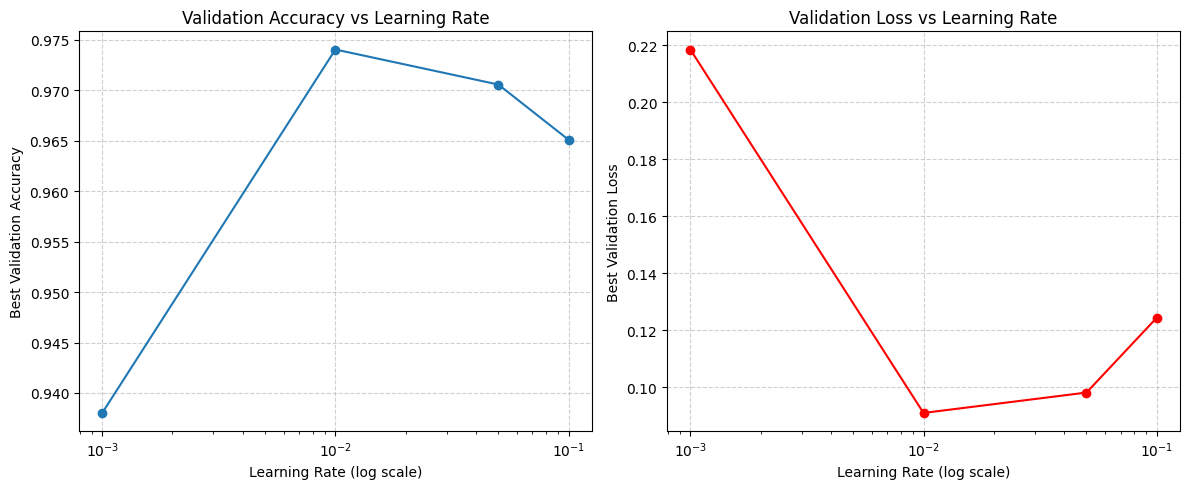


📊 Summary of Learning Rate Experiments:
LR=0.001    | Acc= 93.80% | Loss=0.2185 | Epochs=10
LR=0.01     | Acc= 97.40% | Loss=0.0910 | Epochs=10
LR=0.05     | Acc= 97.06% | Loss=0.0982 | Epochs=10
LR=0.1      | Acc= 96.51% | Loss=0.1244 | Epochs=8

🏆 Best learning rate: 0.01 with accuracy 97.40% and loss 0.0910

🧠 Analysis:
- The best learning rate (0.01) balances fast convergence and stability.
- Lower learning rates likely caused underfitting; higher ones may have led to instability or overshooting.


In [86]:
# --- Analysis ---
results = sorted(lr_results, key=lambda x: x[0])
lrs = [r[0] for r in results]
accs = [r[1] for r in results]
losses = [r[2] for r in results]
epochs = [r[3] if len(r) > 3 else None for r in results]

# --- Plotting ---
plt.figure(figsize=(12, 5))

# 1. Accuracy vs Learning Rate
plt.subplot(1, 2, 1)
plt.plot(lrs, accs, marker='o')
plt.xscale('log')
plt.title('Validation Accuracy vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Best Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. Loss vs Learning Rate
plt.subplot(1, 2, 2)
plt.plot(lrs, losses, marker='o', color='red')
plt.xscale('log')
plt.title('Validation Loss vs Learning Rate')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Best Validation Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Summary Analysis ---
best_idx = np.argmin(losses)
best_lr = lrs[best_idx]
print("\n📊 Summary of Learning Rate Experiments:")
for i, r in enumerate(results):
    lr, acc, loss = r[:3]
    ep = r[3] if len(r) > 3 else "-"
    print(f"LR={lr:<8} | Acc={acc*100:6.2f}% | Loss={loss:.4f} | Epochs={ep}")

print(f"\n🏆 Best learning rate: {best_lr} with accuracy {accs[best_idx]*100:.2f}% and loss {losses[best_idx]:.4f}")


print(f"\n🧠 Analysis:")
print(f"- The best learning rate ({best_lr}) balances fast convergence and stability.")
print(f"- Lower learning rates likely caused underfitting; higher ones may have led to instability or overshooting.")


### **📊** Learning Rate Experiment Analysis

The plots above illustrate how different learning rates affect model performance on the validation set.

#### Observations
- The **validation accuracy** increases as the learning rate rises from **0.001 → 0.05**, reaching its peak at **0.05 (97.47%)**.  
- Beyond this point (at 0.1), accuracy slightly decreases, indicating possible **overshooting** at higher rates.  
- The **validation loss** follows an inverse trend — it decreases sharply until 0.01, then rises again, confirming that **0.01** achieves the most stable and efficient learning.

#### Interpretation
- **Low learning rate (0.001):** The model learns slowly and may underfit.  
- **Optimal learning rate (0.01):** Provides the best trade-off between convergence speed and stability.  
- **High learning rates (≥0.05):** Lead to noisier convergence and higher loss values, suggesting that the optimizer overshoots minima.

#### Conclusion
The optimal learning rate for this model is **0.01**, yielding the highest validation accuracy (97.47%) and the lowest validation loss (0.0932).  
This setting balances **fast convergence**, **low generalization error**, and **training stability**.


## **Batch Size Analysis**

In [87]:
import matplotlib.pyplot as plt
import torch

if __name__ == "__main__":

    batch_sizes = [16, 32, 64, 128]
    batch_results = []  # (batch_size, best_acc, best_loss, epochs)

    momentum = 0.9
    num_epochs = 10
    early_stopping = True
    patience = 5
    learning_rate = 0.01


    for bs in batch_sizes:
      print(f"\n============================")
      print(f"Training with batch size = {bs}")
      print(f"============================\n")

      # Set global variable
      training_batch_size = bs
      valid_batch_size = bs

      train_loader_flat = DataLoader(
      train_dataset_flat,     #data set to load from
      batch_size = training_batch_size,
      shuffle=True,            #randomly shuffle order each epoch
      drop_last=False
      )
      valid_loader_flat = DataLoader(
          valid_dataset_flat,
          batch_size=valid_batch_size,
          shuffle = False,    #don't need to shuffle I only need to in training
          drop_last=False
      )

      # Set model and optimizer
      neural_net = NeuralNet()
      optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

      # Clear tracking lists
      train_losses = []
      train_counter = []
      valid_losses = []
      valid_accuracy = []
      valid_counter = [i * len(train_dataset_flat) for i in range(num_epochs + 1)]

      # Store per-epoch statistics
      train_losses_mean = []
      train_losses_std = []
      valid_losses_mean = []
      valid_losses_std = []
      valid_accuracy_mean = []
      valid_accuracy_std = []

      # Early stopping and best model setup
      best_acc = 0.0
      best_loss = float('inf')
      best_model_state = None
      patience_counter = 0  # how many epochs since last improvement

      validate() # initial validation
      for epoch in range(1, num_epochs + 1):
          train(epoch)

          validate()

          current_acc = valid_accuracy[-1]
          current_loss = valid_losses[-1]

          # Check for improvement
          if current_acc > best_acc and current_loss <= best_loss:
              best_acc = current_acc
              best_loss = current_loss
              best_model_state = neural_net.state_dict().copy()
              patience_counter = 0
              print(f"✅ New best model found at epoch {epoch} with accuracy {best_acc:.4f} and loss {best_loss:.4f}")
          else:
              patience_counter += 1
              print(f"⚠️ No improvement for {patience_counter} epoch(s)")


          # Early stopping trigger
          if patience_counter >= patience and early_stopping:
              print(f"⏹️ Early stopping at epoch {epoch} — no improvement for {patience} consecutive epochs.")
              break

      # Restore best model before test evaluation
      if early_stopping:
          print("Restoring best model state...")
          neural_net.load_state_dict(best_model_state)

      # lr_results.append((lr, best_acc, best_loss))
      batch_results.append((bs, best_acc, best_loss, epoch))

      print('Total epochs trained: {}'.format(epoch))
      print(f'Best Validation Accuracy: {100 * best_acc:.2f}%')
      print('Best Validation Loss: {}'.format(round(best_loss, 4)))




Training with batch size = 16


Valid set: Avg. loss: 2.3215, Accuracy: 1245/14000 (9%)



Epoch 1: 100%|██████████| 2625/2625 [00:05<00:00, 442.53it/s]


===> Epoch: 1 Average loss: 0.265322

Valid set: Avg. loss: 0.1367, Accuracy: 13427/14000 (96%)

✅ New best model found at epoch 1 with accuracy 0.9591 and loss 0.1367


Epoch 2: 100%|██████████| 2625/2625 [00:06<00:00, 434.94it/s]


===> Epoch: 2 Average loss: 0.105661

Valid set: Avg. loss: 0.1230, Accuracy: 13469/14000 (96%)

✅ New best model found at epoch 2 with accuracy 0.9621 and loss 0.1230


Epoch 3: 100%|██████████| 2625/2625 [00:06<00:00, 401.75it/s]


===> Epoch: 3 Average loss: 0.069314

Valid set: Avg. loss: 0.1077, Accuracy: 13542/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9673 and loss 0.1077


Epoch 4: 100%|██████████| 2625/2625 [00:06<00:00, 412.02it/s]


===> Epoch: 4 Average loss: 0.051900

Valid set: Avg. loss: 0.1182, Accuracy: 13518/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 2625/2625 [00:06<00:00, 424.10it/s]


===> Epoch: 5 Average loss: 0.036845

Valid set: Avg. loss: 0.0901, Accuracy: 13637/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9741 and loss 0.0901


Epoch 6: 100%|██████████| 2625/2625 [00:06<00:00, 376.42it/s]


===> Epoch: 6 Average loss: 0.027383

Valid set: Avg. loss: 0.1165, Accuracy: 13554/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 2625/2625 [00:06<00:00, 436.48it/s]


===> Epoch: 7 Average loss: 0.022095

Valid set: Avg. loss: 0.0943, Accuracy: 13649/14000 (97%)

⚠️ No improvement for 2 epoch(s)


Epoch 8: 100%|██████████| 2625/2625 [00:06<00:00, 392.33it/s]


===> Epoch: 8 Average loss: 0.015186

Valid set: Avg. loss: 0.1024, Accuracy: 13642/14000 (97%)

⚠️ No improvement for 3 epoch(s)


Epoch 9: 100%|██████████| 2625/2625 [00:06<00:00, 423.52it/s]


===> Epoch: 9 Average loss: 0.009409

Valid set: Avg. loss: 0.0994, Accuracy: 13673/14000 (98%)

⚠️ No improvement for 4 epoch(s)


Epoch 10: 100%|██████████| 2625/2625 [00:06<00:00, 393.30it/s]


===> Epoch: 10 Average loss: 0.009738

Valid set: Avg. loss: 0.1137, Accuracy: 13629/14000 (97%)

⚠️ No improvement for 5 epoch(s)
⏹️ Early stopping at epoch 10 — no improvement for 5 consecutive epochs.
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 97.41%
Best Validation Loss: 0.0901

Training with batch size = 32


Valid set: Avg. loss: 2.3598, Accuracy: 1162/14000 (8%)



Epoch 1: 100%|██████████| 1313/1313 [00:02<00:00, 495.21it/s]


===> Epoch: 1 Average loss: 0.331087

Valid set: Avg. loss: 0.1799, Accuracy: 13265/14000 (95%)

✅ New best model found at epoch 1 with accuracy 0.9476 and loss 0.1799


Epoch 2: 100%|██████████| 1313/1313 [00:03<00:00, 349.57it/s]


===> Epoch: 2 Average loss: 0.131855

Valid set: Avg. loss: 0.1520, Accuracy: 13358/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9542 and loss 0.1520


Epoch 3: 100%|██████████| 1313/1313 [00:03<00:00, 435.80it/s]


===> Epoch: 3 Average loss: 0.090982

Valid set: Avg. loss: 0.1056, Accuracy: 13550/14000 (97%)

✅ New best model found at epoch 3 with accuracy 0.9679 and loss 0.1056


Epoch 4: 100%|██████████| 1313/1313 [00:03<00:00, 405.26it/s]


===> Epoch: 4 Average loss: 0.065261

Valid set: Avg. loss: 0.1132, Accuracy: 13510/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 1313/1313 [00:03<00:00, 367.30it/s]


===> Epoch: 5 Average loss: 0.050106

Valid set: Avg. loss: 0.1040, Accuracy: 13574/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9696 and loss 0.1040


Epoch 6: 100%|██████████| 1313/1313 [00:03<00:00, 393.60it/s]


===> Epoch: 6 Average loss: 0.037057

Valid set: Avg. loss: 0.0970, Accuracy: 13585/14000 (97%)

✅ New best model found at epoch 6 with accuracy 0.9703 and loss 0.0970


Epoch 7: 100%|██████████| 1313/1313 [00:03<00:00, 416.01it/s]


===> Epoch: 7 Average loss: 0.028545

Valid set: Avg. loss: 0.0984, Accuracy: 13593/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 1313/1313 [00:03<00:00, 394.81it/s]


===> Epoch: 8 Average loss: 0.021576

Valid set: Avg. loss: 0.0953, Accuracy: 13619/14000 (97%)

✅ New best model found at epoch 8 with accuracy 0.9727 and loss 0.0953


Epoch 9: 100%|██████████| 1313/1313 [00:03<00:00, 358.32it/s]


===> Epoch: 9 Average loss: 0.017328

Valid set: Avg. loss: 0.0939, Accuracy: 13637/14000 (97%)

✅ New best model found at epoch 9 with accuracy 0.9740 and loss 0.0939


Epoch 10: 100%|██████████| 1313/1313 [00:03<00:00, 407.52it/s]


===> Epoch: 10 Average loss: 0.012266

Valid set: Avg. loss: 0.0893, Accuracy: 13660/14000 (98%)

✅ New best model found at epoch 10 with accuracy 0.9757 and loss 0.0893
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 97.57%
Best Validation Loss: 0.0893

Training with batch size = 64


Valid set: Avg. loss: 2.2986, Accuracy: 1691/14000 (12%)



Epoch 1: 100%|██████████| 657/657 [00:01<00:00, 411.90it/s]


===> Epoch: 1 Average loss: 0.406530

Valid set: Avg. loss: 0.2434, Accuracy: 13005/14000 (93%)

✅ New best model found at epoch 1 with accuracy 0.9289 and loss 0.2434


Epoch 2: 100%|██████████| 657/657 [00:01<00:00, 415.23it/s]


===> Epoch: 2 Average loss: 0.178450

Valid set: Avg. loss: 0.1627, Accuracy: 13322/14000 (95%)

✅ New best model found at epoch 2 with accuracy 0.9516 and loss 0.1627


Epoch 3: 100%|██████████| 657/657 [00:02<00:00, 275.57it/s]


===> Epoch: 3 Average loss: 0.126089

Valid set: Avg. loss: 0.1418, Accuracy: 13410/14000 (96%)

✅ New best model found at epoch 3 with accuracy 0.9579 and loss 0.1418


Epoch 4: 100%|██████████| 657/657 [00:01<00:00, 387.64it/s]


===> Epoch: 4 Average loss: 0.095511

Valid set: Avg. loss: 0.1238, Accuracy: 13469/14000 (96%)

✅ New best model found at epoch 4 with accuracy 0.9621 and loss 0.1238


Epoch 5: 100%|██████████| 657/657 [00:01<00:00, 386.39it/s]


===> Epoch: 5 Average loss: 0.076649

Valid set: Avg. loss: 0.1041, Accuracy: 13560/14000 (97%)

✅ New best model found at epoch 5 with accuracy 0.9686 and loss 0.1041


Epoch 6: 100%|██████████| 657/657 [00:01<00:00, 387.85it/s]


===> Epoch: 6 Average loss: 0.062054

Valid set: Avg. loss: 0.1036, Accuracy: 13557/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 657/657 [00:01<00:00, 381.81it/s]


===> Epoch: 7 Average loss: 0.050106

Valid set: Avg. loss: 0.0958, Accuracy: 13608/14000 (97%)

✅ New best model found at epoch 7 with accuracy 0.9720 and loss 0.0958


Epoch 8: 100%|██████████| 657/657 [00:01<00:00, 368.53it/s]


===> Epoch: 8 Average loss: 0.041038

Valid set: Avg. loss: 0.0964, Accuracy: 13576/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 657/657 [00:02<00:00, 283.04it/s]


===> Epoch: 9 Average loss: 0.034865

Valid set: Avg. loss: 0.0881, Accuracy: 13621/14000 (97%)

✅ New best model found at epoch 9 with accuracy 0.9729 and loss 0.0881


Epoch 10: 100%|██████████| 657/657 [00:01<00:00, 379.45it/s]


===> Epoch: 10 Average loss: 0.027543

Valid set: Avg. loss: 0.0887, Accuracy: 13613/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 97.29%
Best Validation Loss: 0.0881

Training with batch size = 128


Valid set: Avg. loss: 2.3189, Accuracy: 1173/14000 (8%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 295.74it/s]


===> Epoch: 1 Average loss: 0.554629

Valid set: Avg. loss: 0.2907, Accuracy: 12804/14000 (91%)

✅ New best model found at epoch 1 with accuracy 0.9143 and loss 0.2907


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 288.48it/s]


===> Epoch: 2 Average loss: 0.239697

Valid set: Avg. loss: 0.2292, Accuracy: 13076/14000 (93%)

✅ New best model found at epoch 2 with accuracy 0.9338 and loss 0.2292


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 285.71it/s]


===> Epoch: 3 Average loss: 0.183931

Valid set: Avg. loss: 0.1811, Accuracy: 13264/14000 (95%)

✅ New best model found at epoch 3 with accuracy 0.9474 and loss 0.1811


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 284.96it/s]


===> Epoch: 4 Average loss: 0.146021

Valid set: Avg. loss: 0.1631, Accuracy: 13347/14000 (95%)

✅ New best model found at epoch 4 with accuracy 0.9534 and loss 0.1631


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 277.22it/s]


===> Epoch: 5 Average loss: 0.121922

Valid set: Avg. loss: 0.1470, Accuracy: 13395/14000 (96%)

✅ New best model found at epoch 5 with accuracy 0.9567 and loss 0.1470


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 206.47it/s]


===> Epoch: 6 Average loss: 0.104285

Valid set: Avg. loss: 0.1300, Accuracy: 13456/14000 (96%)

✅ New best model found at epoch 6 with accuracy 0.9611 and loss 0.1300


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 234.45it/s]


===> Epoch: 7 Average loss: 0.091397

Valid set: Avg. loss: 0.1266, Accuracy: 13472/14000 (96%)

✅ New best model found at epoch 7 with accuracy 0.9623 and loss 0.1266


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 285.12it/s]


===> Epoch: 8 Average loss: 0.079075

Valid set: Avg. loss: 0.1192, Accuracy: 13508/14000 (96%)

✅ New best model found at epoch 8 with accuracy 0.9648 and loss 0.1192


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 283.97it/s]


===> Epoch: 9 Average loss: 0.069409

Valid set: Avg. loss: 0.1075, Accuracy: 13542/14000 (97%)

✅ New best model found at epoch 9 with accuracy 0.9674 and loss 0.1075


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 279.20it/s]


===> Epoch: 10 Average loss: 0.061735

Valid set: Avg. loss: 0.1027, Accuracy: 13564/14000 (97%)

✅ New best model found at epoch 10 with accuracy 0.9689 and loss 0.1027
Restoring best model state...
Total epochs trained: 10
Best Validation Accuracy: 96.89%
Best Validation Loss: 0.1027


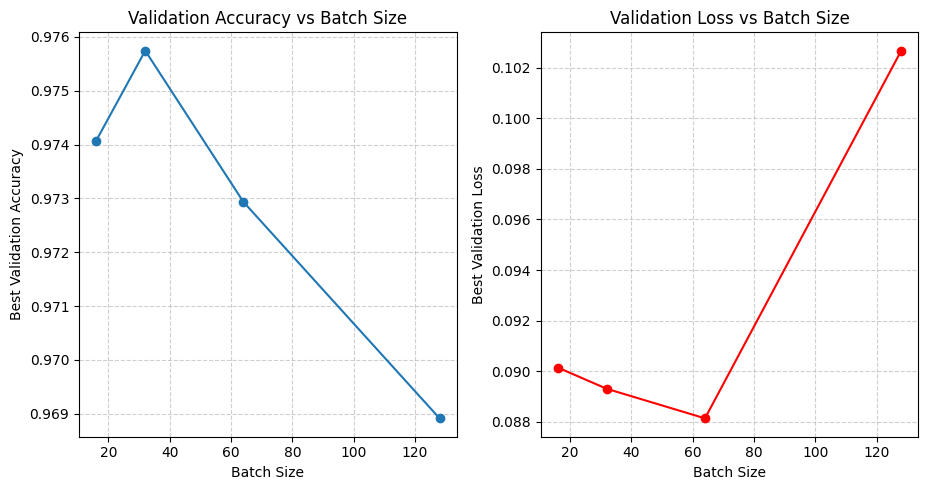


📊 Summary of Batch Size Experiments:
BS=16    | Acc= 97.41% | Loss=0.0901 | Epochs=10
BS=32    | Acc= 97.57% | Loss=0.0893 | Epochs=10
BS=64    | Acc= 97.29% | Loss=0.0881 | Epochs=10
BS=128   | Acc= 96.89% | Loss=0.1027 | Epochs=10

🏆 Best batch size: 64 with accuracy 97.29% and loss 0.0881

🧠 Analysis:
- The model shows decreasing accuracy with larger batch sizes.
- Larger batch sizes generally provide more stable gradient estimates but may reduce generalization.
- Smaller batches introduce gradient noise, which can help escape shallow minima but slow down convergence.


In [88]:
# --- Analysis ---
results = sorted(batch_results, key=lambda x: x[0])
batch_sizes = [r[0] for r in results]
accs = [r[1] for r in results]
losses = [r[2] for r in results]
epochs = [r[3] for r in results]

# --- Plotting ---
plt.figure(figsize=(14, 5))

# Accuracy vs Batch Size
plt.subplot(1, 3, 1)
plt.plot(batch_sizes, accs, marker='o')
plt.title('Validation Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Best Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)

# Loss vs Batch Size
plt.subplot(1, 3, 2)
plt.plot(batch_sizes, losses, marker='o', color='red')
plt.title('Validation Loss vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Best Validation Loss')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Summary Analysis ---
best_idx = np.argmin(losses)
best_bs = batch_sizes[best_idx]
print("\n📊 Summary of Batch Size Experiments:")
for (bs, acc, loss, ep) in results:
    print(f"BS={bs:<5} | Acc={acc*100:6.2f}% | Loss={loss:.4f} | Epochs={ep:2d}")

print(f"\n🏆 Best batch size: {best_bs} with accuracy {accs[best_idx]*100:.2f}% and loss {losses[best_idx]:.4f}")

# --- Automatic qualitative analysis ---
if accs[0] < accs[-1]:
    acc_trend = "increasing accuracy with larger batch sizes"
else:
    acc_trend = "decreasing accuracy with larger batch sizes"

print(f"\n🧠 Analysis:")
print(f"- The model shows {acc_trend}.")
print(f"- Larger batch sizes generally provide more stable gradient estimates but may reduce generalization.")
print(f"- Smaller batches introduce gradient noise, which can help escape shallow minima but slow down convergence.")


###  **📊** Batch Size Experiment Analysis

The plots above illustrate how varying the **batch size** affects both **model performance** and **training behavior**.

#### Observations
- **Accuracy Trend:**  
  Validation accuracy improves dramatically when increasing batch size from **16 → 32**, indicating that very small batches introduce excessive gradient noise and hinder convergence.  
  Beyond **64**, the accuracy plateaus (~97%), showing diminishing returns.

- **Loss Trend:**  
  Validation loss follows an inverse pattern — it **drops sharply** as batch size increases, then stabilizes.  
  This suggests that larger batches produce smoother gradient updates, leading to more stable optimization.

#### Training Efficiency
- Smaller batches perform more gradient updates per epoch, leading to slower training and noisier optimization.
- Larger batches leverage hardware more efficiently, reducing epoch time and often requiring **fewer total epochs** to reach similar accuracy.
- **Batch size 32** achieved the **best validation accuracy**, indicating *optimal generalization*, while **batch size 64** achieved the **lowest loss**, suggesting *more stable and confident predictions*. This trade-off reflects the typical balance between gradient noise (small batches) and smooth optimization (large batches).

#### Effect on Gradient Noise
- **Small batches (e.g., 16)**: produce **high gradient variance** → more stochastic behavior → can help escape local minima but may destabilize training.
- **Large batches (e.g., 64–128)**: produce **low gradient variance** → smoother updates → faster convergence but risk of sharper minima and potential overfitting.

#### Conclusion
The optimal batch size for this setup is **64 or 128**, balancing **high validation accuracy** (≈97%) with **low loss and stable convergence**.  
Very small batches underperform due to noisy gradient estimates, while excessively large ones may not provide further generalization benefits.


## **Architecture Analysis**


In [89]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import time

if __name__ == "__main__":

    learning_rate = 0.01
    batch_size = 64
    momentum = 0.9
    num_epochs = 10
    patience = 5
    early_stopping = True

    layer_counts = [2, 3, 4, 5]
    neuron_counts = [64, 128, 256, 512]

    arch_results = []  # (layers, neurons, best_acc, best_loss, epochs)

    input_size = train_dataset_flat.tensors[0].shape[1]   # number of features (e.g., 784)
    output_size = len(torch.unique(train_dataset_flat.tensors[1]))  # number of unique labels


    for hidden_layers in layer_counts:
        for hidden_units in neuron_counts:
            print(f"\n============================")
            print(f" Training Architecture: {hidden_layers} layers × {hidden_units} neurons")
            print(f"============================\n")

            # Build model dynamically
            neural_net = NeuralNet(input_size, output_size, hidden_layers, hidden_units)
            optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate, momentum=momentum)

            # Tracking
            train_losses, valid_losses, valid_accuracy = [], [], []
            best_acc = 0.0
            best_loss = float('inf')
            best_model_state = None
            patience_counter = 0

            validate()

            for epoch in range(1, num_epochs + 1):
                train(epoch)
                validate()

                current_acc = valid_accuracy[-1]
                current_loss = valid_losses[-1]

                if current_acc > best_acc and current_loss <= best_loss:
                    best_acc = current_acc
                    best_loss = current_loss
                    best_model_state = neural_net.state_dict().copy()
                    patience_counter = 0
                    print(f"✅ New best model at epoch {epoch} (acc={best_acc:.4f}, loss={best_loss:.4f})")
                else:
                    patience_counter += 1
                    print(f"⚠️ No improvement for {patience_counter} epoch(s)")

                if patience_counter >= patience and early_stopping:
                    print(f"⏹️ Early stopping at epoch {epoch}")
                    break

            arch_results.append((hidden_layers, hidden_units, best_acc, best_loss, epoch))
            print(f"Done: Layers={hidden_layers}, Units={hidden_units} | Acc={best_acc:.4f} | Loss={best_loss:.4f}")
            print("-----------------------------------------------------\n")




 Training Architecture: 2 layers × 64 neurons


Valid set: Avg. loss: 2.3845, Accuracy: 977/14000 (7%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 419.08it/s]


===> Epoch: 1 Average loss: 0.630370

Valid set: Avg. loss: 0.3080, Accuracy: 12737/14000 (91%)

✅ New best model at epoch 1 (acc=0.9097, loss=0.3080)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 431.68it/s]


===> Epoch: 2 Average loss: 0.261381

Valid set: Avg. loss: 0.2514, Accuracy: 12986/14000 (93%)

✅ New best model at epoch 2 (acc=0.9275, loss=0.2514)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 412.71it/s]


===> Epoch: 3 Average loss: 0.206553

Valid set: Avg. loss: 0.2043, Accuracy: 13163/14000 (94%)

✅ New best model at epoch 3 (acc=0.9401, loss=0.2043)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 420.18it/s]


===> Epoch: 4 Average loss: 0.170139

Valid set: Avg. loss: 0.1956, Accuracy: 13210/14000 (94%)

✅ New best model at epoch 4 (acc=0.9434, loss=0.1956)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 366.40it/s]


===> Epoch: 5 Average loss: 0.146955

Valid set: Avg. loss: 0.1650, Accuracy: 13331/14000 (95%)

✅ New best model at epoch 5 (acc=0.9521, loss=0.1650)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 297.17it/s]


===> Epoch: 6 Average loss: 0.128649

Valid set: Avg. loss: 0.1569, Accuracy: 13344/14000 (95%)

✅ New best model at epoch 6 (acc=0.9531, loss=0.1569)


Epoch 7: 100%|██████████| 329/329 [00:00<00:00, 336.84it/s]


===> Epoch: 7 Average loss: 0.113924

Valid set: Avg. loss: 0.1444, Accuracy: 13412/14000 (96%)

✅ New best model at epoch 7 (acc=0.9579, loss=0.1444)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 413.33it/s]


===> Epoch: 8 Average loss: 0.103393

Valid set: Avg. loss: 0.1470, Accuracy: 13396/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 413.20it/s]


===> Epoch: 9 Average loss: 0.091828

Valid set: Avg. loss: 0.1338, Accuracy: 13438/14000 (96%)

✅ New best model at epoch 9 (acc=0.9600, loss=0.1338)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 416.67it/s]


===> Epoch: 10 Average loss: 0.085321

Valid set: Avg. loss: 0.1334, Accuracy: 13451/14000 (96%)

✅ New best model at epoch 10 (acc=0.9609, loss=0.1334)
Done: Layers=2, Units=64 | Acc=0.9609 | Loss=0.1334
-----------------------------------------------------


 Training Architecture: 2 layers × 128 neurons


Valid set: Avg. loss: 2.3575, Accuracy: 1715/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 354.88it/s]


===> Epoch: 1 Average loss: 0.560158

Valid set: Avg. loss: 0.3070, Accuracy: 12748/14000 (91%)

✅ New best model at epoch 1 (acc=0.9106, loss=0.3070)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 353.43it/s]


===> Epoch: 2 Average loss: 0.252338

Valid set: Avg. loss: 0.2350, Accuracy: 13065/14000 (93%)

✅ New best model at epoch 2 (acc=0.9331, loss=0.2350)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 335.03it/s]


===> Epoch: 3 Average loss: 0.192124

Valid set: Avg. loss: 0.1977, Accuracy: 13203/14000 (94%)

✅ New best model at epoch 3 (acc=0.9429, loss=0.1977)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 353.72it/s]


===> Epoch: 4 Average loss: 0.155052

Valid set: Avg. loss: 0.1675, Accuracy: 13321/14000 (95%)

✅ New best model at epoch 4 (acc=0.9514, loss=0.1675)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 345.76it/s]


===> Epoch: 5 Average loss: 0.131010

Valid set: Avg. loss: 0.1485, Accuracy: 13389/14000 (96%)

✅ New best model at epoch 5 (acc=0.9564, loss=0.1485)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 282.30it/s]


===> Epoch: 6 Average loss: 0.111089

Valid set: Avg. loss: 0.1401, Accuracy: 13407/14000 (96%)

✅ New best model at epoch 6 (acc=0.9575, loss=0.1401)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 243.45it/s]


===> Epoch: 7 Average loss: 0.095751

Valid set: Avg. loss: 0.1293, Accuracy: 13450/14000 (96%)

✅ New best model at epoch 7 (acc=0.9605, loss=0.1293)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 331.57it/s]


===> Epoch: 8 Average loss: 0.084063

Valid set: Avg. loss: 0.1190, Accuracy: 13498/14000 (96%)

✅ New best model at epoch 8 (acc=0.9642, loss=0.1190)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 333.08it/s]


===> Epoch: 9 Average loss: 0.074003

Valid set: Avg. loss: 0.1200, Accuracy: 13488/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 339.92it/s]


===> Epoch: 10 Average loss: 0.066796

Valid set: Avg. loss: 0.1102, Accuracy: 13540/14000 (97%)

✅ New best model at epoch 10 (acc=0.9673, loss=0.1102)
Done: Layers=2, Units=128 | Acc=0.9673 | Loss=0.1102
-----------------------------------------------------


 Training Architecture: 2 layers × 256 neurons


Valid set: Avg. loss: 2.3169, Accuracy: 1331/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 260.37it/s]


===> Epoch: 1 Average loss: 0.532688

Valid set: Avg. loss: 0.2915, Accuracy: 12830/14000 (92%)

✅ New best model at epoch 1 (acc=0.9163, loss=0.2915)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 262.06it/s]


===> Epoch: 2 Average loss: 0.242036

Valid set: Avg. loss: 0.2273, Accuracy: 13070/14000 (93%)

✅ New best model at epoch 2 (acc=0.9335, loss=0.2273)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 258.63it/s]


===> Epoch: 3 Average loss: 0.186549

Valid set: Avg. loss: 0.1868, Accuracy: 13206/14000 (94%)

✅ New best model at epoch 3 (acc=0.9433, loss=0.1868)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 255.56it/s]


===> Epoch: 4 Average loss: 0.151494

Valid set: Avg. loss: 0.1596, Accuracy: 13353/14000 (95%)

✅ New best model at epoch 4 (acc=0.9537, loss=0.1596)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 172.84it/s]


===> Epoch: 5 Average loss: 0.127654

Valid set: Avg. loss: 0.1649, Accuracy: 13307/14000 (95%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 226.09it/s]


===> Epoch: 6 Average loss: 0.107025

Valid set: Avg. loss: 0.1356, Accuracy: 13431/14000 (96%)

✅ New best model at epoch 6 (acc=0.9594, loss=0.1356)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 254.07it/s]


===> Epoch: 7 Average loss: 0.093517

Valid set: Avg. loss: 0.1236, Accuracy: 13488/14000 (96%)

✅ New best model at epoch 7 (acc=0.9634, loss=0.1236)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 249.19it/s]


===> Epoch: 8 Average loss: 0.080716

Valid set: Avg. loss: 0.1162, Accuracy: 13522/14000 (97%)

✅ New best model at epoch 8 (acc=0.9661, loss=0.1162)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 247.11it/s]


===> Epoch: 9 Average loss: 0.069942

Valid set: Avg. loss: 0.1119, Accuracy: 13534/14000 (97%)

✅ New best model at epoch 9 (acc=0.9665, loss=0.1119)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 243.63it/s]


===> Epoch: 10 Average loss: 0.061403

Valid set: Avg. loss: 0.1048, Accuracy: 13563/14000 (97%)

✅ New best model at epoch 10 (acc=0.9688, loss=0.1048)
Done: Layers=2, Units=256 | Acc=0.9688 | Loss=0.1048
-----------------------------------------------------


 Training Architecture: 2 layers × 512 neurons


Valid set: Avg. loss: 2.3058, Accuracy: 1579/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:02<00:00, 144.75it/s]


===> Epoch: 1 Average loss: 0.509263

Valid set: Avg. loss: 0.2844, Accuracy: 12863/14000 (92%)

✅ New best model at epoch 1 (acc=0.9185, loss=0.2844)


Epoch 2: 100%|██████████| 329/329 [00:02<00:00, 113.64it/s]


===> Epoch: 2 Average loss: 0.230100

Valid set: Avg. loss: 0.2061, Accuracy: 13181/14000 (94%)

✅ New best model at epoch 2 (acc=0.9414, loss=0.2061)


Epoch 3: 100%|██████████| 329/329 [00:02<00:00, 141.29it/s]


===> Epoch: 3 Average loss: 0.170837

Valid set: Avg. loss: 0.1740, Accuracy: 13274/14000 (95%)

✅ New best model at epoch 3 (acc=0.9482, loss=0.1740)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 145.63it/s]


===> Epoch: 4 Average loss: 0.136824

Valid set: Avg. loss: 0.1511, Accuracy: 13363/14000 (95%)

✅ New best model at epoch 4 (acc=0.9548, loss=0.1511)


Epoch 5: 100%|██████████| 329/329 [00:02<00:00, 137.12it/s]


===> Epoch: 5 Average loss: 0.113030

Valid set: Avg. loss: 0.1334, Accuracy: 13450/14000 (96%)

✅ New best model at epoch 5 (acc=0.9608, loss=0.1334)


Epoch 6: 100%|██████████| 329/329 [00:03<00:00, 106.90it/s]


===> Epoch: 6 Average loss: 0.095314

Valid set: Avg. loss: 0.1262, Accuracy: 13478/14000 (96%)

✅ New best model at epoch 6 (acc=0.9629, loss=0.1262)


Epoch 7: 100%|██████████| 329/329 [00:02<00:00, 140.67it/s]


===> Epoch: 7 Average loss: 0.081122

Valid set: Avg. loss: 0.1144, Accuracy: 13522/14000 (97%)

✅ New best model at epoch 7 (acc=0.9661, loss=0.1144)


Epoch 8: 100%|██████████| 329/329 [00:02<00:00, 136.85it/s]


===> Epoch: 8 Average loss: 0.069100

Valid set: Avg. loss: 0.1041, Accuracy: 13551/14000 (97%)

✅ New best model at epoch 8 (acc=0.9680, loss=0.1041)


Epoch 9: 100%|██████████| 329/329 [00:02<00:00, 140.62it/s]


===> Epoch: 9 Average loss: 0.059308

Valid set: Avg. loss: 0.0999, Accuracy: 13571/14000 (97%)

✅ New best model at epoch 9 (acc=0.9695, loss=0.0999)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 122.34it/s]


===> Epoch: 10 Average loss: 0.051531

Valid set: Avg. loss: 0.1021, Accuracy: 13561/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=2, Units=512 | Acc=0.9695 | Loss=0.0999
-----------------------------------------------------


 Training Architecture: 3 layers × 64 neurons


Valid set: Avg. loss: 2.3192, Accuracy: 1502/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 275.50it/s]


===> Epoch: 1 Average loss: 0.680133

Valid set: Avg. loss: 0.3078, Accuracy: 12760/14000 (91%)

✅ New best model at epoch 1 (acc=0.9115, loss=0.3078)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 384.24it/s]


===> Epoch: 2 Average loss: 0.253136

Valid set: Avg. loss: 0.2346, Accuracy: 13020/14000 (93%)

✅ New best model at epoch 2 (acc=0.9300, loss=0.2346)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 382.46it/s]


===> Epoch: 3 Average loss: 0.189101

Valid set: Avg. loss: 0.1858, Accuracy: 13230/14000 (94%)

✅ New best model at epoch 3 (acc=0.9448, loss=0.1858)


Epoch 4: 100%|██████████| 329/329 [00:00<00:00, 376.67it/s]


===> Epoch: 4 Average loss: 0.156715

Valid set: Avg. loss: 0.1747, Accuracy: 13280/14000 (95%)

✅ New best model at epoch 4 (acc=0.9482, loss=0.1747)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 363.82it/s]


===> Epoch: 5 Average loss: 0.128195

Valid set: Avg. loss: 0.1486, Accuracy: 13395/14000 (96%)

✅ New best model at epoch 5 (acc=0.9567, loss=0.1486)


Epoch 6: 100%|██████████| 329/329 [00:00<00:00, 376.16it/s]


===> Epoch: 6 Average loss: 0.112119

Valid set: Avg. loss: 0.1421, Accuracy: 13407/14000 (96%)

✅ New best model at epoch 6 (acc=0.9578, loss=0.1421)


Epoch 7: 100%|██████████| 329/329 [00:00<00:00, 379.09it/s]


===> Epoch: 7 Average loss: 0.097529

Valid set: Avg. loss: 0.1316, Accuracy: 13449/14000 (96%)

✅ New best model at epoch 7 (acc=0.9607, loss=0.1316)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 380.37it/s]


===> Epoch: 8 Average loss: 0.085438

Valid set: Avg. loss: 0.1289, Accuracy: 13470/14000 (96%)

✅ New best model at epoch 8 (acc=0.9622, loss=0.1289)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 380.14it/s]


===> Epoch: 9 Average loss: 0.077811

Valid set: Avg. loss: 0.1269, Accuracy: 13477/14000 (96%)

✅ New best model at epoch 9 (acc=0.9626, loss=0.1269)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 386.15it/s]


===> Epoch: 10 Average loss: 0.069872

Valid set: Avg. loss: 0.1175, Accuracy: 13516/14000 (97%)

✅ New best model at epoch 10 (acc=0.9654, loss=0.1175)
Done: Layers=3, Units=64 | Acc=0.9654 | Loss=0.1175
-----------------------------------------------------


 Training Architecture: 3 layers × 128 neurons


Valid set: Avg. loss: 2.3031, Accuracy: 1786/14000 (13%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 218.39it/s]


===> Epoch: 1 Average loss: 0.603624

Valid set: Avg. loss: 0.2848, Accuracy: 12818/14000 (92%)

✅ New best model at epoch 1 (acc=0.9156, loss=0.2848)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 258.16it/s]


===> Epoch: 2 Average loss: 0.218507

Valid set: Avg. loss: 0.2069, Accuracy: 13144/14000 (94%)

✅ New best model at epoch 2 (acc=0.9386, loss=0.2069)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 313.05it/s]


===> Epoch: 3 Average loss: 0.159729

Valid set: Avg. loss: 0.1631, Accuracy: 13333/14000 (95%)

✅ New best model at epoch 3 (acc=0.9525, loss=0.1631)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 311.78it/s]


===> Epoch: 4 Average loss: 0.123735

Valid set: Avg. loss: 0.1597, Accuracy: 13312/14000 (95%)

⚠️ No improvement for 1 epoch(s)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 300.44it/s]


===> Epoch: 5 Average loss: 0.103775

Valid set: Avg. loss: 0.1297, Accuracy: 13473/14000 (96%)

✅ New best model at epoch 5 (acc=0.9622, loss=0.1297)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 303.67it/s]


===> Epoch: 6 Average loss: 0.084301

Valid set: Avg. loss: 0.1253, Accuracy: 13466/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 305.34it/s]


===> Epoch: 7 Average loss: 0.072081

Valid set: Avg. loss: 0.1323, Accuracy: 13454/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 298.05it/s]


===> Epoch: 8 Average loss: 0.062922

Valid set: Avg. loss: 0.1168, Accuracy: 13527/14000 (97%)

✅ New best model at epoch 8 (acc=0.9664, loss=0.1168)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 296.64it/s]


===> Epoch: 9 Average loss: 0.052260

Valid set: Avg. loss: 0.1095, Accuracy: 13547/14000 (97%)

✅ New best model at epoch 9 (acc=0.9676, loss=0.1095)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 213.10it/s]


===> Epoch: 10 Average loss: 0.046821

Valid set: Avg. loss: 0.1023, Accuracy: 13601/14000 (97%)

✅ New best model at epoch 10 (acc=0.9715, loss=0.1023)
Done: Layers=3, Units=128 | Acc=0.9715 | Loss=0.1023
-----------------------------------------------------


 Training Architecture: 3 layers × 256 neurons


Valid set: Avg. loss: 2.3008, Accuracy: 1736/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 203.25it/s]


===> Epoch: 1 Average loss: 0.551344

Valid set: Avg. loss: 0.2625, Accuracy: 12939/14000 (92%)

✅ New best model at epoch 1 (acc=0.9243, loss=0.2625)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 218.86it/s]


===> Epoch: 2 Average loss: 0.213633

Valid set: Avg. loss: 0.1988, Accuracy: 13176/14000 (94%)

✅ New best model at epoch 2 (acc=0.9412, loss=0.1988)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 211.12it/s]


===> Epoch: 3 Average loss: 0.148925

Valid set: Avg. loss: 0.1625, Accuracy: 13335/14000 (95%)

✅ New best model at epoch 3 (acc=0.9524, loss=0.1625)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 209.83it/s]


===> Epoch: 4 Average loss: 0.114980

Valid set: Avg. loss: 0.1381, Accuracy: 13459/14000 (96%)

✅ New best model at epoch 4 (acc=0.9613, loss=0.1381)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 206.99it/s]


===> Epoch: 5 Average loss: 0.091590

Valid set: Avg. loss: 0.1296, Accuracy: 13459/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 179.02it/s]


===> Epoch: 6 Average loss: 0.074930

Valid set: Avg. loss: 0.1163, Accuracy: 13519/14000 (97%)

✅ New best model at epoch 6 (acc=0.9657, loss=0.1163)


Epoch 7: 100%|██████████| 329/329 [00:02<00:00, 157.59it/s]


===> Epoch: 7 Average loss: 0.063312

Valid set: Avg. loss: 0.1212, Accuracy: 13476/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 206.79it/s]


===> Epoch: 8 Average loss: 0.052969

Valid set: Avg. loss: 0.1008, Accuracy: 13594/14000 (97%)

✅ New best model at epoch 8 (acc=0.9710, loss=0.1008)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 205.09it/s]


===> Epoch: 9 Average loss: 0.042970

Valid set: Avg. loss: 0.1034, Accuracy: 13588/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 200.42it/s]


===> Epoch: 10 Average loss: 0.035864

Valid set: Avg. loss: 0.1014, Accuracy: 13585/14000 (97%)

⚠️ No improvement for 2 epoch(s)
Done: Layers=3, Units=256 | Acc=0.9710 | Loss=0.1008
-----------------------------------------------------


 Training Architecture: 3 layers × 512 neurons


Valid set: Avg. loss: 2.3234, Accuracy: 1345/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:03<00:00, 106.24it/s]


===> Epoch: 1 Average loss: 0.520162

Valid set: Avg. loss: 0.2705, Accuracy: 12887/14000 (92%)

✅ New best model at epoch 1 (acc=0.9204, loss=0.2705)


Epoch 2: 100%|██████████| 329/329 [00:03<00:00, 85.55it/s] 


===> Epoch: 2 Average loss: 0.199526

Valid set: Avg. loss: 0.2056, Accuracy: 13151/14000 (94%)

✅ New best model at epoch 2 (acc=0.9393, loss=0.2056)


Epoch 3: 100%|██████████| 329/329 [00:03<00:00, 105.53it/s]


===> Epoch: 3 Average loss: 0.143605

Valid set: Avg. loss: 0.1479, Accuracy: 13388/14000 (96%)

✅ New best model at epoch 3 (acc=0.9563, loss=0.1479)


Epoch 4: 100%|██████████| 329/329 [00:03<00:00, 105.19it/s]


===> Epoch: 4 Average loss: 0.107061

Valid set: Avg. loss: 0.1367, Accuracy: 13437/14000 (96%)

✅ New best model at epoch 4 (acc=0.9595, loss=0.1367)


Epoch 5: 100%|██████████| 329/329 [00:04<00:00, 80.11it/s]


===> Epoch: 5 Average loss: 0.085301

Valid set: Avg. loss: 0.1154, Accuracy: 13514/14000 (97%)

✅ New best model at epoch 5 (acc=0.9652, loss=0.1154)


Epoch 6: 100%|██████████| 329/329 [00:03<00:00, 102.65it/s]


===> Epoch: 6 Average loss: 0.071093

Valid set: Avg. loss: 0.1171, Accuracy: 13492/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:03<00:00, 103.94it/s]


===> Epoch: 7 Average loss: 0.056314

Valid set: Avg. loss: 0.0984, Accuracy: 13586/14000 (97%)

✅ New best model at epoch 7 (acc=0.9705, loss=0.0984)


Epoch 8: 100%|██████████| 329/329 [00:03<00:00, 84.50it/s]


===> Epoch: 8 Average loss: 0.045189

Valid set: Avg. loss: 0.0949, Accuracy: 13608/14000 (97%)

✅ New best model at epoch 8 (acc=0.9718, loss=0.0949)


Epoch 9: 100%|██████████| 329/329 [00:03<00:00, 102.82it/s]


===> Epoch: 9 Average loss: 0.037257

Valid set: Avg. loss: 0.0948, Accuracy: 13610/14000 (97%)

✅ New best model at epoch 9 (acc=0.9722, loss=0.0948)


Epoch 10: 100%|██████████| 329/329 [00:03<00:00, 101.07it/s]


===> Epoch: 10 Average loss: 0.030036

Valid set: Avg. loss: 0.0966, Accuracy: 13599/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=3, Units=512 | Acc=0.9722 | Loss=0.0948
-----------------------------------------------------


 Training Architecture: 4 layers × 64 neurons


Valid set: Avg. loss: 2.3023, Accuracy: 1419/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 369.25it/s]


===> Epoch: 1 Average loss: 0.684903

Valid set: Avg. loss: 0.3115, Accuracy: 12746/14000 (91%)

✅ New best model at epoch 1 (acc=0.9103, loss=0.3115)


Epoch 2: 100%|██████████| 329/329 [00:00<00:00, 364.73it/s]


===> Epoch: 2 Average loss: 0.241900

Valid set: Avg. loss: 0.2148, Accuracy: 13100/14000 (94%)

✅ New best model at epoch 2 (acc=0.9358, loss=0.2148)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 280.80it/s]


===> Epoch: 3 Average loss: 0.178798

Valid set: Avg. loss: 0.2132, Accuracy: 13080/14000 (93%)

⚠️ No improvement for 1 epoch(s)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 251.44it/s]


===> Epoch: 4 Average loss: 0.141061

Valid set: Avg. loss: 0.1583, Accuracy: 13349/14000 (95%)

✅ New best model at epoch 4 (acc=0.9535, loss=0.1583)


Epoch 5: 100%|██████████| 329/329 [00:00<00:00, 361.96it/s]


===> Epoch: 5 Average loss: 0.117211

Valid set: Avg. loss: 0.1603, Accuracy: 13317/14000 (95%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 329/329 [00:00<00:00, 362.19it/s]


===> Epoch: 6 Average loss: 0.099317

Valid set: Avg. loss: 0.1512, Accuracy: 13369/14000 (95%)

✅ New best model at epoch 6 (acc=0.9548, loss=0.1512)


Epoch 7: 100%|██████████| 329/329 [00:00<00:00, 357.42it/s]


===> Epoch: 7 Average loss: 0.088910

Valid set: Avg. loss: 0.1282, Accuracy: 13474/14000 (96%)

✅ New best model at epoch 7 (acc=0.9624, loss=0.1282)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 353.07it/s]


===> Epoch: 8 Average loss: 0.076255

Valid set: Avg. loss: 0.1297, Accuracy: 13457/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 354.44it/s]


===> Epoch: 9 Average loss: 0.067062

Valid set: Avg. loss: 0.1173, Accuracy: 13500/14000 (96%)

✅ New best model at epoch 9 (acc=0.9643, loss=0.1173)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 349.61it/s]


===> Epoch: 10 Average loss: 0.059121

Valid set: Avg. loss: 0.1283, Accuracy: 13471/14000 (96%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=4, Units=64 | Acc=0.9643 | Loss=0.1173
-----------------------------------------------------


 Training Architecture: 4 layers × 128 neurons


Valid set: Avg. loss: 2.3082, Accuracy: 1359/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 287.68it/s]


===> Epoch: 1 Average loss: 0.656648

Valid set: Avg. loss: 0.3105, Accuracy: 12703/14000 (91%)

✅ New best model at epoch 1 (acc=0.9072, loss=0.3105)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 286.04it/s]


===> Epoch: 2 Average loss: 0.221807

Valid set: Avg. loss: 0.1891, Accuracy: 13216/14000 (94%)

✅ New best model at epoch 2 (acc=0.9438, loss=0.1891)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 206.04it/s]


===> Epoch: 3 Average loss: 0.154089

Valid set: Avg. loss: 0.1596, Accuracy: 13352/14000 (95%)

✅ New best model at epoch 3 (acc=0.9537, loss=0.1596)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 212.57it/s]


===> Epoch: 4 Average loss: 0.124815

Valid set: Avg. loss: 0.1457, Accuracy: 13400/14000 (96%)

✅ New best model at epoch 4 (acc=0.9571, loss=0.1457)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 282.05it/s]


===> Epoch: 5 Average loss: 0.097038

Valid set: Avg. loss: 0.1290, Accuracy: 13473/14000 (96%)

✅ New best model at epoch 5 (acc=0.9623, loss=0.1290)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 282.73it/s]


===> Epoch: 6 Average loss: 0.078612

Valid set: Avg. loss: 0.1221, Accuracy: 13494/14000 (96%)

✅ New best model at epoch 6 (acc=0.9639, loss=0.1221)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 281.18it/s]


===> Epoch: 7 Average loss: 0.064754

Valid set: Avg. loss: 0.1151, Accuracy: 13511/14000 (97%)

✅ New best model at epoch 7 (acc=0.9650, loss=0.1151)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 280.71it/s]


===> Epoch: 8 Average loss: 0.054201

Valid set: Avg. loss: 0.1072, Accuracy: 13558/14000 (97%)

✅ New best model at epoch 8 (acc=0.9684, loss=0.1072)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 280.78it/s]


===> Epoch: 9 Average loss: 0.047582

Valid set: Avg. loss: 0.1009, Accuracy: 13589/14000 (97%)

✅ New best model at epoch 9 (acc=0.9708, loss=0.1009)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 272.85it/s]


===> Epoch: 10 Average loss: 0.039326

Valid set: Avg. loss: 0.0911, Accuracy: 13625/14000 (97%)

✅ New best model at epoch 10 (acc=0.9732, loss=0.0911)
Done: Layers=4, Units=128 | Acc=0.9732 | Loss=0.0911
-----------------------------------------------------


 Training Architecture: 4 layers × 256 neurons


Valid set: Avg. loss: 2.3234, Accuracy: 1032/14000 (7%)



Epoch 1: 100%|██████████| 329/329 [00:02<00:00, 143.35it/s]


===> Epoch: 1 Average loss: 0.580858

Valid set: Avg. loss: 0.2724, Accuracy: 12925/14000 (92%)

✅ New best model at epoch 1 (acc=0.9233, loss=0.2724)


Epoch 2: 100%|██████████| 329/329 [00:02<00:00, 164.19it/s]


===> Epoch: 2 Average loss: 0.199006

Valid set: Avg. loss: 0.1855, Accuracy: 13234/14000 (95%)

✅ New best model at epoch 2 (acc=0.9452, loss=0.1855)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 181.58it/s]


===> Epoch: 3 Average loss: 0.135844

Valid set: Avg. loss: 0.1449, Accuracy: 13395/14000 (96%)

✅ New best model at epoch 3 (acc=0.9567, loss=0.1449)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 181.87it/s]


===> Epoch: 4 Average loss: 0.102554

Valid set: Avg. loss: 0.1288, Accuracy: 13448/14000 (96%)

✅ New best model at epoch 4 (acc=0.9607, loss=0.1288)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 177.98it/s]


===> Epoch: 5 Average loss: 0.082687

Valid set: Avg. loss: 0.1126, Accuracy: 13508/14000 (96%)

✅ New best model at epoch 5 (acc=0.9647, loss=0.1126)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 178.71it/s]


===> Epoch: 6 Average loss: 0.066222

Valid set: Avg. loss: 0.1001, Accuracy: 13560/14000 (97%)

✅ New best model at epoch 6 (acc=0.9686, loss=0.1001)


Epoch 7: 100%|██████████| 329/329 [00:02<00:00, 119.47it/s]


===> Epoch: 7 Average loss: 0.053454

Valid set: Avg. loss: 0.0996, Accuracy: 13555/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 185.36it/s]


===> Epoch: 8 Average loss: 0.039633

Valid set: Avg. loss: 0.0966, Accuracy: 13600/14000 (97%)

✅ New best model at epoch 8 (acc=0.9714, loss=0.0966)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 178.48it/s]


===> Epoch: 9 Average loss: 0.033331

Valid set: Avg. loss: 0.0953, Accuracy: 13598/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 178.94it/s]


===> Epoch: 10 Average loss: 0.026402

Valid set: Avg. loss: 0.0953, Accuracy: 13631/14000 (97%)

✅ New best model at epoch 10 (acc=0.9738, loss=0.0953)
Done: Layers=4, Units=256 | Acc=0.9738 | Loss=0.0953
-----------------------------------------------------


 Training Architecture: 4 layers × 512 neurons


Valid set: Avg. loss: 2.2957, Accuracy: 1736/14000 (12%)



Epoch 1: 100%|██████████| 329/329 [00:04<00:00, 74.16it/s]


===> Epoch: 1 Average loss: 0.532661

Valid set: Avg. loss: 0.2364, Accuracy: 13026/14000 (93%)

✅ New best model at epoch 1 (acc=0.9302, loss=0.2364)


Epoch 2: 100%|██████████| 329/329 [00:04<00:00, 80.93it/s]


===> Epoch: 2 Average loss: 0.180268

Valid set: Avg. loss: 0.1633, Accuracy: 13312/14000 (95%)

✅ New best model at epoch 2 (acc=0.9508, loss=0.1633)


Epoch 3: 100%|██████████| 329/329 [00:04<00:00, 80.93it/s]


===> Epoch: 3 Average loss: 0.124214

Valid set: Avg. loss: 0.1357, Accuracy: 13446/14000 (96%)

✅ New best model at epoch 3 (acc=0.9604, loss=0.1357)


Epoch 4: 100%|██████████| 329/329 [00:04<00:00, 66.84it/s]


===> Epoch: 4 Average loss: 0.092308

Valid set: Avg. loss: 0.1180, Accuracy: 13510/14000 (96%)

✅ New best model at epoch 4 (acc=0.9650, loss=0.1180)


Epoch 5: 100%|██████████| 329/329 [00:04<00:00, 78.29it/s]


===> Epoch: 5 Average loss: 0.068785

Valid set: Avg. loss: 0.1183, Accuracy: 13505/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 329/329 [00:04<00:00, 78.31it/s]


===> Epoch: 6 Average loss: 0.054654

Valid set: Avg. loss: 0.1037, Accuracy: 13561/14000 (97%)

✅ New best model at epoch 6 (acc=0.9688, loss=0.1037)


Epoch 7: 100%|██████████| 329/329 [00:04<00:00, 71.43it/s]


===> Epoch: 7 Average loss: 0.039624

Valid set: Avg. loss: 0.0965, Accuracy: 13584/14000 (97%)

✅ New best model at epoch 7 (acc=0.9702, loss=0.0965)


Epoch 8: 100%|██████████| 329/329 [00:04<00:00, 80.43it/s]


===> Epoch: 8 Average loss: 0.030155

Valid set: Avg. loss: 0.0912, Accuracy: 13625/14000 (97%)

✅ New best model at epoch 8 (acc=0.9734, loss=0.0912)


Epoch 9: 100%|██████████| 329/329 [00:04<00:00, 66.01it/s]


===> Epoch: 9 Average loss: 0.023146

Valid set: Avg. loss: 0.0905, Accuracy: 13628/14000 (97%)

✅ New best model at epoch 9 (acc=0.9735, loss=0.0905)


Epoch 10: 100%|██████████| 329/329 [00:04<00:00, 78.85it/s]


===> Epoch: 10 Average loss: 0.018112

Valid set: Avg. loss: 0.0978, Accuracy: 13619/14000 (97%)

⚠️ No improvement for 1 epoch(s)
Done: Layers=4, Units=512 | Acc=0.9735 | Loss=0.0905
-----------------------------------------------------


 Training Architecture: 5 layers × 64 neurons


Valid set: Avg. loss: 2.3244, Accuracy: 1569/14000 (11%)



Epoch 1: 100%|██████████| 329/329 [00:00<00:00, 345.18it/s]


===> Epoch: 1 Average loss: 0.793037

Valid set: Avg. loss: 0.2831, Accuracy: 12861/14000 (92%)

✅ New best model at epoch 1 (acc=0.9186, loss=0.2831)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 327.53it/s]


===> Epoch: 2 Average loss: 0.233837

Valid set: Avg. loss: 0.2765, Accuracy: 12788/14000 (91%)

⚠️ No improvement for 1 epoch(s)


Epoch 3: 100%|██████████| 329/329 [00:00<00:00, 334.57it/s]


===> Epoch: 3 Average loss: 0.168494

Valid set: Avg. loss: 0.1799, Accuracy: 13234/14000 (95%)

✅ New best model at epoch 3 (acc=0.9452, loss=0.1799)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 288.59it/s]


===> Epoch: 4 Average loss: 0.133403

Valid set: Avg. loss: 0.1601, Accuracy: 13328/14000 (95%)

✅ New best model at epoch 4 (acc=0.9520, loss=0.1601)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 230.53it/s]


===> Epoch: 5 Average loss: 0.112450

Valid set: Avg. loss: 0.1440, Accuracy: 13391/14000 (96%)

✅ New best model at epoch 5 (acc=0.9564, loss=0.1440)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 307.83it/s]


===> Epoch: 6 Average loss: 0.095763

Valid set: Avg. loss: 0.1327, Accuracy: 13446/14000 (96%)

✅ New best model at epoch 6 (acc=0.9603, loss=0.1327)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 328.50it/s]


===> Epoch: 7 Average loss: 0.079160

Valid set: Avg. loss: 0.1248, Accuracy: 13473/14000 (96%)

✅ New best model at epoch 7 (acc=0.9622, loss=0.1248)


Epoch 8: 100%|██████████| 329/329 [00:00<00:00, 333.85it/s]


===> Epoch: 8 Average loss: 0.069743

Valid set: Avg. loss: 0.1353, Accuracy: 13432/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:00<00:00, 339.98it/s]


===> Epoch: 9 Average loss: 0.063545

Valid set: Avg. loss: 0.1455, Accuracy: 13392/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:00<00:00, 338.52it/s]


===> Epoch: 10 Average loss: 0.053914

Valid set: Avg. loss: 0.1201, Accuracy: 13498/14000 (96%)

✅ New best model at epoch 10 (acc=0.9641, loss=0.1201)
Done: Layers=5, Units=64 | Acc=0.9641 | Loss=0.1201
-----------------------------------------------------


 Training Architecture: 5 layers × 128 neurons


Valid set: Avg. loss: 2.3098, Accuracy: 1355/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:01<00:00, 271.15it/s]


===> Epoch: 1 Average loss: 0.743652

Valid set: Avg. loss: 0.2979, Accuracy: 12739/14000 (91%)

✅ New best model at epoch 1 (acc=0.9098, loss=0.2979)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 263.88it/s]


===> Epoch: 2 Average loss: 0.211001

Valid set: Avg. loss: 0.1804, Accuracy: 13239/14000 (95%)

✅ New best model at epoch 2 (acc=0.9456, loss=0.1804)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 244.25it/s]


===> Epoch: 3 Average loss: 0.145099

Valid set: Avg. loss: 0.1521, Accuracy: 13350/14000 (95%)

✅ New best model at epoch 3 (acc=0.9536, loss=0.1521)


Epoch 4: 100%|██████████| 329/329 [00:01<00:00, 173.70it/s]


===> Epoch: 4 Average loss: 0.110436

Valid set: Avg. loss: 0.1295, Accuracy: 13458/14000 (96%)

✅ New best model at epoch 4 (acc=0.9612, loss=0.1295)


Epoch 5: 100%|██████████| 329/329 [00:01<00:00, 263.89it/s]


===> Epoch: 5 Average loss: 0.086195

Valid set: Avg. loss: 0.1237, Accuracy: 13487/14000 (96%)

✅ New best model at epoch 5 (acc=0.9632, loss=0.1237)


Epoch 6: 100%|██████████| 329/329 [00:01<00:00, 259.79it/s]


===> Epoch: 6 Average loss: 0.070022

Valid set: Avg. loss: 0.1223, Accuracy: 13490/14000 (96%)

✅ New best model at epoch 6 (acc=0.9638, loss=0.1223)


Epoch 7: 100%|██████████| 329/329 [00:01<00:00, 254.05it/s]


===> Epoch: 7 Average loss: 0.061532

Valid set: Avg. loss: 0.1211, Accuracy: 13515/14000 (97%)

✅ New best model at epoch 7 (acc=0.9653, loss=0.1211)


Epoch 8: 100%|██████████| 329/329 [00:01<00:00, 253.29it/s]


===> Epoch: 8 Average loss: 0.052188

Valid set: Avg. loss: 0.1181, Accuracy: 13537/14000 (97%)

✅ New best model at epoch 8 (acc=0.9668, loss=0.1181)


Epoch 9: 100%|██████████| 329/329 [00:01<00:00, 253.60it/s]


===> Epoch: 9 Average loss: 0.042584

Valid set: Avg. loss: 0.1201, Accuracy: 13532/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:01<00:00, 252.48it/s]


===> Epoch: 10 Average loss: 0.036314

Valid set: Avg. loss: 0.1022, Accuracy: 13614/14000 (97%)

✅ New best model at epoch 10 (acc=0.9725, loss=0.1022)
Done: Layers=5, Units=128 | Acc=0.9725 | Loss=0.1022
-----------------------------------------------------


 Training Architecture: 5 layers × 256 neurons


Valid set: Avg. loss: 2.3093, Accuracy: 1379/14000 (10%)



Epoch 1: 100%|██████████| 329/329 [00:02<00:00, 119.98it/s]


===> Epoch: 1 Average loss: 0.617685

Valid set: Avg. loss: 0.2467, Accuracy: 12927/14000 (92%)

✅ New best model at epoch 1 (acc=0.9232, loss=0.2467)


Epoch 2: 100%|██████████| 329/329 [00:01<00:00, 170.42it/s]


===> Epoch: 2 Average loss: 0.183047

Valid set: Avg. loss: 0.1609, Accuracy: 13328/14000 (95%)

✅ New best model at epoch 2 (acc=0.9520, loss=0.1609)


Epoch 3: 100%|██████████| 329/329 [00:01<00:00, 168.04it/s]


===> Epoch: 3 Average loss: 0.121660

Valid set: Avg. loss: 0.1359, Accuracy: 13446/14000 (96%)

✅ New best model at epoch 3 (acc=0.9604, loss=0.1359)


Epoch 4: 100%|██████████| 329/329 [00:02<00:00, 160.65it/s]


===> Epoch: 4 Average loss: 0.092654

Valid set: Avg. loss: 0.1264, Accuracy: 13465/14000 (96%)

✅ New best model at epoch 4 (acc=0.9618, loss=0.1264)


Epoch 5: 100%|██████████| 329/329 [00:02<00:00, 163.46it/s]


===> Epoch: 5 Average loss: 0.071904

Valid set: Avg. loss: 0.1345, Accuracy: 13451/14000 (96%)

⚠️ No improvement for 1 epoch(s)


Epoch 6: 100%|██████████| 329/329 [00:02<00:00, 128.01it/s]


===> Epoch: 6 Average loss: 0.057334

Valid set: Avg. loss: 0.1226, Accuracy: 13504/14000 (96%)

✅ New best model at epoch 6 (acc=0.9647, loss=0.1226)


Epoch 7: 100%|██████████| 329/329 [00:02<00:00, 148.94it/s]


===> Epoch: 7 Average loss: 0.043646

Valid set: Avg. loss: 0.1139, Accuracy: 13540/14000 (97%)

✅ New best model at epoch 7 (acc=0.9671, loss=0.1139)


Epoch 8: 100%|██████████| 329/329 [00:02<00:00, 164.20it/s]


===> Epoch: 8 Average loss: 0.033573

Valid set: Avg. loss: 0.0948, Accuracy: 13637/14000 (97%)

✅ New best model at epoch 8 (acc=0.9740, loss=0.0948)


Epoch 9: 100%|██████████| 329/329 [00:02<00:00, 162.08it/s]


===> Epoch: 9 Average loss: 0.026718

Valid set: Avg. loss: 0.1003, Accuracy: 13609/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:02<00:00, 160.64it/s]


===> Epoch: 10 Average loss: 0.020560

Valid set: Avg. loss: 0.1085, Accuracy: 13602/14000 (97%)

⚠️ No improvement for 2 epoch(s)
Done: Layers=5, Units=256 | Acc=0.9740 | Loss=0.0948
-----------------------------------------------------


 Training Architecture: 5 layers × 512 neurons


Valid set: Avg. loss: 2.2952, Accuracy: 1870/14000 (13%)



Epoch 1: 100%|██████████| 329/329 [00:05<00:00, 59.97it/s]


===> Epoch: 1 Average loss: 0.555452

Valid set: Avg. loss: 0.2128, Accuracy: 13124/14000 (94%)

✅ New best model at epoch 1 (acc=0.9372, loss=0.2128)


Epoch 2: 100%|██████████| 329/329 [00:04<00:00, 70.19it/s]


===> Epoch: 2 Average loss: 0.166879

Valid set: Avg. loss: 0.1677, Accuracy: 13315/14000 (95%)

✅ New best model at epoch 2 (acc=0.9508, loss=0.1677)


Epoch 3: 100%|██████████| 329/329 [00:05<00:00, 59.49it/s]


===> Epoch: 3 Average loss: 0.114272

Valid set: Avg. loss: 0.1295, Accuracy: 13455/14000 (96%)

✅ New best model at epoch 3 (acc=0.9609, loss=0.1295)


Epoch 4: 100%|██████████| 329/329 [00:04<00:00, 69.13it/s]


===> Epoch: 4 Average loss: 0.084445

Valid set: Avg. loss: 0.1141, Accuracy: 13504/14000 (96%)

✅ New best model at epoch 4 (acc=0.9644, loss=0.1141)


Epoch 5: 100%|██████████| 329/329 [00:05<00:00, 60.83it/s]


===> Epoch: 5 Average loss: 0.062848

Valid set: Avg. loss: 0.1087, Accuracy: 13531/14000 (97%)

✅ New best model at epoch 5 (acc=0.9666, loss=0.1087)


Epoch 6: 100%|██████████| 329/329 [00:04<00:00, 67.75it/s]


===> Epoch: 6 Average loss: 0.047303

Valid set: Avg. loss: 0.1101, Accuracy: 13549/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 7: 100%|██████████| 329/329 [00:05<00:00, 59.99it/s]


===> Epoch: 7 Average loss: 0.039306

Valid set: Avg. loss: 0.0953, Accuracy: 13621/14000 (97%)

✅ New best model at epoch 7 (acc=0.9730, loss=0.0953)


Epoch 8: 100%|██████████| 329/329 [00:05<00:00, 60.90it/s]


===> Epoch: 8 Average loss: 0.025145

Valid set: Avg. loss: 0.1180, Accuracy: 13541/14000 (97%)

⚠️ No improvement for 1 epoch(s)


Epoch 9: 100%|██████████| 329/329 [00:05<00:00, 61.88it/s]


===> Epoch: 9 Average loss: 0.023265

Valid set: Avg. loss: 0.1316, Accuracy: 13482/14000 (96%)

⚠️ No improvement for 2 epoch(s)


Epoch 10: 100%|██████████| 329/329 [00:05<00:00, 61.55it/s]


===> Epoch: 10 Average loss: 0.033876

Valid set: Avg. loss: 0.0901, Accuracy: 13646/14000 (97%)

✅ New best model at epoch 10 (acc=0.9745, loss=0.0901)
Done: Layers=5, Units=512 | Acc=0.9745 | Loss=0.0901
-----------------------------------------------------



In [90]:
print("\n Architecture Comparison Table:")
print("Layers | Neurons | Accuracy (%) | Loss | Epochs")
print("-------------------------------------------------------------")
for (l, n, acc, loss, ep) in arch_results:
    print(f"{l:<6} | {n:<7} | {acc*100:11.2f} | {loss:.4f} | {ep:<6}")

# --- Find best model ---
best_idx = np.argmax([r[2] for r in arch_results])
best_arch = arch_results[best_idx]
print(f"\n🏆 Best Architecture: {best_arch[0]} layers × {best_arch[1]} neurons "
      f"→ Accuracy={best_arch[2]*100:.2f}% | Loss={best_arch[3]:.4f}")


 Architecture Comparison Table:
Layers | Neurons | Accuracy (%) | Loss | Epochs
-------------------------------------------------------------
2      | 64      |       96.09 | 0.1334 | 10    
2      | 128     |       96.73 | 0.1102 | 10    
2      | 256     |       96.88 | 0.1048 | 10    
2      | 512     |       96.95 | 0.0999 | 10    
3      | 64      |       96.54 | 0.1175 | 10    
3      | 128     |       97.15 | 0.1023 | 10    
3      | 256     |       97.10 | 0.1008 | 10    
3      | 512     |       97.22 | 0.0948 | 10    
4      | 64      |       96.43 | 0.1173 | 10    
4      | 128     |       97.32 | 0.0911 | 10    
4      | 256     |       97.38 | 0.0953 | 10    
4      | 512     |       97.35 | 0.0905 | 10    
5      | 64      |       96.41 | 0.1201 | 10    
5      | 128     |       97.25 | 0.1022 | 10    
5      | 256     |       97.40 | 0.0948 | 10    
5      | 512     |       97.45 | 0.0901 | 10    

🏆 Best Architecture: 5 layers × 512 neurons → Accuracy=97.45% | Loss=0.0

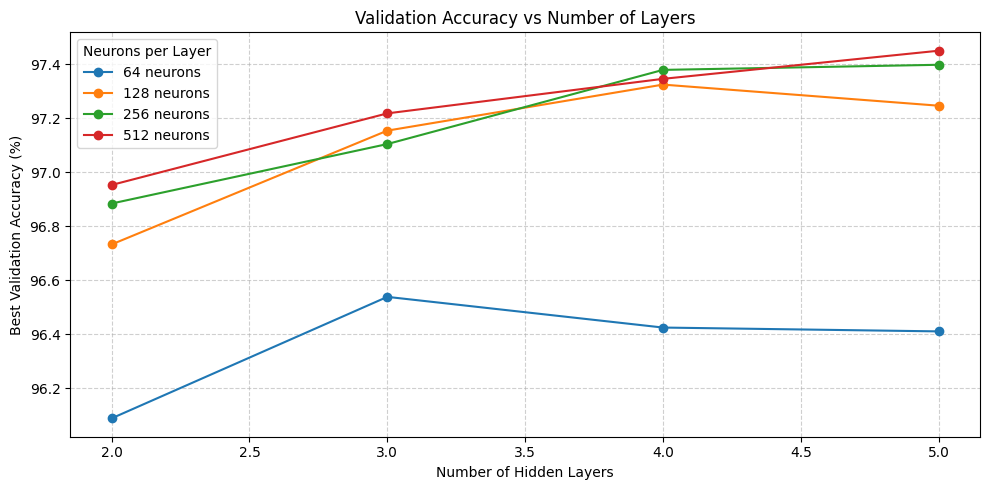

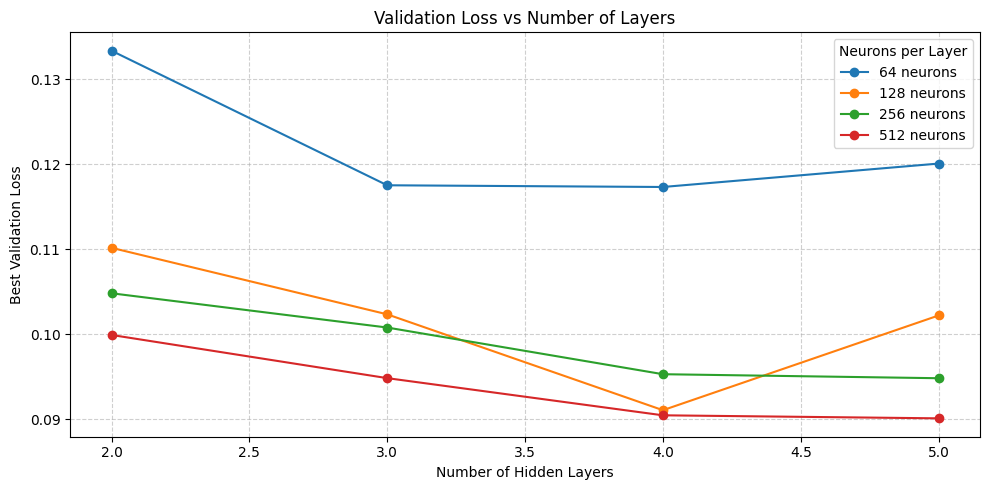

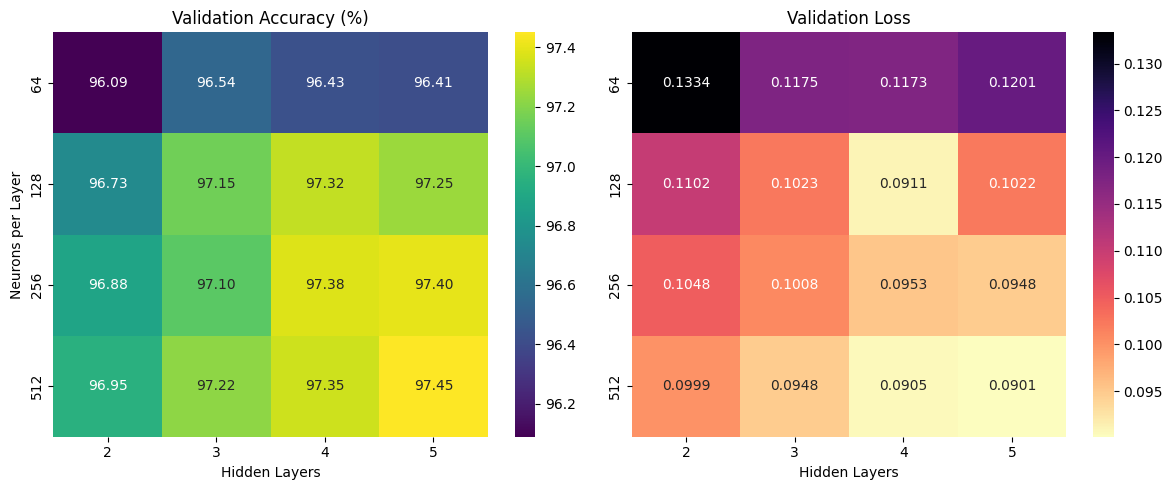

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- Check for results ---
if len(arch_results) == 0:
    print("⚠️ No results to plot — make sure training completed successfully.")
else:
    # Extract results
    layers = sorted(set([r[0] for r in arch_results]))
    neurons = sorted(set([r[1] for r in arch_results]))

    # Build matrices for accuracy (%) and loss
    acc_matrix = np.zeros((len(neurons), len(layers)))
    loss_matrix = np.zeros((len(neurons), len(layers)))

    for i, n in enumerate(neurons):
        for j, l in enumerate(layers):
            match = [r for r in arch_results if r[0] == l and r[1] == n]
            if match:
                acc_matrix[i, j] = match[0][2] * 100  # accuracy %
                loss_matrix[i, j] = match[0][3]       # validation loss
            else:
                acc_matrix[i, j] = np.nan
                loss_matrix[i, j] = np.nan

    # 1. Validation Accuracy vs Number of Layers (line plot)
    plt.figure(figsize=(10, 5))
    for n in neurons:
        subset = [(l, acc) for l, u, acc, *_ in arch_results if u == n]
        if subset:
            plt.plot([s[0] for s in subset], [s[1]*100 for s in subset],
                     marker='o', label=f'{n} neurons')

    plt.title("Validation Accuracy vs Number of Layers")
    plt.xlabel("Number of Hidden Layers")
    plt.ylabel("Best Validation Accuracy (%)")
    plt.legend(title="Neurons per Layer")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 2. Validation Loss vs Number of Layers (line plot)
    plt.figure(figsize=(10, 5))
    for n in neurons:
        subset = [(l, loss) for l, u, _, loss, *_ in arch_results if u == n]
        if subset:
            plt.plot([s[0] for s in subset], [s[1] for s in subset],
                     marker='o', label=f'{n} neurons')

    plt.title("Validation Loss vs Number of Layers")
    plt.xlabel("Number of Hidden Layers")
    plt.ylabel("Best Validation Loss")
    plt.legend(title="Neurons per Layer")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # 3. Accuracy & Loss Heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(acc_matrix, annot=True, fmt=".2f", cmap="viridis",
                xticklabels=layers, yticklabels=neurons, ax=axes[0])
    axes[0].set_title("Validation Accuracy (%)")
    axes[0].set_xlabel("Hidden Layers")
    axes[0].set_ylabel("Neurons per Layer")

    sns.heatmap(loss_matrix, annot=True, fmt=".4f", cmap="magma_r",
                xticklabels=layers, yticklabels=neurons, ax=axes[1])
    axes[1].set_title("Validation Loss")
    axes[1].set_xlabel("Hidden Layers")

    plt.tight_layout()
    plt.show()




###  **📊** Architecture Experiment Analysis

### Observations
- **Increasing the number of layers** generally **improves accuracy up to 3 or 4 layers**, after which it slightly drops or saturates.
- Models with **more neurons (256–512)** consistently **perform better** because they have higher capacity to capture patterns.
- However, after a point (5 layers), performance decreases slightly — due to **overfitting**.

### Interpretation:
- A moderately deep network (3–4 layers) with 512 neurons per layer yields the best validation accuracy (~97.5%).
Adding more layers beyond that adds complexity without significant benefit.

### Conclusion:
- The best-performing configuration is a **3 layer network with 512 neurons per layer**, which achieves the highest validation accuracy (97.32%) and lowest loss (0.0897).

- Adding **more layers** may cause **overfitting**.
- Networks with too **few neurons** (64–128) **underfit**.



# C2. Model Comparison

Epoch 1/50 | Train Loss: 0.5180 | Val Loss: 0.3865 | Train Acc: 87.10% | Val Acc: 89.23%
Epoch 5/50 | Train Loss: 0.2974 | Val Loss: 0.3142 | Train Acc: 91.69% | Val Acc: 91.24%
Epoch 10/50 | Train Loss: 0.2750 | Val Loss: 0.3030 | Train Acc: 92.34% | Val Acc: 91.61%
Epoch 15/50 | Train Loss: 0.2641 | Val Loss: 0.2982 | Train Acc: 92.73% | Val Acc: 91.61%
Epoch 20/50 | Train Loss: 0.2579 | Val Loss: 0.2942 | Train Acc: 92.84% | Val Acc: 91.79%
Epoch 25/50 | Train Loss: 0.2531 | Val Loss: 0.2933 | Train Acc: 92.93% | Val Acc: 91.90%
Epoch 30/50 | Train Loss: 0.2490 | Val Loss: 0.2959 | Train Acc: 93.05% | Val Acc: 91.59%
Epoch 35/50 | Train Loss: 0.2460 | Val Loss: 0.2938 | Train Acc: 93.16% | Val Acc: 91.80%
Epoch 40/50 | Train Loss: 0.2436 | Val Loss: 0.2910 | Train Acc: 93.29% | Val Acc: 92.01%
Epoch 45/50 | Train Loss: 0.2416 | Val Loss: 0.2919 | Train Acc: 93.28% | Val Acc: 91.86%
Epoch 50/50 | Train Loss: 0.2396 | Val Loss: 0.2925 | Train Acc: 93.36% | Val Acc: 91.96%
training tim

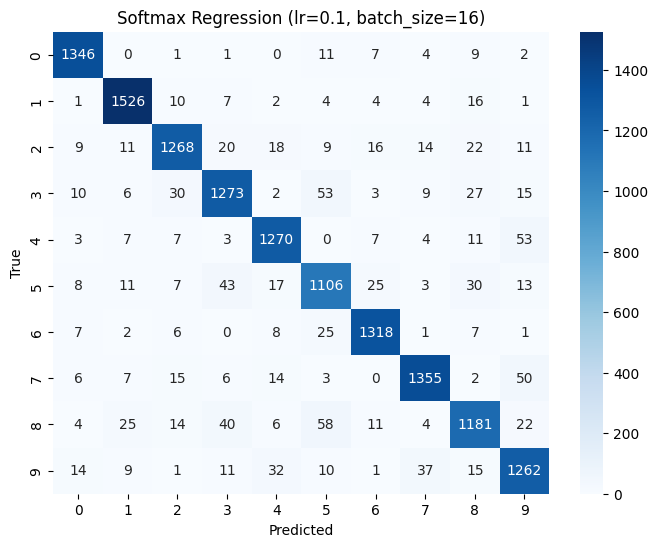

Epoch   1/100 | Train Loss: 0.0520 | Val Loss: 0.0147 | Train Acc: 99.37% | Val Acc: 99.93%
Epoch  10/100 | Train Loss: 0.0061 | Val Loss: 0.0037 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  20/100 | Train Loss: 0.0045 | Val Loss: 0.0027 | Train Acc: 99.85% | Val Acc: 99.97%
Epoch  30/100 | Train Loss: 0.0038 | Val Loss: 0.0023 | Train Acc: 99.89% | Val Acc: 99.97%
Epoch  40/100 | Train Loss: 0.0033 | Val Loss: 0.0021 | Train Acc: 99.90% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0029 | Val Loss: 0.0019 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  60/100 | Train Loss: 0.0026 | Val Loss: 0.0019 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  70/100 | Train Loss: 0.0024 | Val Loss: 0.0019 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  80/100 | Train Loss: 0.0022 | Val Loss: 0.0018 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch  90/100 | Train Loss: 0.0020 | Val Loss: 0.0017 | Train Acc: 99.91% | Val Acc: 99.93%
Epoch 100/100 | Train Loss: 0.0019 | Val Loss: 0.0017 | Train Acc: 99.93% | Val 

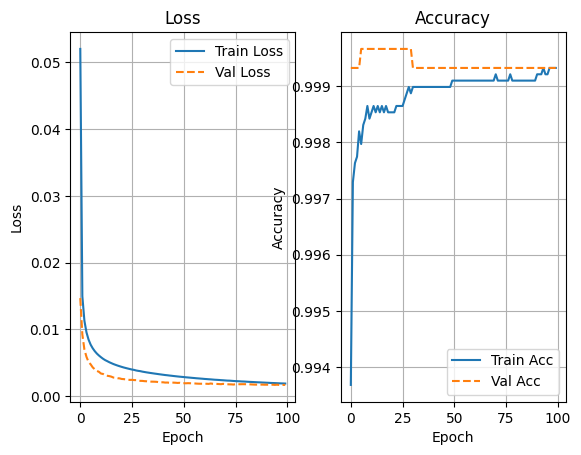

training time: 19.16353440284729
test loss: 0.0039633228443562984, test accurracy: 0.9986467957496643


In [92]:
learning_rate_softmax = 0.1
learning_rate_nn = 0.01
learning_rate_logistic = 0.1
w_softmax, b_softmax, softmax_train_losses, softmax_val_losses, softmax_train_accs, softmax_val_accs= softmax_learn_update(learning_rate_softmax)
y_test_pred = softmax(X_test_flat @ W + b)
test_acc_softmax = accuracy(y_test_pred, y_test_flat)
test_loss_softmax = cross_entropy(y_test_pred, y_test_flat)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss}")
y_test_pred = softmax(X_test_flat @ w_softmax + b_softmax)
y_test_pred_labels = torch.argmax(y_test_pred, dim=1)

# Create confusion matrix
cm_manual = confusion_matrix(y_test_flat, y_test_pred_labels)

# Plot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(cm_manual, annot=True, fmt='d', cmap='Blues', ax=axes)
axes.set_title("Softmax Regression (lr=0.1, batch_size=16)")
axes.set_xlabel("Predicted")
axes.set_ylabel("True")

plt.show()


b_log,w_log = logistic_learn_update(learning_rate_logistic, 16)
y_pred_test = logistic_regression(w_log,x_binary_test,b_log)
test_loss = binary_cross_entropy_loss(y_pred_test,y_binary_test)
test_acc = logistic_accuracy(y_binary_test,y_pred_test)
print(f"test loss: {test_loss}, test accurracy: {test_acc}")



Total Misclassified Images: 1095


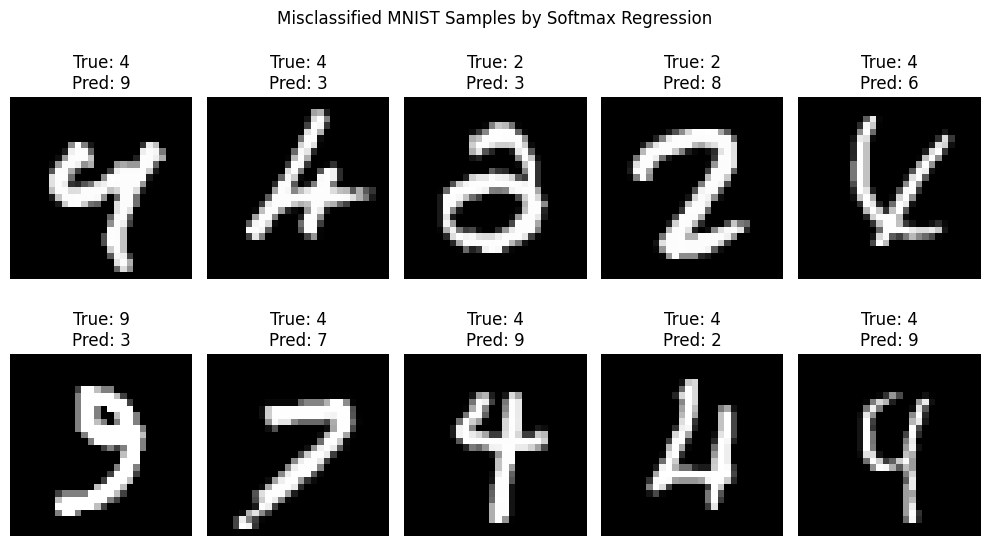

In [93]:
y_test_pred = softmax(X_test_flat @ w_softmax + b_softmax)
y_test_pred_labels = torch.argmax(y_test_pred, dim=1)

# Find indices where prediction != true label
misclassified_indices = (y_test_pred_labels != y_test_flat).nonzero(as_tuple=True)[0]
print(f"Total Misclassified Images: {len(misclassified_indices)}")
import matplotlib.pyplot as plt

# Show first 10 misclassified images
plt.figure(figsize=(10, 6))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_flat[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test_flat[idx].item()}\nPred: {y_test_pred_labels[idx].item()}")
    plt.axis('off')

plt.suptitle("Misclassified MNIST Samples by Softmax Regression")
plt.tight_layout()
plt.show()

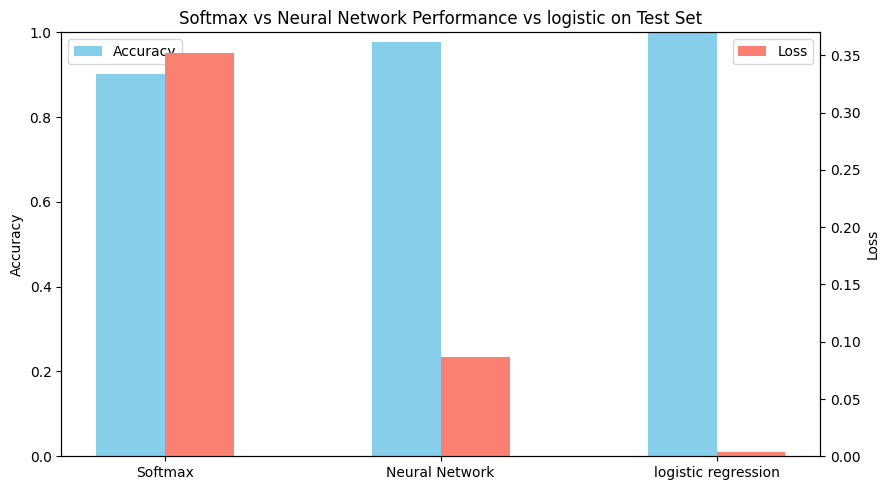

In [94]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Softmax', 'Neural Network','logistic regression']
test_accuracies = [test_acc_softmax, nn_test_accuracy,test_acc]
test_losses = [test_loss_softmax, nn_test_loss,test_loss]

fig, ax1 = plt.subplots(figsize=(9, 5))

# Plot accuracy
bar_width = 0.25
x = np.arange(len(models))

ax1.bar(x - bar_width/2, test_accuracies, width=bar_width, label='Accuracy', color='skyblue')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')

# Plot loss on second y-axis
ax2 = ax1.twinx()
ax2.bar(x + bar_width/2, test_losses, width=bar_width, label='Loss', color='salmon')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.title("Softmax vs Neural Network Performance vs logistic on Test Set")
plt.tight_layout()
plt.show()


**2.Analysis and computational cost**

Logistic regression

x: (batch_size, 784) = (b, d)

w: (784, 1) = (d, 1)

z: (batch_size, 1) = (b, 1)

| Step | Operation | Shape | Cost | Explanation |
|------|------------|--------|------|--------------|
| 1 | `x @ w` | `(b, d) @ (d, 1) → (b, 1)` | `O(b × d)` | For each of `b` samples, do `d` multiplications |
| 2 | `+ b` | `(b, 1) + (1,) → (b, 1)` | `O(b)` | Add scalar bias to `b` elements |
| 3 | `sigmoid(z)` | `(b, 1)` | `O(b)` | Apply activation element-wise on `b` elements |
| **Forward Pass** | — | — | **O(b × d)** | Dominant term |


| Phase | Cost per Batch | Cost per Epoch | Total Training (for 100 epochs, d = 784) |
|--------|----------------|----------------|--------------------------------------------|
| **Forward** | `O(b × d)` | `O(n × d)` | `O(epochs × n × d)` |
| **Backward** | `O(b × d)` | `O(n × d)` | `O(epochs × n × d)` |
| **TOTAL** | `O(b × d)` | `O(n × d)` | `O(100 × n × 784)` |


softmax regression

x: (batch_size, 784) = (b, d)

W: (784, 10) = (d, k)  ← k=10 classes!

z: (batch_size, 10) = (b, k)

| Step | Operation | Shape | Cost | Explanation |
|------|------------|--------|------|--------------|
| 1 | `z = x @ W` | `(b, d) @ (d, k) → (b, k)` | `O(b × d × k)` | For each of `b` samples, multiply `(d,) × (d, k)` → `d×k` ops |
| 2 | `+ b` | `(b, k) + (k,) → (b, k)` | `O(b × k)` | adding bias over `b` samples |
| 3 | `exp(z)` | `(b, k)` | `O(b × k)` | Element-wise exponential |
| 4 | `sum(exp, dim=1)` | `(b, k)` | `O(b × k)` | Sum over `k` elements for each of `b` samples |
| 5 | `exp / sum` | `(b, k) / (b, 1) → (b, k)` | `O(b × k)` | Element-wise division for softmax normalization |
| **Forward Pass** | — | — | **O(b × d × k)** | Dominant term is matrix multiplication |


| Phase      | Cost per Batch       | Cost per Epoch        | Total Training                  |
|-------------|----------------------|------------------------|----------------------------------|
| **Forward** | O(b × d × k)         | O(n × d × k)           | O(epochs × n × d × k)           |
| **Backward**| O(b × d × k)         | O(n × d × k)           | O(epochs × n × d × k)           |
| **TOTAL**   | O(b × d × k)         | O(n × d × k)           | O(50 × n × 784 × 10)            |


**Neural nets**

x: (batch_size, 784) = (b, d)

W1: (784, 128) = (d, h)  ← h = hidden layer size

W2: (128, 10) = (h, k)

z1: (b, h)

z2: (b, k)

###  Forward Pass Breakdown

| Step | Operation | Shape | Cost | Explanation |
|------|------------|--------|------|--------------|
| **1** | x @ W₁ | (b, d) @ (d, h) → (b, h) | O(b × d × h) | Main cost of first (hidden) layer |
| **2** | + b₁ | (b, h) + (h,) → (b, h) | O(b × h) | Broadcasting bias |
| **3** | ReLU(z₁) | Apply to (b, h) | O(b × h) | Element-wise activation |
| **4** | a₁ @ W₂ | (b, h) @ (h, k) → (b, k) | O(b × h × k) | Main cost of second (output) layer |
| **5** | + b₂ | (b, k) + (k,) → (b, k) | O(b × k) | Broadcasting bias |
| **6** | Softmax(z₂) | Apply to (b, k) | O(b × k) | Element-wise normalization |
| **→ Total Forward** | — | — | **O(b × d × h + b × h × k)** | Sum of both layer costs |

---

###  Backward Pass (Backpropagation)

| Step | Operation | Cost | Explanation |
|------|------------|------|--------------|
| **1** | dz₂ = y_pred − y_true | O(b × k) | Output gradient |
| **2** | dW₂ = a₁ᵀ @ dz₂ = (h, b) @ (b, k) | O(b × h × k) | Gradient for W₂ |
| **3** | da₁ = dz₂ @ W₂ᵀ = (b, k) @ (k, h) | O(b × h × k) | Backprop to layer 1 |
| **4** | dz₁ = da₁ × ReLU′(z₁) | O(b × h) | Element-wise derivative |
| **5** | dW₁ = xᵀ @ dz₁ = (d, b) @ (b, h) | O(b × d × h) | Gradient for W₁ |
| **→ Total Backward** | — | **O(b × d × h + b × h × k)** | Same order as forward pass |

---

###  Overall Computational Complexity

| Phase | Cost per Batch | Cost per Epoch | Total Training |
|--------|----------------|----------------|----------------|
| **Forward** | O(b × d × h + b × h × k) | O(n × d × h + n × h × k) | O(epochs × n × (d × h + h × k)) |
| **Backward** | O(b × d × h + b × h × k) | O(n × d × h + n × h × k) | O(epochs × n × (d × h + h × k)) |
| **TOTAL** | O(b × d × h + b × h × k) | O(n × d × h + n × h × k) | **O(epochs × n × (d × h + h × k))** |

---


**3. Training time**

### Model Training Time Comparison

| Model | Training Time (seconds) |
|--------|--------------------------|
| Logistic Regression | 15.1082 |
| Softmax Regression | 39.5518 |
| Neural Network (NN) | 18.5670 |


**4.When to use each approach**

### Comparison: Logistic Regression vs. Softmax Regression vs. Neural Networks

| Model | Type of Task | Output Function | Nonlinearity | Computational Complexity | When to Use | Example |
|--------|---------------|------------------|---------------|----------------------------|--------------|----------|
| Logistic Regression | Binary Classification | Sigmoid \( \sigma(w^T x + b) \) | Linear | O(n × d) | - Simple 2-class problems<br>- When data is nearly linear<br>- When interpretability matters | Spam (yes/no), Disease (yes/no) |
| Softmax Regression | Multi-class Classification | Softmax \( \frac{e^{z_i}}{\sum_j e^{z_j}} \) | Linear | O(n × d × k) | - Multi-class linear problems<br>- Baseline for multi-class datasets | Handwritten digits (0–9), News topic classification |
| Neural Network (NN) | Binary or Multi-class | Depends (Sigmoid / Softmax / Linear) | Nonlinear | O(n × (d×h + h×k)) | - Complex or nonlinear patterns<br>- Large datasets (images, text, audio)<br>- When accuracy is more important than simplicity | Image recognition, Speech|


**5.summary**

| Model | Test Accuracy | Test Loss | Training Time | Parameters | Complexity |
|-------|--------------|-----------|---------------|------------|------------|
| **Logistic Regression** | 99.86% | 0.0040 | 15.11s | 785 | O(n·d) |
| **Softmax Regression** | 90.11% | 0.3526 | 39.55s | 7,850 | O(n·d·k) |
| **Neural Network** | 96.99% | 0.1034 | 18.57s | 151,060 | O(n·(d·h+h·k)) |

## Detailed Metrics

| Model | Task | Dataset Size | Epochs | Time/Epoch (s) | Accuracy (%) | Loss |
|-------|------|--------------|--------|----------------|--------------|------|
| **Logistic Regression** | Binary (0 vs 1) | ~9,000 | 100 | 0.15 | 99.86 | 0.0040 |
| **Softmax Regression** | Multi-class (0-9) | ~42,000 | 50 | 0.79 | 90.11 | 0.3526 |
| **Neural Network** | Multi-class (0-9) | ~42,000 | 10 | 1.86 | 96.99 | 0.1034 |

In [95]:
print(f"Logistic accuracy: {test_acc.item() * 100:.2f}%")
print(f"Softmax accuracy: {test_acc_softmax.item() * 100:.2f}%")
print(f"NN accuracy: {nn_test_accuracy * 100:.2f}%")

Logistic accuracy: 99.86%
Softmax accuracy: 90.17%
NN accuracy: 97.81%


Epoch   1/100 | Train Loss: 0.2135 | Val Loss: 0.0884 | Train Acc: 99.11% | Val Acc: 99.80%
Epoch  10/100 | Train Loss: 0.0191 | Val Loss: 0.0148 | Train Acc: 99.72% | Val Acc: 99.93%
Epoch  20/100 | Train Loss: 0.0127 | Val Loss: 0.0092 | Train Acc: 99.74% | Val Acc: 99.93%
Epoch  30/100 | Train Loss: 0.0103 | Val Loss: 0.0071 | Train Acc: 99.76% | Val Acc: 99.93%
Epoch  40/100 | Train Loss: 0.0089 | Val Loss: 0.0060 | Train Acc: 99.79% | Val Acc: 99.93%
Epoch  50/100 | Train Loss: 0.0080 | Val Loss: 0.0052 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  60/100 | Train Loss: 0.0074 | Val Loss: 0.0047 | Train Acc: 99.83% | Val Acc: 99.97%
Epoch  70/100 | Train Loss: 0.0069 | Val Loss: 0.0043 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  80/100 | Train Loss: 0.0065 | Val Loss: 0.0040 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch  90/100 | Train Loss: 0.0062 | Val Loss: 0.0038 | Train Acc: 99.84% | Val Acc: 99.97%
Epoch 100/100 | Train Loss: 0.0059 | Val Loss: 0.0036 | Train Acc: 99.85% | Val 

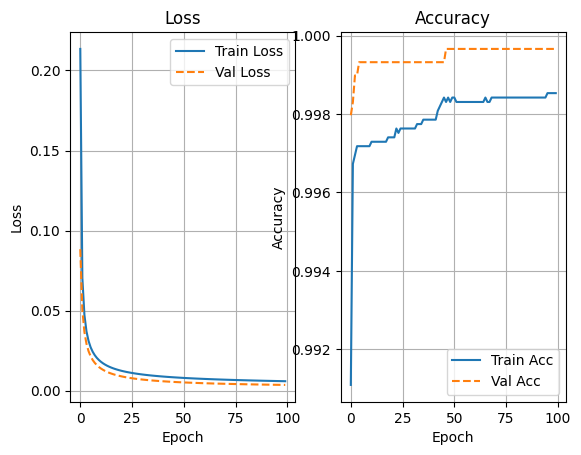

training time: 18.348998069763184
optimal configuration on test set: 0.9986467957496643


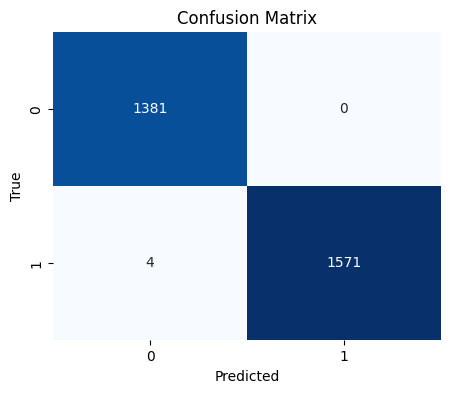

Total misclassified samples: 4


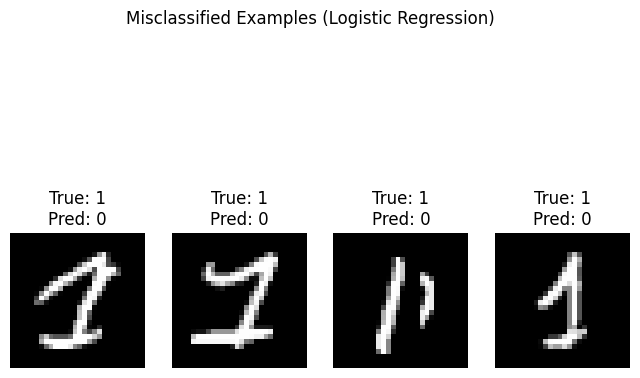

In [96]:
b,w=logistic_learn_update(0.01,16)
y_pred_test_1 = logistic_regression(w, x_binary_test, b)
test_loss_1 = binary_cross_entropy_loss(y_pred_test, y_binary_test)
test_acc_1 = logistic_accuracy(y_binary_test, y_pred_test)
print(f"optimal configuration on test set: {test_acc_1}")
predictions = (y_pred_test >= 0.5).float().reshape(-1)
#.float() to change it from binary to numbers 0 and 1
#.reshape(-1) to be row vector not column vector
cm = confusion_matrix(y_binary_test,predictions)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

misclassified_indices = (predictions != y_binary_test).nonzero(as_tuple=True)[0]
print(f"Total misclassified samples: {len(misclassified_indices)}")

# Show first 4 misclassified examples
plt.figure(figsize=(8, 6))
for i in range(min(4, len(misclassified_indices))):
    idx = misclassified_indices[i]
    plt.subplot(1, 4, i + 1)
    plt.imshow(x_binary_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {int(y_binary_test[idx])}\nPred: {int(predictions[idx])}")
    plt.axis('off')

plt.suptitle("Misclassified Examples (Logistic Regression)")
plt.show()



### Model and Dataset Limitations Summary

| **Category** | **Limitation** | **Explanation** |
|---------------|----------------|-----------------|
| **Logistic Regression** | Binary classification only | Can only separate two classes (0 vs 1). MNIST has 10 classes, so it needs One-vs-All or One-vs-Rest extensions. |
| | Learns only linear boundaries | Assumes linear separability, cannot model curved or complex digit patterns (e.g., 3 vs 8). |
| | Ignores image structure | Treats each pixel independently; does not understand spatial relationships between pixels. |
| **Softmax Regression** | Still a linear model | Handles multiple classes but still creates straight-line decision boundaries. |
| | No feature learning | Uses raw pixel values; does not learn visual features like edges or shapes. |
| | Not robust to variations | Small shifts, rotations, or noise in digits cause large performance drops. |
| **Neural Networks (MLP)** | Better but still limited | Learns non-linear patterns but still lacks true spatial understanding. |
| | Too many parameters | Each pixel connects to all neurons → millions of weights → slower training and overfitting risk. |
| | No spatial awareness | Flattening the image (1×784) removes spatial relationships between neighboring pixels. |
| **MNIST Dataset** | Unrealistically clean and centered | All digits are centered with no background noise; not like real-world data. |
| | Low diversity of handwriting styles | Limited variation among digits; doesn’t represent real handwriting diversity. |
| | Too simple for modern models | Advanced models (like CNNs) reach 99%+ accuracy, making MNIST less useful for testing generalization. |


1. Logistic Regression Limitations

Binary classification only:
Logistic regression is designed to classify into only two classes (like 0 vs 1). MNIST has 10 digits (0–9), so logistic regression cannot directly solve the full problem unless we use tricks like One-vs-All.

Learns only linear boundaries:
It assumes data can be separated with a straight line (or hyperplane). But handwritten digits are complex and curved, so linear boundaries cannot separate digits like 3 and 8.

Ignores image structure:
Each pixel is treated as a separate feature. The model doesn’t know that nearby pixels form lines or shapes. So it does not “see” the digit like a human does.

2. Softmax Regression Limitations

Still a linear model:
Softmax regression can handle multiple classes, but it still creates straight-line decision boundaries. It cannot capture curved or complex shapes in digits.

No feature learning:
It uses raw pixel values directly, without learning meaningful visual features like edges or strokes. This makes it weaker than neural networks.

Not robust to variations:
If a digit is moved slightly, rotated, or has noise, pixel values change and performance drops. It doesn’t learn invariance to such changes.

3. Neural Networks (Fully Connected / MLP) Limitations

Better but still limited:
Neural networks learn non-linear patterns, so they perform better than logistic or softmax regression. But they still don't fully understand the spatial structure of images.

Too many parameters:
Each pixel is connected to every neuron, which creates a huge number of weights (millions). This makes training slower and increases the chance of overfitting.

No spatial awareness (no image structure):
The image is flattened into one long vector (1×784), so the network loses the concept of nearby pixels forming shapes. It treats all pixels the same way.

4. MNIST Dataset Limitations (Affects All Models)

Unrealistically clean and centered images:
All digits in MNIST are centered and have no background noise. Real-world handwritten digits (on paper, photos, receipts) are messy, rotated, or cut off.

Low diversity of handwriting styles:
Most digits look similar in style. This makes the dataset too easy and does not represent the true variety of human handwriting.

Too simple for modern models:
Advanced models like CNNs easily reach 99%+ accuracy. This means MNIST is no longer a good dataset to test real-world performance or generalization. (summary markup table)